# Week 1
**05/23 - 05/30**

In this report, I address the question how infrastructure factors (i.e. sanitation, access to clean water, eletric grid) in favelas' and non-favelas areas' affect the quantity of food establishments, according to the division In Natura, Ultra and Misto (Mixed)

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
sns.set_theme(style='darkgrid')

## Section 1.1 - Correlating Infrastructure to number of establishments

Here, I search the correlation between infrastructure factor and establishments *inside* favelas. 

In [ ]:
data = pd.read_csv('/Users/thiagodesouza/Codes/campo_favela/tables/Bases e Gráficos - Relatório áreas favelas e não favelas.xlsx - BaseSP.csv')

# understanding the data columns
print(data.columns)

# get only the columns which matter
data = data[['nome','totdomicilio','abastecimentoagua',
       'esgotamentosanitario', 'redeeletricadomiciliar', 'viaspavimentadas',
       'drenagempluvial', 'iluminacaopublica', 'coletalixo',
       'qtd_estab_in_natura', 'qtd_estab_misto', 'qtd_estab_ultraproc']]

data

FileNotFoundError: ignored

**Observation**

Notice that two favelas in particular have much greater numbers than the others (Paraisopolis and Heliopolis). For this reason, I will take them out of the analysis from now on. It is worth noticing that 45 of the 1704 favelas do not have complete data. For this reason, I prefered excluding them from this analysis. I also replaced string for values, mainly on the columns 'coletalixo' and 'drenagempluvial', so I could do the regression. Also, I got only the favelas that had at least 1 establishment In Natura, which brought the number down to 265 favelas.

I also added 4 new columns, related to the density of each kind of establishment per total number of houses and also the total density. The favela 'LOTE 18' has 0 total houses as registered in the spreadsheet, which breaks the density. For this reason, I took it out.

In [ ]:
data = data[data.nome != 'PARAISÓPOLIS']
data = data[data.nome != 'HELIÓPOLIS']

# pelo menos um estab
data = data.loc[(data['qtd_estab_in_natura'] >0) | (data['qtd_estab_misto'] > 0) | (data['qtd_estab_ultraproc'] > 0)]

# here, one has to encode string into float values to get the regression
data = data.replace('Nenhum', 0)
data = data.replace('Total', 1)
data = data.replace('Parcial', 0.5)

data['densidade_total'] = (data['qtd_estab_in_natura'] + data['qtd_estab_misto'] + data['qtd_estab_ultraproc'])/data['totdomicilio']

# do not include favelas that do not have complete data ~ 48 favelas
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

data

nome  totdomicilio  abastecimentoagua  \
3                PARQUE EUROPA I        1000.0               0.50   
22            JARDIM VARGINHA II         558.0               0.65   
27                 VILA XAVANTES         300.0               0.30   
48              IMPRENSA COLONOS         424.0               1.00   
63              JARDIM ITAPURA I         900.0               0.30   
...                          ...           ...                ...   
1634              JARDIM MAZZA I         100.0               1.00   
1638          FAZENDA DA JUTA IV         100.0               0.50   
1644                    MILHARAL         300.0               0.90   
1651  JARDIM NORONHA I, II E III        3237.0               0.50   
1659            RECANTO DA MOEDA         136.0               0.50   

      esgotamentosanitario  redeeletricadomiciliar  viaspavimentadas  \
3                     0.00                     0.5               0.8   
22                    0.00                     0.0               0.6   
27                    0.00                     0.4               0.3   
48                    0.80                     1.0               1.0   
63                    0.00                     0.4               0.5   
...                    ...                     ...               ...   
1634                  0.00                     0.5               1.0   
1638                  0.50                     0.5               0.5   
1644                  0.75                     1.0               1.0   
1651                  0.30                     0.0               0.6   
1659                  0.30                     0.8               0.8   

      drenagempluvial  iluminacaopublica  coletalixo  qtd_estab_in_natura  \
3                 0.5                0.8         1.0                    0   
22                0.5                0.4         0.5                    3   
27                0.5                0.5         0.5                    0   
48                1.0                1.0         1.0                    0   
63                0.5                0.4         0.5                    0   
...               ...                ...         ...                  ...   
1634              0.5                0.5         1.0                    0   
1638              0.5                0.5         0.5                    1   
1644              0.0                0.8         0.0                    2   
1651              0.5                0.3         0.5                    0   
1659              0.5                0.5         1.0                    1   

      qtd_estab_misto  qtd_estab_ultraproc  densidade_total  
3                  14                    2         0.016000  
22                 13                    6         0.039427  
27                  1                    0         0.003333  
48                  3                    1         0.009434  
63                  2                    0         0.002222  
...               ...                  ...              ...  
1634                1                    0         0.010000  
1638                3                    0         0.040000  
1644                8                    4         0.046667  
1651                8                    1         0.002780  
1659                1                    0         0.014706  

[264 rows x 13 columns]

### 1.1 - Plotting

Let's plot a few variables as to understand the data better

Here I plot the quantity of In Natura and Misto establishment by quantity of Ultraproc

In [ ]:
eixos = {
        'abastecimentoagua': 'Water Supply',
        'esgotamentosanitario':'Sanitation',
        'redeeletricadomiciliar':'Access to Electrical Energy',
        'viaspavimentadas':'Paving',
        'drenagempluvial':'Rain Drenage',
        'iluminacaopublica':'Public Lighting',
        'coletalixo':'Garbage Collection'
        }

estabdict = {
            'qtd_estab_misto':'Number of Misto Estab.',
            'qtd_estab_in_natura':'Number of In Natura Estab.',
            'qtd_estab_ultraproc':'Number of UltraProc Estab.',
            }


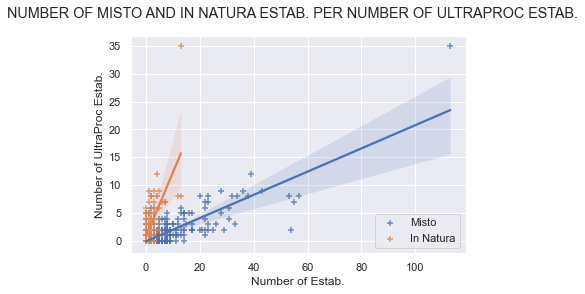

In [ ]:
# linear regression to check relation between types of establishments
fig, axs = plt.subplots(ncols=1, sharey=True, sharex=True)
fig.suptitle('NUMBER OF MISTO AND IN NATURA ESTAB. PER NUMBER OF ULTRAPROC ESTAB.')

sns.regplot(x='qtd_estab_misto', y='qtd_estab_ultraproc', data=data, ax=axs, label='Misto', marker='+')

g = sns.regplot(x='qtd_estab_in_natura', y='qtd_estab_ultraproc', data=data, ax=axs, label='In Natura', marker='+')

g.set(xlabel='Number of Estab.', ylabel=estabdict['qtd_estab_ultraproc'])
g.legend()

print('')

Now, let's plot each infrastructure factor by the quantity of each kind of food establishment

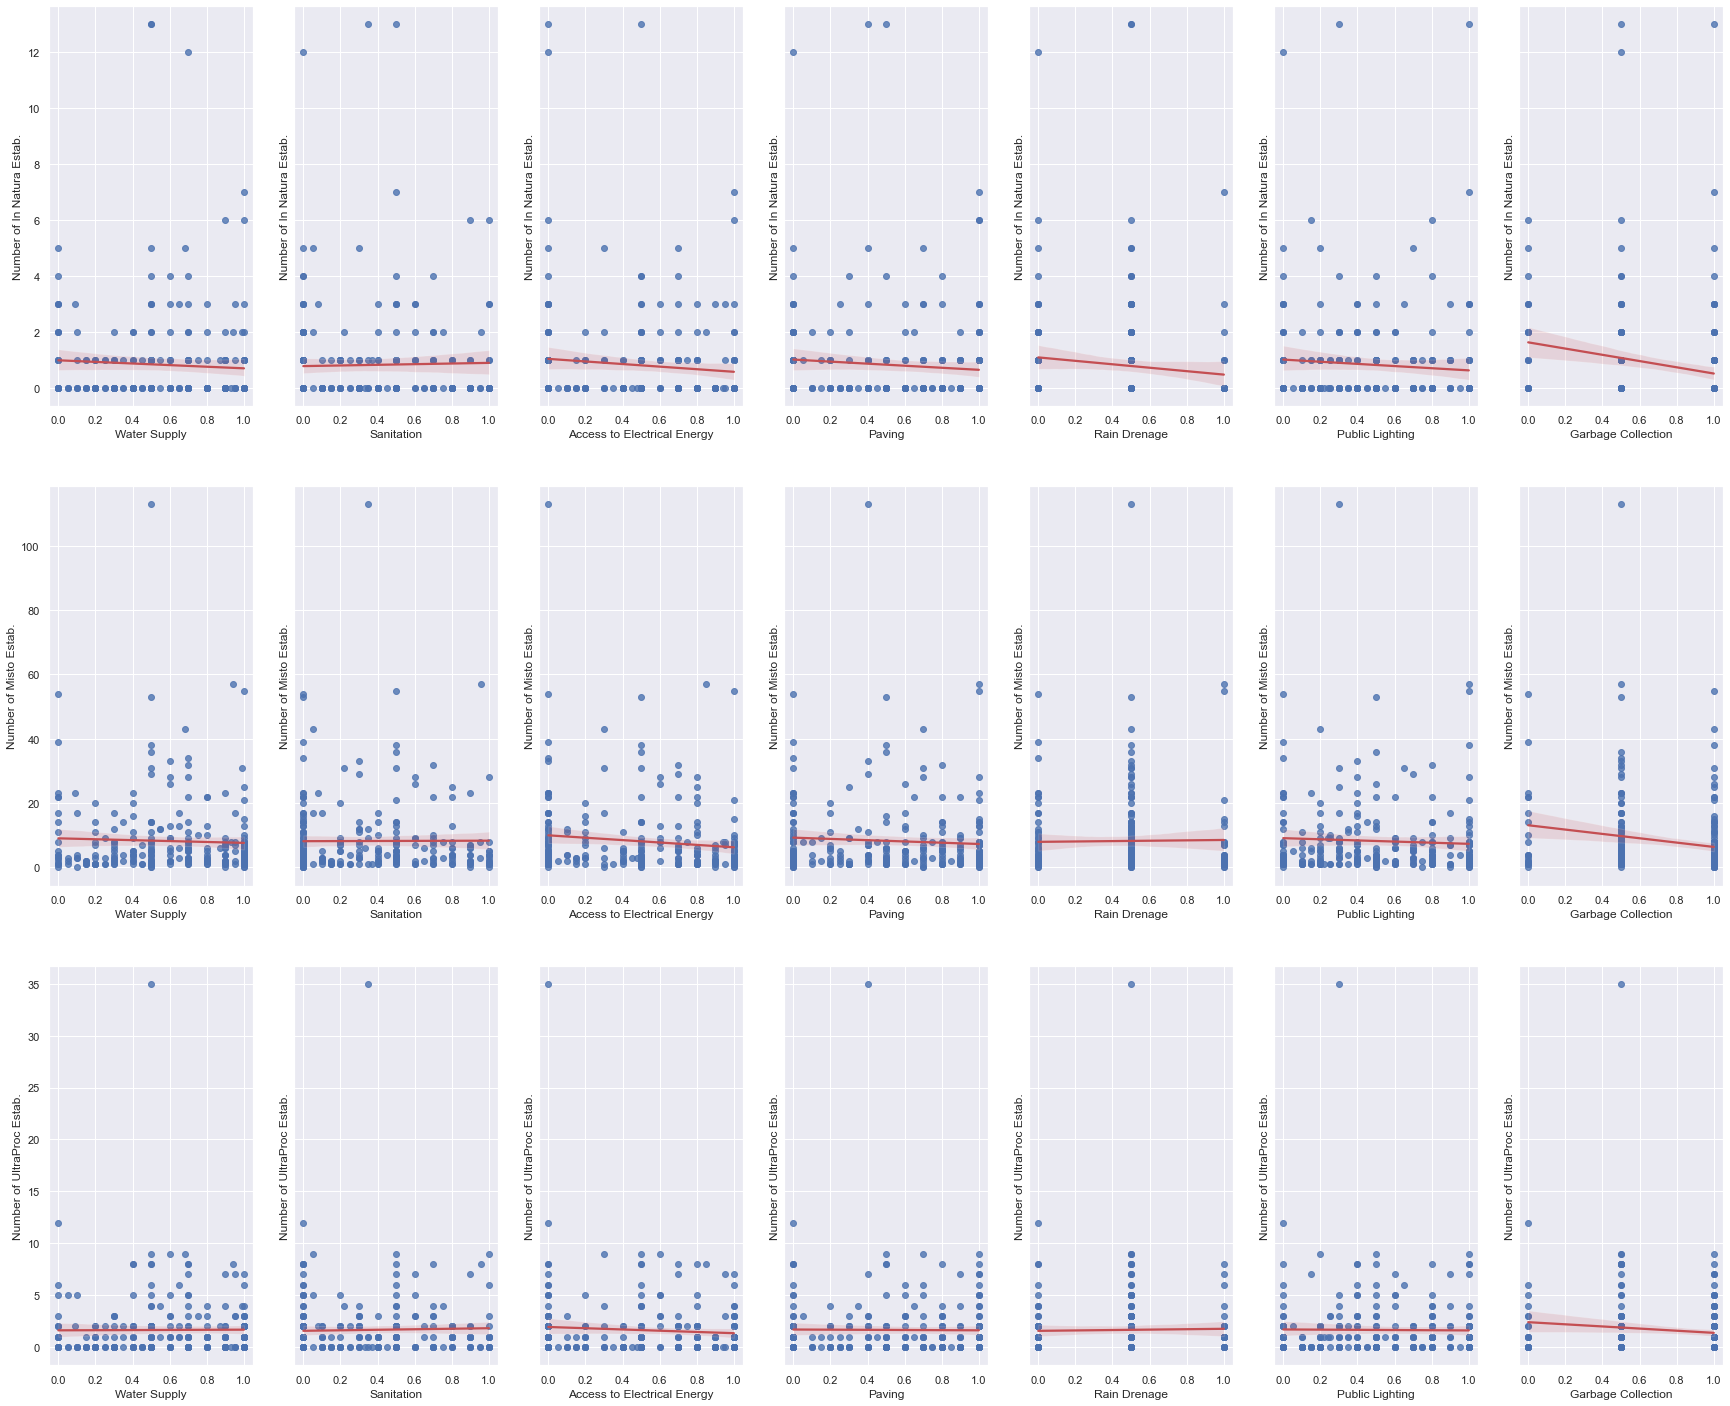

In [ ]:
infra = ['abastecimentoagua',
       'esgotamentosanitario', 'redeeletricadomiciliar', 'viaspavimentadas',
       'drenagempluvial', 'iluminacaopublica', 'coletalixo']

estab = ['qtd_estab_in_natura', 'qtd_estab_misto', 'qtd_estab_ultraproc']

fig, axs = plt.subplots(3,7, figsize=(30,25), sharey='row')

                   
for ix, inf in enumerate(infra):
    for jx, est in enumerate(estab):  
        sns.regplot(ax=axs[jx, ix], data=data, x=inf, y=est, scatter_kws={'color':'b'}, line_kws={'color':'r'}).set(xlabel=eixos[inf], ylabel=estabdict[est])
        

### 1.2 - Linear Regression

Here, I do an OLS as to understand the pattern underlying the influence of infrastructure factors on the number of each kind of establishment

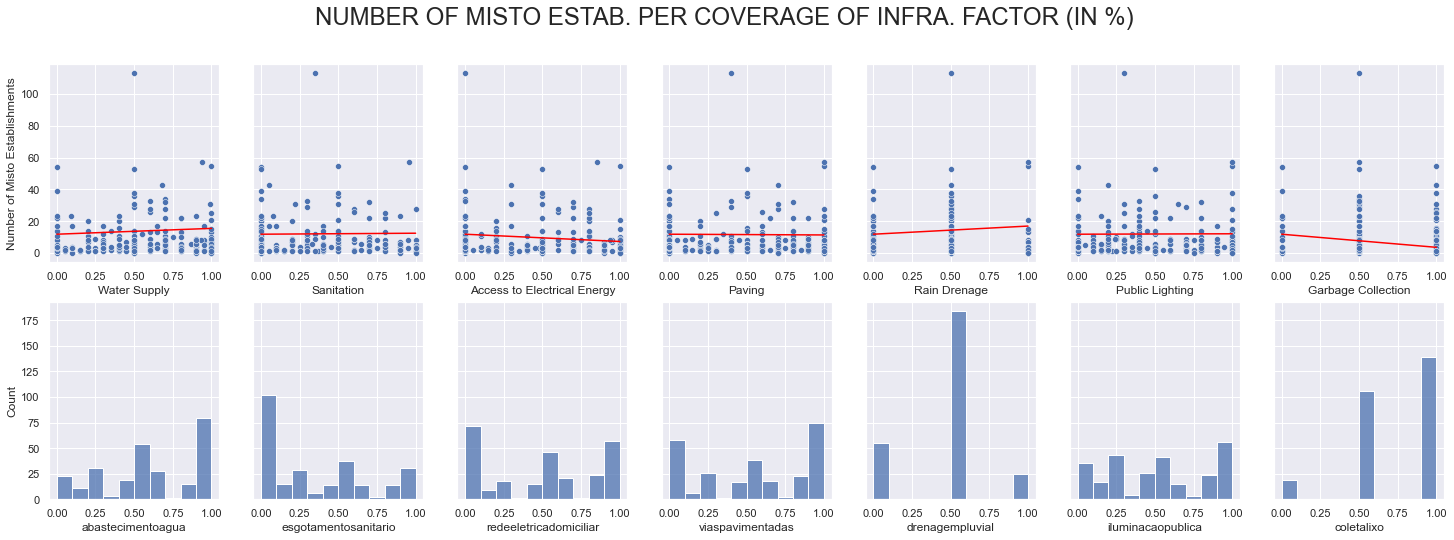

In [ ]:
X = data[infra]

## Linear Regression for quantity of Misto establishments
y = data[['qtd_estab_misto']]
misto_model = linear_model.LinearRegression()
misto_model.fit(X, y)

fig,axs = plt.subplots(2,7, figsize=(25,8), sharey='row')
fig.suptitle('NUMBER OF MISTO ESTAB. PER COVERAGE OF INFRA. FACTOR (IN %)', fontsize=24)

for ix, x_param in enumerate(infra):
    r = np.linspace(0,1, 300)
    y_ = misto_model.coef_[:,ix]*r + misto_model.intercept_
    sns.scatterplot(ax=axs[0,ix], x=x_param, y='qtd_estab_misto', data=data)
    sns.lineplot(ax=axs[0,ix], x=r, y=y_, color='red').set(xlabel=eixos[x_param], ylabel='Number of Misto Establishments')
    sns.histplot(ax=axs[1,ix], x=x_param, data=data)
      


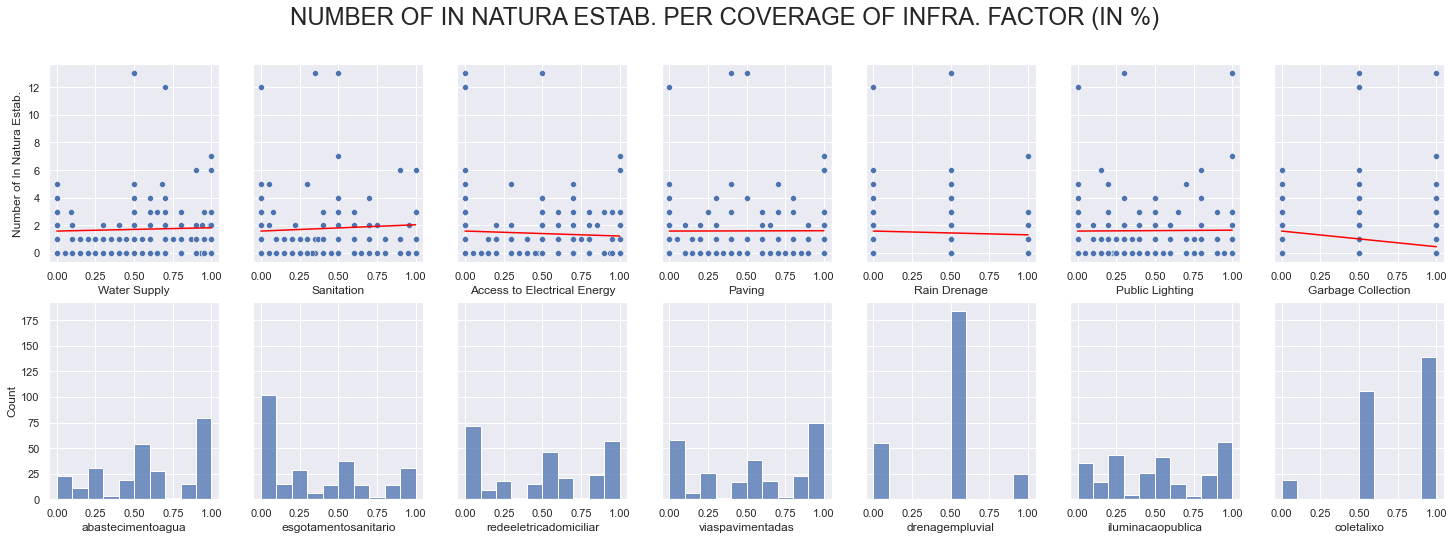

In [ ]:
X = data[infra]

## Linear Regression for quantity of In Natura establishments
y = data[['qtd_estab_in_natura']]
in_natura_model = linear_model.LinearRegression()
in_natura_model.fit(X, y)

fig,axs = plt.subplots(2,7, figsize=(25,8), sharey='row')
fig.suptitle('NUMBER OF IN NATURA ESTAB. PER COVERAGE OF INFRA. FACTOR (IN %)', fontsize=24)

for ix, x_param in enumerate(infra):
    r = np.linspace(0,1, 300)
    y_ = in_natura_model.coef_[:,ix]*r + in_natura_model.intercept_
    sns.scatterplot(ax=axs[0,ix], x=x_param, y='qtd_estab_in_natura', data=data)
    sns.lineplot(ax=axs[0,ix], x=r, y=y_, color='red').set(xlabel=eixos[x_param], ylabel=estabdict['qtd_estab_in_natura'])
    sns.histplot(ax=axs[1,ix], x=x_param, data=data)


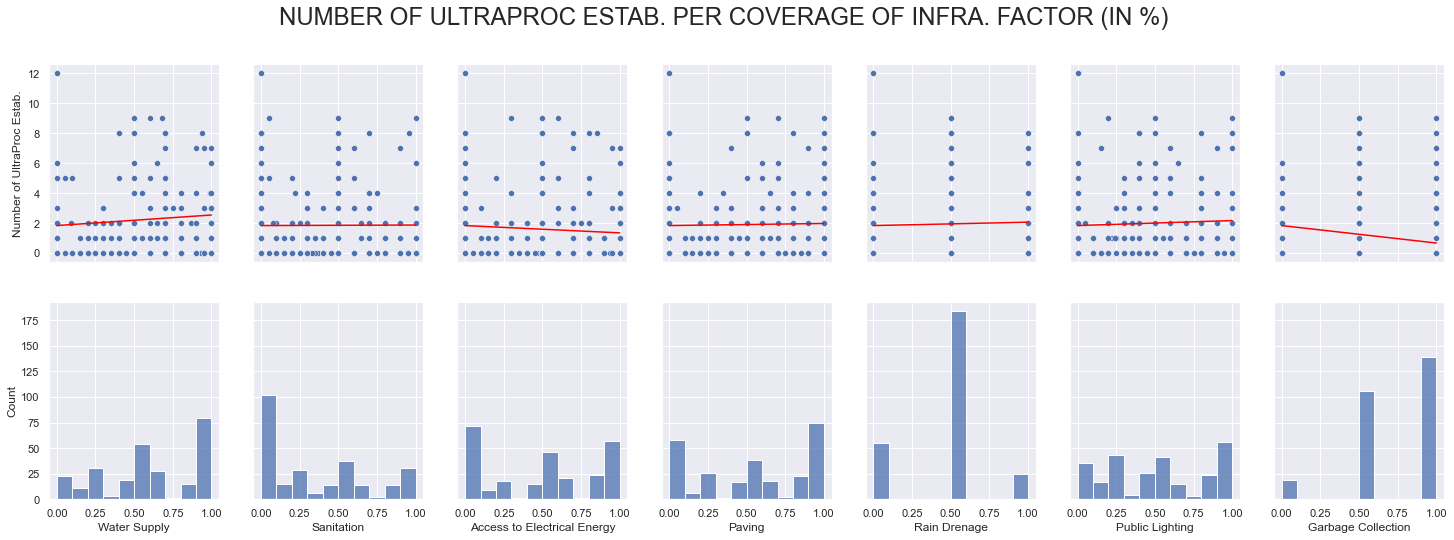

In [ ]:
data_ = data[data.qtd_estab_ultraproc < 30]

X = data_[infra]

## Linear Regression for quantity of UltraProc establishments
y = data_[['qtd_estab_ultraproc']]

ultra_model = linear_model.LinearRegression()
ultra_model.fit(X, y)

fig,axs = plt.subplots(2,7, figsize=(25,8), sharey='row', sharex='col')
fig.suptitle('NUMBER OF ULTRAPROC ESTAB. PER COVERAGE OF INFRA. FACTOR (IN %)', fontsize=24)

for ix, x_param in enumerate(infra):
    r = np.linspace(0,1, 300)
    y_ = ultra_model.coef_[:,ix]*r + ultra_model.intercept_
    sns.scatterplot(ax=axs[0,ix], x=x_param, y='qtd_estab_ultraproc', data=data_)
    sns.lineplot(ax=axs[0,ix], x=r, y=y_, color='red').set(ylabel=estabdict['qtd_estab_ultraproc'])
    sns.histplot(ax=axs[1,ix], x=x_param, data=data).set(xlabel=eixos[x_param])

Let's plot the 3 Regression lines for each factor

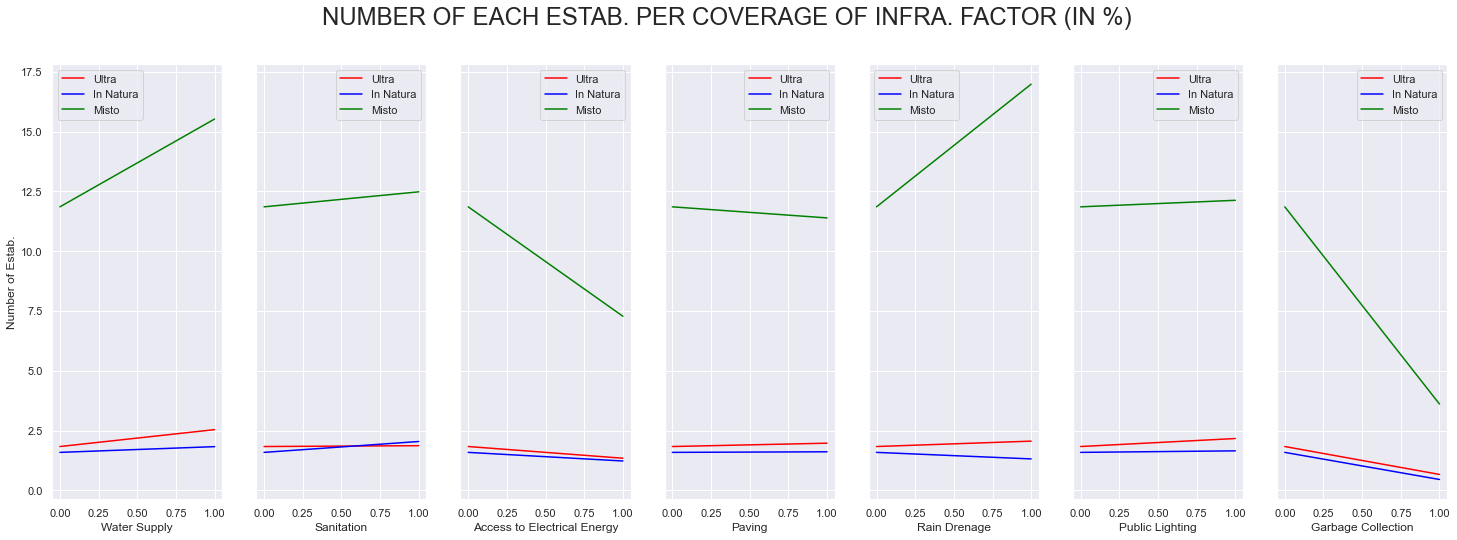

In [ ]:
fig,axs = plt.subplots(1,7, figsize=(25,8), sharey=True)
fig.suptitle('NUMBER OF EACH ESTAB. PER COVERAGE OF INFRA. FACTOR (IN %)', fontsize=24)

for ix, inf in enumerate(infra):
    r = np.linspace(0,1, 300)
    y_ultra = ultra_model.coef_[:,ix]*r + ultra_model.intercept_
    y_in_natura = in_natura_model.coef_[:, ix]*r + in_natura_model.intercept_
    y_misto = misto_model.coef_[:,ix]*r + misto_model.intercept_
    
    sns.lineplot(ax=axs[ix], x=r, y=y_ultra, color='red', label='Ultra')
    sns.lineplot(ax=axs[ix], x=r, y=y_in_natura, color='blue', label='In Natura')
    sns.lineplot(ax=axs[ix], x=r, y=y_misto, color='green', label='Misto').set(xlabel=eixos[inf], ylabel='Number of Estab.')
    

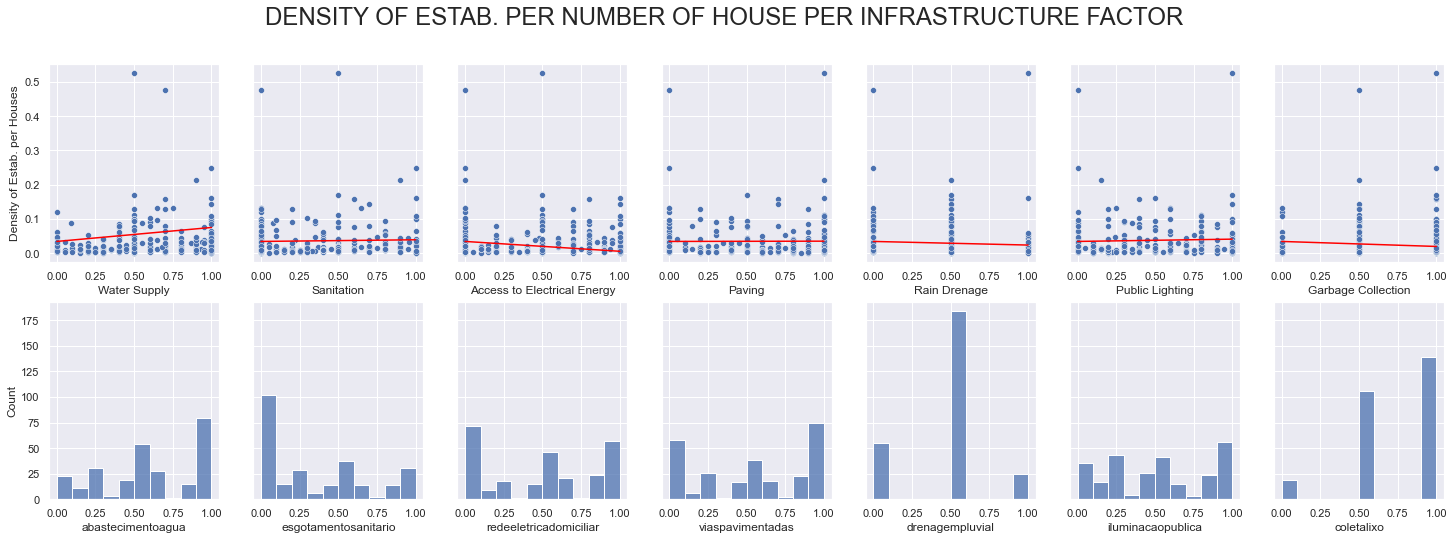

In [ ]:
data_ = data[data.densidade_total <3]
y = data_[['densidade_total']]
X = data_[infra]

densidade_model = linear_model.LinearRegression()
densidade_model.fit(X, y)

fig,axs = plt.subplots(2,7, figsize=(25,8), sharey='row')
fig.suptitle('Density of Estab. per Number of House per Infrastructure factor'.upper(), fontsize=24)



for ix, x_param in enumerate(infra):
    r = np.linspace(0,1, 300)
    y_ = densidade_model.coef_[:,ix]*r + densidade_model.intercept_
    sns.scatterplot(ax=axs[0,ix], x=x_param, y='densidade_total', data=data_)
    sns.lineplot(ax=axs[0,ix], x=r, y=y_, color='red').set(xlabel=eixos[x_param], ylabel='Density of Estab. per Houses')
    sns.histplot(ax=axs[1,ix], x=x_param, data=data)
    

# Week 2

## Goals
* Analysis of favelas without food establishments
* Analysis of non-favelas areas
* Enhance last week's analysis
* Compare Paraisopolis and Heliopolis

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
sns.set_theme(style='darkgrid')

In [ ]:
data = pd.read_csv('/Users/thiagodesouza/Codes/campo_favela/tables/Bases e Gráficos - Relatório áreas favelas e não favelas.xlsx - BaseSP.csv')
print(data.columns)
data

FileNotFoundError: ignored

## Section 2.1 - Analysis of SP favelas without food establishments

We have a total of 1430 favelas without any food establishments inside the favela area, of which only 1390 had complete data. 

In [ ]:
data_wo_food = data[(data.qtd_estab_in_natura == 0) & (data.qtd_estab_misto == 0) & (data.qtd_estab_ultraproc == 0)]

data_wo_food =data_wo_food.dropna()
data_wo_food.replace({'Nenhum':0, 'Parcial':0.5, 'Total':1.0}, inplace=True)
data_wo_food

### 2.1.1 - Infrastructure & Density

By density, one should understand number of households per area of the favela (i.e. density of households.)

In [ ]:
data_wo_food['densidade'] = data_wo_food['totdomicilio']/data_wo_food['area_favela']

infra = ['abastecimentoagua',
       'esgotamentosanitario', 'redeeletricadomiciliar', 'viaspavimentadas',
       'drenagempluvial', 'iluminacaopublica', 'coletalixo']

eixos = {
        'abastecimentoagua': 'Water Supply',
        'esgotamentosanitario':'Sanitation',
        'redeeletricadomiciliar':'Access to Electrical Energy',
        'viaspavimentadas':'Paving',
        'drenagempluvial':'Rain Drenage',
        'iluminacaopublica':'Public Lighting',
        'coletalixo':'Garbage Collection'
        }

for inf in infra:
    fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey='col', figsize=(15,5))
    
    r = np.linspace(np.min(data_wo_food[inf]), np.max(data_wo_food[inf]), 300)
    m,b = np.polyfit(data_wo_food[inf], data_wo_food['densidade'], 1)
    
    sns.scatterplot(ax=axs[0],x=inf, y='densidade', data=data_wo_food).set(ylabel='Density', xlabel=None)
    sns.lineplot(ax=axs[0], x=r, y=m*r+b, color='red')
    sns.histplot(ax=axs[1], x=inf, data=data_wo_food).set(xlabel=None)

    fig.text(0.5, 0.004, f'{eixos[inf]}, Reg. Coef. m = {m.round(4)}, b = {b.round(4)} ', ha='center', fontsize='x-large')
    


### 2.1.2 - GeoSES indices & Density

In [ ]:
geoses = ['GeoSES', 'geoses_educ', 'geoses_mobilidade','geoses_pobreza','geoses_privacao','geoses_riqueza']

geodict = {
    'GeoSES':'GeoSES',
    'geoses_educ':'GeoSES Education',
    'geoses_mobilidade': 'GeoSES Mobility',
    'geoses_pobreza':'GeoSES Poverty',
    'geoses_privacao':'GeoSES Deprivation',
    'geoses_riqueza':'GeoSES Wealth'
}

for geos in geoses:
    fig, axs = plt.subplots(nrows=1, ncols=2, sharey='col', figsize=(15,5))
    
    r = np.linspace(np.min(data_wo_food[geos]), np.max(data_wo_food[geos]), 300)
    m,b = np.polyfit(data_wo_food[geos], data_wo_food['densidade'], 1)
    
    sns.lineplot(ax=axs[0], x=r, y=m*r+b, color='red')
    sns.scatterplot(ax=axs[0],x=geos, y='densidade', data=data_wo_food).set(ylabel='Density', xlabel=None)
    sns.histplot(ax=axs[1], x=geos, data=data_wo_food, kde=True).set(xlabel=None)

    fig.text(0.5, 0.004, f'{geodict[geos]}, Reg. Coef. m = {m.round(4)}, b = {b.round(4)}', ha='center', fontsize='x-large')


### 2.1.3 - Infrastructure & GeoSES

In [ ]:
for inf in infra:
    fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey='col', figsize=(15,5))
    
    r = np.linspace(np.min(data_wo_food[inf]), np.max(data_wo_food[inf]), 300)
    m,b = np.polyfit(data_wo_food[inf], data_wo_food['GeoSES'], 1)
    
    sns.scatterplot(ax=axs[0],x=inf, y='GeoSES', data=data_wo_food).set(ylabel='GeoSES', xlabel=None)
    sns.lineplot(ax=axs[0], x=r, y=m*r+b, color='red')
    sns.histplot(ax=axs[1], x=inf, data=data_wo_food).set(xlabel=None)

    fig.text(0.5, 0.004, f'{eixos[inf]}, Reg. Coef. m = {m.round(4)}, b = {b.round(4)} ', ha='center', fontsize='x-large')
    

## Section 2.2 - Analysis of SP favelas with at least one food establishment

In [ ]:
from sklearn.metrics import r2_score

data_w_food = data[(data.qtd_estab_in_natura > 0) | (data.qtd_estab_misto > 0) | (data.qtd_estab_ultraproc > 0)]

data_w_food =data_w_food.dropna()
data_w_food.replace({'Nenhum':0, 'Parcial':0.5, 'Total':1.0}, inplace=True)
# print(data_w_food.columns)

data_w_food['total'] = data_w_food['qtd_estab_in_natura'] + data_w_food['qtd_estab_misto'] + data_w_food['qtd_estab_ultraproc']

# data_w_food = data_w_food[(data_w_food.nome != 'PARAISÓPOLIS') & (data_w_food.nome != 'HELIÓPOLIS')]
# data_w_food_f = data_w_food[data_w_food.total >= 4]

# sns.histplot(x='total', data=data_w_food_f, discrete=True)

# data_w_food_f[data_w_food_f.nome == 'HELIÓPOLIS']

sns.scatterplot(x='totdomicilio', y='total', data=data_w_food)

### 2.2.1 - Infrastructure & Density

In [ ]:
data_w_food['densidade'] = data_w_food['totdomicilio']/data_w_food['area_favela']

infra = ['abastecimentoagua',
       'esgotamentosanitario', 'redeeletricadomiciliar', 'viaspavimentadas',
       'drenagempluvial', 'iluminacaopublica', 'coletalixo']

eixos = {
        'abastecimentoagua': 'Water Supply',
        'esgotamentosanitario':'Sanitation',
        'redeeletricadomiciliar':'Access to Electrical Energy',
        'viaspavimentadas':'Paving',
        'drenagempluvial':'Rain Drenage',
        'iluminacaopublica':'Public Lighting',
        'coletalixo':'Garbage Collection'
        }

for inf in infra:
    fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey='col', figsize=(15,5))
    
    r = np.linspace(np.min(data_w_food[inf]), np.max(data_w_food[inf]), 300)
    m,b = np.polyfit(data_w_food[inf], data_w_food['densidade'], 1)
    
    sns.scatterplot(ax=axs[0],x=inf, y='densidade', data=data_w_food).set(ylabel='Density', xlabel=None)
    sns.lineplot(ax=axs[0], x=r, y=m*r+b, color='red')
    sns.histplot(ax=axs[1], x=inf, data=data_w_food, kde=True).set(xlabel=None)

    fig.text(0.5, 0.004, f'{eixos[inf]} in % of Coverage, Reg. Coef. m = {m.round(4)}, b = {b.round(4)} ', ha='center', fontsize='x-large')

### 2.2.2 - GeoSES indices & Density

In [ ]:
geoses = ['GeoSES', 'geoses_educ', 'geoses_mobilidade','geoses_pobreza','geoses_privacao','geoses_riqueza']

geodict = {
    'GeoSES':'GeoSES',
    'geoses_educ':'GeoSES Education',
    'geoses_mobilidade': 'GeoSES Mobility',
    'geoses_pobreza':'GeoSES Poverty',
    'geoses_privacao':'GeoSES Deprivation',
    'geoses_riqueza':'GeoSES Wealth'
}

for geos in geoses:
    fig, axs = plt.subplots(nrows=1, ncols=2, sharey='col', figsize=(15,5))
    
    r = np.linspace(np.min(data_w_food[geos]), np.max(data_w_food[geos]), 300)
    m,b = np.polyfit(data_w_food[geos], data_w_food['densidade'], 1)

    r2 = r2_score(data_w_food['densidade'], m*data_w_food[geos]+b)
    
    sns.lineplot(ax=axs[0], x=r, y=m*r+b, color='red')
    sns.scatterplot(ax=axs[0],x=geos, y='densidade', data=data_w_food).set(ylabel='Density', xlabel=None)
    sns.histplot(ax=axs[1], x=geos, data=data_w_food, kde=True).set(xlabel=None)

    fig.text(0.5, 0.004, f'{geodict[geos]}, Reg. Coef. m = {m.round(4)}, b = {b.round(4)}, R^2 = {r2.round(3)} ', ha='center', fontsize='x-large')


### 2.2.3 - Infrastructure & GeoSES

In [ ]:
for inf in infra:
    fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey='col', figsize=(15,5))
    
    r = np.linspace(np.min(data_w_food[inf]), np.max(data_w_food[inf]), 300)
    m,b = np.polyfit(data_w_food[inf], data_w_food['GeoSES'], 1)
    
    r2 = r2_score(data_w_food['GeoSES'],m*data_w_food[inf]+b)
    sns.scatterplot(ax=axs[0],x=inf, y='GeoSES', data=data_w_food).set(ylabel='GeoSES', xlabel=None)
    sns.lineplot(ax=axs[0], x=r, y=m*r+b, color='red')
    sns.histplot(ax=axs[1], x=inf, data=data_w_food, kde=True).set(xlabel=None)

    fig.text(0.5, 0.004, f'{eixos[inf]}, Reg. Coef. m = {m.round(4)}, b = {b.round(4)} , R2 = {r2.round(3)}', ha='center', fontsize='x-large')
    

In [ ]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.inspection import DecisionBoundaryDisplay

data_for_ex = data_w_food[['drenagempluvial', 'GeoSES']]
y = data_for_ex[['drenagempluvial']]

X = data_for_ex[['GeoSES']].to_numpy()

sns.scatterplot(x='GeoSES', y='drenagempluvial', data=data_for_ex, color='black')

W = [0, 0.5,1]
for ix in range(3):
    for ij in range(ix+1, 3):
        param1 = W[ix]
        param2 = W[ij]
        
        new_data = data_for_ex[(data_for_ex.drenagempluvial == param1) | (data_for_ex.drenagempluvial == param2)]
        sns.regplot(x='GeoSES', y='drenagempluvial',data=new_data, logistic=True, ci=None, 
                    scatter=False, label=f'{param1} and {param2}', truncate=False)

plt.legend()

## Section 2.3 - Analysis of SP non-favela regions 

In [ ]:
n_favela = pd.read_csv('/Users/thiagodesouza/Codes/campo_favela/tables/Dados favelas e não favelas - SP.csv')

print('We had initially', len(n_favela.columns), 'columns')
new_ = n_favela.dropna(axis=1, how='all')
# new_ = n_favela.copy()

print('We desconsidered', len(n_favela.columns.symmetric_difference(new_.columns)),'columns as they did not have any values')
print('They are:')
n_favela.columns.symmetric_difference(new_.columns)

In [ ]:
dist_data = new_.filter(regex='^d_.*')
dist_data.insert(0, 'distrito', new_['distrito'])
print('Number of columns in dist:', len(dist_data.columns))

fav_data = new_.filter(regex='^f_.*')
fav_data.insert(0, 'distrito', new_['distrito'])
print('Number of columns in fav:', len(fav_data.columns))
print('\n')

# get columns that only appear for favela dataset 
res = []
for col in fav_data.columns:
    r = col[1:]
    matched = False
    for c in dist_data.columns:
        rs = c[1:]
        
        if r == rs:
            matched=True
            break
            
    if not matched:
        res.append(r)
        
for i in range(len(res)):
    res[i] = 'f'+res[i]

print("Favela-only columns:")
print(res)
print('\n')

# get columns that only appear for distrito dataset
res1 = []
for col in dist_data.columns:
    r = col[1:]
    matched = False
    for c in fav_data.columns:
        rs = c[1:]
        
        if r == rs:
            matched=True
            break
            
    if not matched:
        res1.append(r)
        
for i in range(len(res1)):
    res1[i] = 'd'+res1[i]
    
        
print("District-only columns:")
print(res1)

dist_data = dist_data.drop(columns=res1)
fav_data = fav_data.drop(columns=res)

print('\n')
print('a', len(dist_data.columns))
print('b', len(fav_data.columns))

dist_data = dist_data.rename(columns=lambda x: x[1:])
fav_data = fav_data.rename(columns=lambda x: x[1:])

cols = dist_data.columns.difference(['istrito'])
dist_data[cols] = dist_data[cols].sub(fav_data[cols])
dist_data = dist_data.rename(columns={'istrito':'distrito'})
fav_data =fav_data.rename(columns={'istrito':'distrito'})
n_fav_data = dist_data

In [ ]:
# for col in n_fav_data.columns:
#     print(col)
    
# n_fav_data
    
feats = {
    'nome':['distrito'], 
    'estabs':['_cnae_misto', '_cnae_ultra_proc', '_cnae_natura_mini_proc'], 
    'pop_area': ['_area','_pop','_quant_dom']
}

n_fav = n_fav_data[feats['nome']+feats['estabs']+feats['pop_area']]

labels = ['non-favela']*len(n_fav)
n_fav = n_fav.assign(label=labels)

labels = ['favela']*len(fav_data)
fav_data = fav_data[feats['nome']+feats['estabs']+feats['pop_area']]
fav_data = fav_data.assign(label=labels)
fav_data

In [ ]:
tot_df = pd.concat([n_fav, fav_data], axis=0, ignore_index=True)
tot_df

In [ ]:
for feat in feats['pop_area']:
    
    
    fig,ax = plt.subplots(1,2, figsize=(10,5))
    
    sns.regplot(ax=ax[0], x=feat, y='_cnae_natura_mini_proc', 
                data=n_fav, ci=None, label='Non-favela', truncate=False, robust=True)
    
    sns.regplot(ax=ax[0], x=feat, y='_cnae_natura_mini_proc', 
                data=fav_data, ci=None, label='Favela', truncate=False, robust=True)
    
    sns.histplot(ax=ax[1], x=feat, data=tot_df, hue='label', kde=True, multiple='layer', alpha=.4, legend=False)
    
    fig.legend()


In [ ]:
for feat in feats['pop_area']:
    
    
    fig,ax = plt.subplots(1,2, figsize=(10,5))
    
    sns.regplot(ax=ax[0], x=feat, y='_cnae_ultra_proc', 
                data=n_fav, ci=None, label='Non-favela', truncate=False, robust=True)
    
    sns.regplot(ax=ax[0], x=feat, y='_cnae_ultra_proc', 
                data=fav_data, ci=None, label='Favela', truncate=False, robust=True)
    
    sns.histplot(ax=ax[1], x=feat, data=tot_df, hue='label', kde=True, multiple='layer', alpha=.4, legend=False)
    
    fig.legend()

In [ ]:
for feat in feats['pop_area']:
    
    
    fig,ax = plt.subplots(1,2, figsize=(10,5))
    
    sns.regplot(ax=ax[0], x=feat, y='_cnae_misto', 
                data=n_fav, ci=None, label='Non-favela', truncate=False, robust=True)
    
    sns.regplot(ax=ax[0], x=feat, y='_cnae_misto', 
                data=fav_data, ci=None, label='Favela', truncate=False, robust=True)
    
    sns.histplot(ax=ax[1], x=feat, data=tot_df, hue='label', kde=True, multiple='layer', alpha=.4, legend=False)
    
    fig.legend()

In [ ]:
X = tot_df[['label','_cnae_misto', '_cnae_ultra_proc', '_cnae_natura_mini_proc','_area','_pop','_quant_dom']]

x_vars = ['_area','_pop','_quant_dom']
y_vars = ['_cnae_misto', '_cnae_ultra_proc', '_cnae_natura_mini_proc']

g = sns.PairGrid(X, hue='label', y_vars=y_vars, x_vars=x_vars)
g.map_diag(sns.histplot)
g.map_offdiag(sns.regplot, ci=None, truncate=False)


## Section 2.4 - Enhancing last week's analysis

In [ ]:
from scipy.stats import poisson 
from sklearn import linear_model
from statsmodels.discrete.count_model import ZeroInflatedGeneralizedPoisson
from patsy import dmatrices

In [ ]:
data_ = data[(data.nome != 'PARAISÓPOLIS') & (data.nome != 'HELIÓPOLIS')]

data_cat = data_[['drenagempluvial','coletalixo','qtd_estab_misto','qtd_estab_in_natura','qtd_estab_ultraproc']]

data_cat = data_cat.dropna()
data_cat = data_cat.replace({'Nenhum':0, "Parcial":0.5, 'Total':1})
data_cat = data_cat[(data_cat['qtd_estab_in_natura'] >0) | (data_cat['qtd_estab_misto'] > 0) | (data_cat['qtd_estab_ultraproc'] > 0)]
data_cat

### 2.4.1 - Other distribution to categorical variables

We have to categorical variables: 'coletalixo' and 'drenagempluvial'. Instead of trying to understand them with a linear regression, other distributions like Poisson may yield a better fit to explain their relationship to infrastructure factors.

#### 2.4.1.1 - Poisson Regression

In [ ]:
for param in [0, 0.5, 1]:
    X = data_cat[data_cat.drenagempluvial == param]
    
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    fig.text(0.5, 0.9, f'Rain Drenage {param*100}%', fontsize=20)
    
    for ix,est in enumerate(estabdict):
        x = X[est]
        
        # maximum likelihood estimation is equal to the mean in a Poisson model
        mlest = x.mean()
        k = np.arange(x.max()+1)
        
        sns.histplot(ax=ax[ix], x=est, data=X, discrete=True, kde=True).set(xlabel=estabdict[est])
        ax[ix].plot(k, poisson.pmf(k, mlest)*len(x), 'ro')
    

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

for ix, est in enumerate(estabdict):
    sns.histplot(ax=ax[ix], x=est, data=data_cat, hue='drenagempluvial', kde=True, palette=['g', 'b','r'], alpha=0.5, multiple='dodge', discrete=True)

In [ ]:
g = sns.PairGrid(data_cat, corner=True)
g.map_diag(sns.histplot, kde=True)
g.map_lower(sns.regplot, truncate=False, ci=None, robust=True)

g.add_legend()

These plots indicate that the variables may be distributed like a Poisson distribution more with Zero-Inflated correction.

In [ ]:
for param in [0, 0.5, 1]:
    X = data_cat[data_cat.drenagempluvial == param]
    

    
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    fig.text(0.5, 0.9, f'Rain Drenage {param*100}%', fontsize=20)
    
    for ix,est in enumerate(estabdict):
        X_copy = X.groupby(est).count()
        expr = f'{est} ~ drenagempluvial'
        y, x = dmatrices(expr, X,return_type='dataframe')
        print(x)

        
        zip_model_res = ZeroInflatedGeneralizedPoisson(endog=y, exog=x, exog_infl=x, inflation='logit').fit()
        
        sns.histplot(ax=ax[ix], x=est, data=X, discrete=True).set(xlabel=estabdict[est])
        ax[ix].plot(X[est], zip_model_res.predict(x, exog_infl=x), 'ro')
        

### 2.4.2 - Correlation Matrix

In [ ]:
data_for_corr = data[['GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza',
       'perc_sobreposicao', 'area_favela', 'geom', 'anoocupacao',
       'totdomicilio', 'habita_area', 'qtdremocao', 'abastecimentoagua',
       'esgotamentosanitario', 'redeeletricadomiciliar', 'viaspavimentadas',
       'drenagempluvial', 'iluminacaopublica', 'coletalixo', 'qtd_feiras',
       'qtd_sacolao', 'qtd_bom_prato',
       'qtd_estab_in_natura', 'qtd_estab_misto', 'qtd_estab_ultraproc']]

data_for_corr = data_for_corr.dropna()

corr = data_for_corr.corr()


fig, ax = plt.subplots(figsize=(22, 18))

sns.heatmap(corr, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of variables', fontsize='xx-large')
plt.show()

## Section 2.5 - Paraisopolis vs Heliopolis

Paraisopolis and Heliopolis are the biggest favelas in the dataset (more than 15k households). For this reason, it is worth separating them in order to understand the underlying difference between them, and how those differences account for explanations of variables of our interest. 

**Observation**

In this dataset, Heliopolis is divided in three regions: HELIÓPOLIS, HELIÓPOLIS - VIELA DAS GAIVOTAS, HELIÓPOLIS L2 (ATÍLIO BARTALINI). I decided to keep them separeted as not to lose information.

In [ ]:
hel = data[data.nome.str.startswith('HELIÓPOLIS')]
para = data[data.nome == 'PARAISÓPOLIS']

p_vs_h = pd.concat([para, hel])

p_vs_h = p_vs_h.replace({'Nenhum':0, 'Parcial':0.5, 'Total':1.0})

p_vs_h['densidade'] = p_vs_h['totdomicilio']/p_vs_h['area_favela']

p_vs_h['totestab'] = p_vs_h['qtd_estab_in_natura']+p_vs_h['qtd_estab_misto']+p_vs_h['qtd_estab_ultraproc']

p_vs_h

### 2.5.1 - Paraisopolis and Heliopolis in numbers

In [ ]:
interest_feats = ['totdomicilio','densidade', 'qtd_estab_in_natura', 'qtd_estab_misto', 'qtd_estab_ultraproc', 'totestab']

int_dict = {
    'GeoSES':'GeoSES',
    'totdomicilio':'Total number of households',
    'densidade':'Density (Households per Area)',
    'qtd_estab_in_natura':'Number of In Natura Establishments',
    'qtd_estab_misto':'Number of Mixed Establishments',
    'qtd_estab_ultraproc':'Number of Ultraproc Establishments',
    'totestab':'Total number of establishments'
}

In [ ]:
for feat in interest_feats:
    fig, ax = plt.subplots(figsize=(14,4))
    sns.barplot(ax=ax, x='nome',y=feat, data=p_vs_h).set(xlabel=None)
    plt.ylabel(ylabel=int_dict[feat], fontsize=15)


**Observation**

Notice that, despite being slightly smaller, Heliopolis has substantially more In Natura establishments than Paraisopolis, while the relation changes, to a lesser degree, for mixed (Misto) and ultra proc. establishments. In fact, In Natura accounts for 13% of all the estabs. in Heliopolis, while it accounts only for 6% of Paraisopolis' food stores. 

In [ ]:
geoses = ['GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza']

geodict = {
    'GeoSES':'GeoSES',
    'geoses_educ':'GeoSES Education',
    'geoses_mobilidade': 'GeoSES Mobility',
    'geoses_pobreza':'GeoSES Poverty',
    'geoses_privacao':'GeoSES Deprivation',
    'geoses_riqueza':'GeoSES Wealth'
}

for geo in geoses:
    fig, ax = plt.subplots(figsize=(14,4))
    sns.barplot(ax=ax, x='nome',y=geo, data=p_vs_h).set(xlabel=None)
    plt.ylabel(ylabel=geodict[geo], fontsize=15)

### 2.5.2 - In Natura Establishments Paradigm

Here, we try to understand, given the nature of the data, the reason why Heliopolis has more In Natura establishments than Paraisopolis.

# Week 3

## Goals

* Analysis BH favelas and non-favelas regions
* Analysis BH favelas with and without food establishments
* Analysis SP of number of households and number of establishments

## Section 3.1 - Analysis of BH favelas

In [ ]:
data_bh = pd.read_csv('/Users/thiagodesouza/Codes/campo_favela/tables/FAVEAS_BH_ATUALIZADO com clusters.xls - Sheet1.csv')
data_bh = data_bh.dropna(axis=1)
data_bh

ID_VILA_FA            NOME_LOCAL  Cluster_Infraestrutura  QTDE_DOMIC  \
0          1309    Vila São Francisco                       1          24   
1          1310         Vila Suzana I                       1         166   
2          1311   Conjunto Minascaixa                       1        1316   
3          1312              Apolônia                       4        1849   
4          1313  Vila Jardim Alvorada                       1        1080   
..          ...                   ...                     ...         ...   
211        1547           Novo Lajedo                       4         457   
212        1548             Ana Lúcia                       1          82   
213        1551    Conjunto H2-Prosam                       1         258   
214        1552    Conjunto H5-Prosam                       1         225   
215        1553    Castelo de Manacás                       1         171   

     QTDE_POPUL     COD_AREA_P    GeoSES  geoses_educ  geoses_mobilidade  \
0            69  3106200005058  0.069629    23.994545          10.659367   
1           522  3106200005058  0.069629    23.994545          10.659367   
2          4421  3106200005061 -0.683904     4.935801          25.788103   
3          6016  3106200005066 -0.601408     4.767544          22.275698   
4          3189  3106200005059 -0.592701     5.480530          18.209920   
..          ...            ...       ...          ...                ...   
211        1430  3106200005024 -0.950423     1.514914          25.045192   
212         250  3106200005031 -0.712519     2.230408          18.899560   
213         866  3106200005053 -0.342781     7.591960          10.236786   
214         796  3106200005050 -0.469905     6.550989          11.132672   
215         481  3106200005059 -0.592701     5.480530          18.209920   

     geoses_pobreza  ...                                           geometry  \
0          4.784026  ...  POLYGON ((608532.035642571 7801398.50331064, 6...   
1          4.784026  ...  POLYGON ((611510.805637076 7803454.29544236, 6...   
2         17.699229  ...  POLYGON ((609223.545346258 7809808.46646976, 6...   
3         13.878860  ...  MULTIPOLYGON (((605550.644584001 7807389.63635...   
4         16.953926  ...  POLYGON ((605948.812770634 7799747.96079995, 6...   
..              ...  ...                                                ...   
211       28.146226  ...  POLYGON ((614697.245141187 7807264.72489047, 6...   
212       19.419978  ...  POLYGON ((614953.682652947 7802049.16650226, 6...   
213       10.864816  ...  POLYGON ((605399.033212788 7793127.47248722, 6...   
214       12.914350  ...  POLYGON ((605967.534701929 7793901.6349087, 60...   
215       16.953926  ...  POLYGON ((605205.181659234 7799849.75418627, 6...   

     qtd_estab_in_natura  qtd_estab_misto  qtd_estab_ultraproc  \
0                      0                0                    0   
1                      0                0                    0   
2                      0               17                    1   
3                      4               65                    1   
4                      0               32                    0   
..                   ...              ...                  ...   
211                    3               25                    1   
212                    0                0                    0   
213                    0                3                    0   
214                    0                6                    0   
215                    0                5                    0   

    qtd_rede_eletrica  qtd_rede_esgoto qtd_pavimentacao qtd_rede_telefonia  \
0                   1                1                1                  1   
1                  50               50               50                 50   
2                7296             7296             7469               7296   
3               21840            22139            21543              21543   
4                3149             4

In [ ]:
data_bh.columns

Index(['ID_VILA_FA', 'NOME_LOCAL', 'Cluster_Infraestrutura', 'QTDE_DOMIC',
       'QTDE_POPUL', 'COD_AREA_P', 'GeoSES', 'geoses_educ',
       'geoses_mobilidade', 'geoses_pobreza', 'geoses_privacao',
       'geoses_riqueza', 'perc_sobreposicao', 'area_favela', 'geom',
       'ID_VILA_FA2', 'NOME_LOCAL3', 'DESC_LOCAL', 'QTDE_DOMIC4', 'FONTE_DOMI',
       'DATA_QTDE_', 'QTDE_ESTAB', 'FONTE_ESTA', 'DATA_QTDE0', 'QTDE_POPUL5',
       'FONTE_POPU', 'DATA_INFO_', 'geometry', 'qtd_estab_in_natura',
       'qtd_estab_misto', 'qtd_estab_ultraproc', 'qtd_rede_eletrica',
       'qtd_rede_esgoto', 'qtd_pavimentacao', 'qtd_rede_telefonia',
       'qtd_ilum_publica', 'qtd_meio_fio'],
      dtype='object')

In [ ]:
data_bh = data_bh[['NOME_LOCAL', 'QTDE_DOMIC', 'QTDE_POPUL', 'GeoSES', 'geoses_educ', 'geoses_mobilidade', 'geoses_pobreza',
       'geoses_privacao', 'geoses_riqueza', 'perc_sobreposicao', 'area_favela', 'qtd_estab_in_natura', 'qtd_estab_misto', 'qtd_estab_ultraproc',
                  'qtd_rede_eletrica',
       'qtd_rede_esgoto', 'qtd_pavimentacao', 'qtd_rede_telefonia',
       'qtd_ilum_publica', 'qtd_meio_fio']]

data_bh

NOME_LOCAL  QTDE_DOMIC  QTDE_POPUL    GeoSES  geoses_educ  \
0      Vila São Francisco          24          69  0.069629    23.994545   
1           Vila Suzana I         166         522  0.069629    23.994545   
2     Conjunto Minascaixa        1316        4421 -0.683904     4.935801   
3                Apolônia        1849        6016 -0.601408     4.767544   
4    Vila Jardim Alvorada        1080        3189 -0.592701     5.480530   
..                    ...         ...         ...       ...          ...   
211           Novo Lajedo         457        1430 -0.950423     1.514914   
212             Ana Lúcia          82         250 -0.712519     2.230408   
213    Conjunto H2-Prosam         258         866 -0.342781     7.591960   
214    Conjunto H5-Prosam         225         796 -0.469905     6.550989   
215    Castelo de Manacás         171         481 -0.592701     5.480530   

     geoses_mobilidade  geoses_pobreza  geoses_privacao  geoses_riqueza  \
0            10.659367        4.784026        80.598844       14.884818   
1            10.659367        4.784026        80.598844       14.884818   
2            25.788103       17.699229        58.369136        0.000000   
3            22.275698       13.878860        54.822315        3.228815   
4            18.209920       16.953926        58.697603        0.000000   
..                 ...             ...              ...             ...   
211          25.045192       28.146226        40.859388        0.000000   
212          18.899560       19.419978        52.371193        0.000000   
213          10.236786       10.864816        66.596341        3.797146   
214          11.132672       12.914350        58.972382        0.000000   
215          18.209920       16.953926        58.697603        0.000000   

     perc_sobreposicao    area_favela  qtd_estab_in_natura  qtd_estab_misto  \
0             1.000000    2195.078261                    0                0   
1             1.000000   32733.015160                    0                0   
2             1.000000  200047.283000                    0               17   
3             1.000000  199511.920400                    4               65   
4             0.999695  228715.049600                    0               32   
..                 ...            ...                  ...              ...   
211           0.997685  395315.687800                    3               25   
212           1.000000   14223.539240                    0                0   
213           1.000000   28484.963560                    0                3   
214           0.954861   49880.386190                    0                6   
215           1.000000   64596.984030                    0                5   

     qtd_estab_ultraproc  qtd_rede_eletrica  qtd_rede_esgoto  \
0                      0                  1                1   
1                      0                 50               50   
2                      1               7296             7296   
3                      1              21840            22139   
4                      0               3149             4050   
..                   ...                ...              ...   
211                    1              12400            12177   
212                    0                  4                4   
213                    0                  6                6   
214                    0                396              384   
215                    0                 45               45   

     qtd_pavimentacao  qtd_rede_telefonia  qtd_ilum_publica  qtd_meio_fio  
0                   1                   1                 1             1  
1                  50                  50                50            50  
2                7469                7296              7296          7296  
3               21543               21543             21543         21543  
4                3744                3149              3264          3264  
..                ...      

### 3.1.1 - BH favelas - GeoSES indices

There are 113 favelas in BH that have at least one food establishment inside its boundary.

In [ ]:
bh_com_estab = data_bh[(data_bh.qtd_estab_in_natura >0) | (data_bh.qtd_estab_misto > 0) | (data_bh.qtd_estab_ultraproc > 0)]
labs_c = ['WITH']*len(bh_com_estab)
bh_com_estab = bh_com_estab.assign(label=labs_c)

bh_sem_estab = data_bh[(data_bh.qtd_estab_in_natura ==0) & (data_bh.qtd_estab_misto == 0) & (data_bh.qtd_estab_ultraproc == 0)]
labs_s = ['WITHOUT']*len(bh_sem_estab)
bh_sem_estab = bh_sem_estab.assign(label=labs_s)

bh_tot = pd.concat([bh_com_estab, bh_sem_estab], axis=0)
bh_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 2 to 212
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOME_LOCAL           216 non-null    object 
 1   QTDE_DOMIC           216 non-null    int64  
 2   QTDE_POPUL           216 non-null    int64  
 3   GeoSES               216 non-null    float64
 4   geoses_educ          216 non-null    float64
 5   geoses_mobilidade    216 non-null    float64
 6   geoses_pobreza       216 non-null    float64
 7   geoses_privacao      216 non-null    float64
 8   geoses_riqueza       216 non-null    float64
 9   perc_sobreposicao    216 non-null    float64
 10  area_favela          216 non-null    float64
 11  qtd_estab_in_natura  216 non-null    int64  
 12  qtd_estab_misto      216 non-null    int64  
 13  qtd_estab_ultraproc  216 non-null    int64  
 14  qtd_rede_eletrica    216 non-null    int64  
 15  qtd_rede_esgoto      216 non-null    int

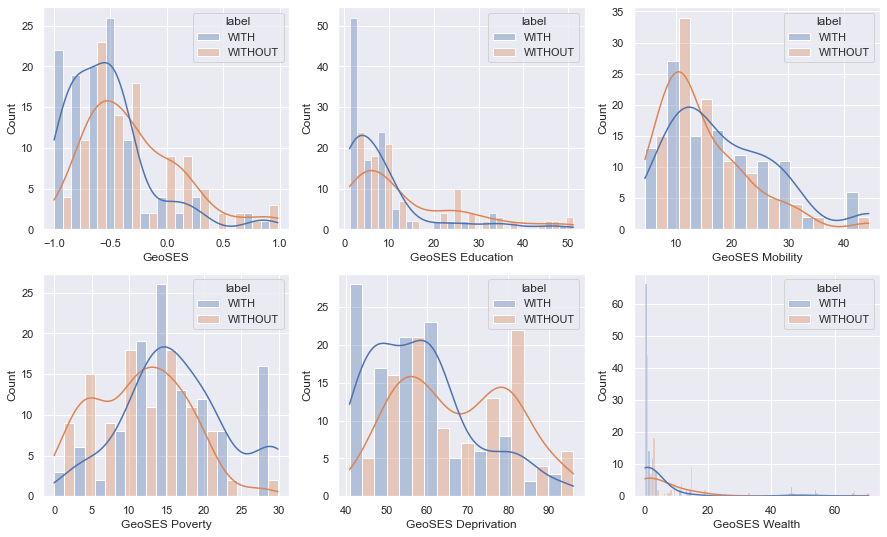

In [ ]:
geoses = ['GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza']

geodict = {
    'GeoSES':'GeoSES',
    'geoses_educ':'GeoSES Education',
    'geoses_mobilidade': 'GeoSES Mobility',
    'geoses_pobreza':'GeoSES Poverty',
    'geoses_privacao':'GeoSES Deprivation',
    'geoses_riqueza':'GeoSES Wealth'
}

fig,axs = plt.subplots(2,3, figsize=(15,9))

sns.histplot(ax=axs[0,0], x='GeoSES', data=bh_tot, hue='label', alpha=0.35, kde=True, multiple='dodge').set(xlabel=geodict['GeoSES'])

sns.histplot(ax=axs[0,1], x='geoses_educ', data=bh_tot,  kde=True, hue='label', alpha=0.35, multiple='dodge').set(xlabel=geodict['geoses_educ'])

sns.histplot(ax=axs[0,2], x='geoses_mobilidade', data=bh_tot,  kde=True, hue='label', alpha=0.35, multiple='dodge').set(xlabel=geodict['geoses_mobilidade'])

sns.histplot(ax=axs[1,0], x='geoses_pobreza', data=bh_tot,  kde=True, hue='label', alpha=0.35, multiple='dodge').set(xlabel=geodict['geoses_pobreza'])

sns.histplot(ax=axs[1,1], x='geoses_privacao', data=bh_tot,  kde=True, hue='label', alpha=0.35, multiple='dodge').set(xlabel=geodict['geoses_privacao'])

sns.histplot(ax=axs[1,2], x='geoses_riqueza', data=bh_tot,  kde=True, hue='label', alpha=0.35, multiple='dodge').set(xlabel=geodict['geoses_riqueza'])


plt.show()
      

### 3.1.2 - BH favelas - Food Establishments

**OBS: Only favelas with at least one establishments were analyzed**

In [ ]:
bh_com_estab

NOME_LOCAL  QTDE_DOMIC  QTDE_POPUL    GeoSES  geoses_educ  \
2          Conjunto Minascaixa        1316        4421 -0.683904     4.935801   
3                     Apolônia        1849        6016 -0.601408     4.767544   
4         Vila Jardim Alvorada        1080        3189 -0.592701     5.480530   
7    Santo Antônio Barroquinha         179         571 -0.284853    12.243991   
9            Jardim Felicidade        4459       15486 -0.950423     1.514914   
..                         ...         ...         ...       ...          ...   
210               Helena Greco         160         495 -0.950423     1.514914   
211                Novo Lajedo         457        1430 -0.950423     1.514914   
213         Conjunto H2-Prosam         258         866 -0.342781     7.591960   
214         Conjunto H5-Prosam         225         796 -0.469905     6.550989   
215         Castelo de Manacás         171         481 -0.592701     5.480530   

     geoses_mobilidade  geoses_pobreza  geoses_privacao  geoses_riqueza  \
2            25.788103       17.699229        58.369136        0.000000   
3            22.275698       13.878860        54.822315        3.228815   
4            18.209920       16.953926        58.697603        0.000000   
7            17.274330        8.580177        73.495786        1.570686   
9            25.045192       28.146226        40.859388        0.000000   
..                 ...             ...              ...             ...   
210          25.045192       28.146226        40.859388        0.000000   
211          25.045192       28.146226        40.859388        0.000000   
213          10.236786       10.864816        66.596341        3.797146   
214          11.132672       12.914350        58.972382        0.000000   
215          18.209920       16.953926        58.697603        0.000000   

     perc_sobreposicao  ...  qtd_estab_in_natura  qtd_estab_misto  \
2             1.000000  ...                    0               17   
3             1.000000  ...                    4               65   
4             0.999695  ...                    0               32   
7             1.000000  ...                    3                5   
9             0.998393  ...                   17              159   
..                 ...  ...                  ...              ...   
210           0.569255  ...                    0                1   
211           0.997685  ...                    3               25   
213           1.000000  ...                    0                3   
214           0.954861  ...                    0                6   
215           1.000000  ...                    0                5   

     qtd_estab_ultraproc  qtd_rede_eletrica  qtd_rede_esgoto  \
2                      1               7296             7296   
3                      1              21840            22139   
4                      0               3149             4050   
7                      0                 50               50   
9                      0              90763            90763   
..                   ...                ...              ...   
210                    0                252              252   
211                    1              12400            12177   
213                    0                  6                6   
214                    0                396              384   
215                    0                 45               45   

     qtd_pavimentacao  qtd_rede_telefonia  qtd_ilum_publica  qtd_meio_fio  \
2                7469                7296              7296          7296   
3               21543               21543             21543         21543   
4                3744                3149              3264          3264   
7                  50                  50                50            50   
9               91975               90763             89559         91368   
..                ...                 ...               ...           ...   
210      

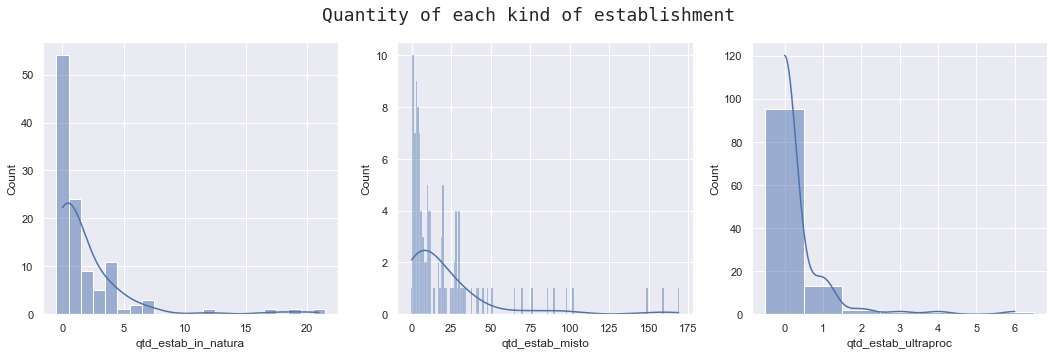

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(18,5))

font = {'fontname':'monospace'}
fig.suptitle('Quantity of each kind of establishment', **font, fontsize=18)

sns.histplot(ax=axs[0],x='qtd_estab_in_natura', data=bh_com_estab, kde=True, discrete=True)
sns.histplot(ax=axs[1],x='qtd_estab_misto', data=bh_com_estab, kde=True, discrete=True)
sns.histplot(ax=axs[2],x='qtd_estab_ultraproc', data=bh_com_estab, kde=True, discrete=True)

plt.show()


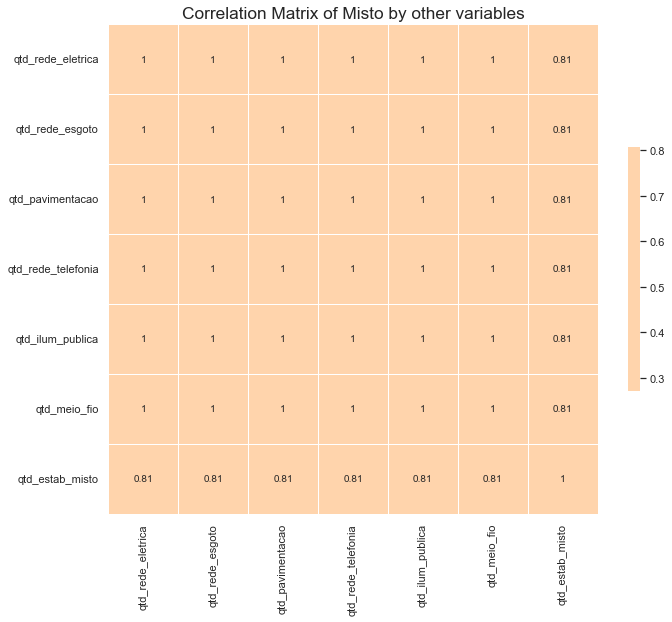

In [ ]:
corr = n.corr()

fig, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Misto by other variables', fontsize='xx-large')
plt.show()

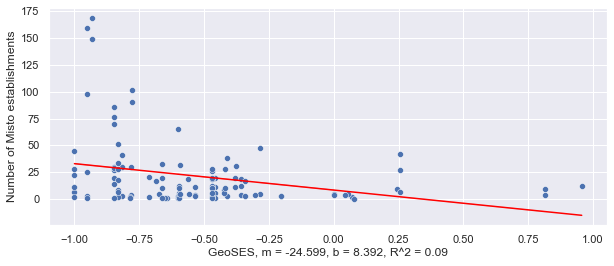

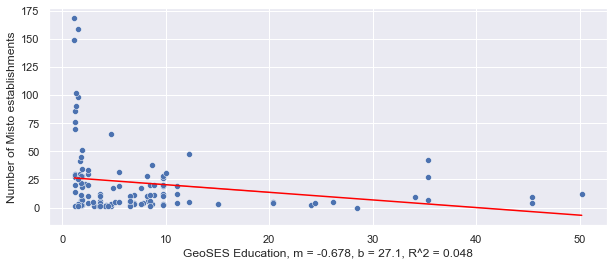

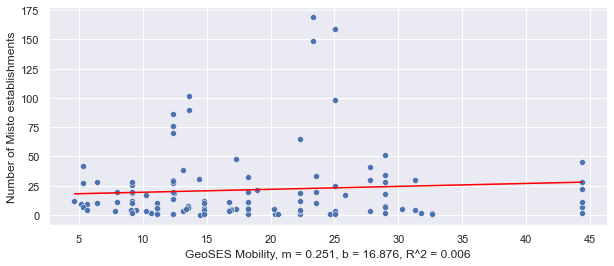

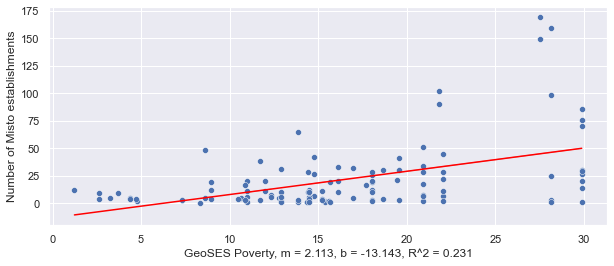

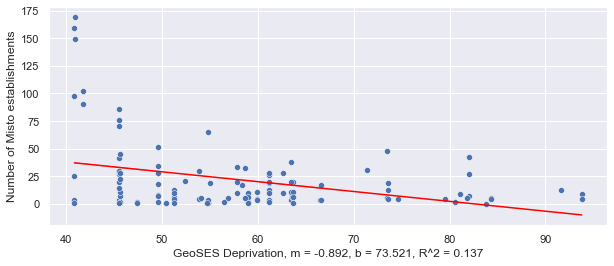

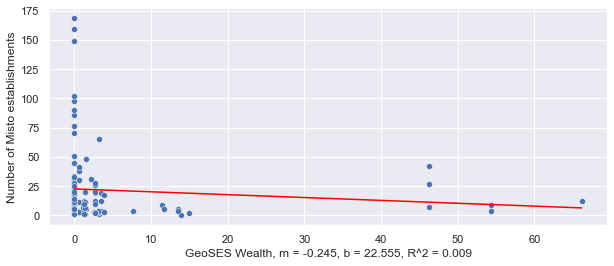

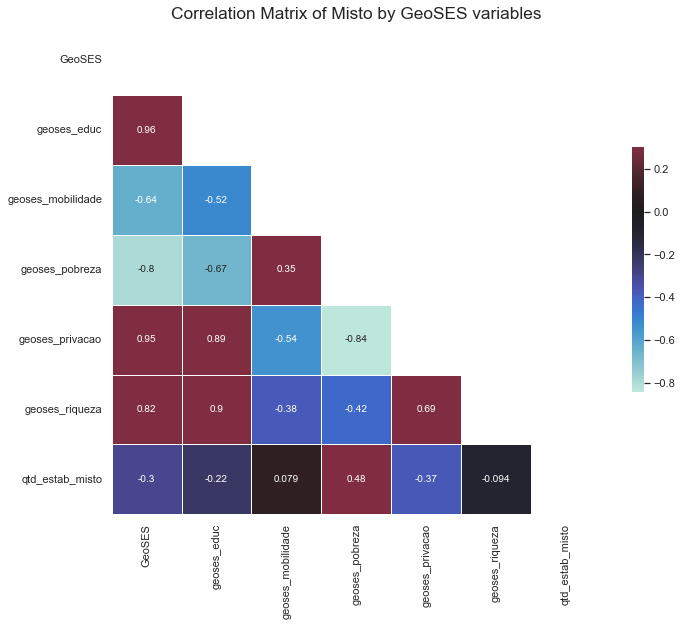

In [ ]:
geoses = ['GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza']

geodict = {
    'GeoSES':'GeoSES',
    'geoses_educ':'GeoSES Education',
    'geoses_mobilidade': 'GeoSES Mobility',
    'geoses_pobreza':'GeoSES Poverty',
    'geoses_privacao':'GeoSES Deprivation',
    'geoses_riqueza':'GeoSES Wealth'
}


for geo in geoses:
    fig, ax = plt.subplots(figsize=(10,4))
    m,b = np.polyfit(bh_com_estab[geo], bh_com_estab['qtd_estab_misto'],1)
    r2 = r2_score(bh_com_estab['qtd_estab_misto'], m*bh_com_estab[geo] + b)
    
    sns.scatterplot(ax=ax, x=geo, y='qtd_estab_misto', data=bh_com_estab)
    sns.lineplot(ax=ax, x=bh_com_estab[geo],y=m*bh_com_estab[geo] + b, color='red')
    plt.ylabel('Number of Misto establishments')
    plt.xlabel(geodict[geo] + f', m = {m.round(3)}, b = {b.round(3)}, R^2 = {r2.round(3)}')
    
corr = bh_com_estab[['GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza', 'qtd_estab_misto']].corr()


mask = np.triu(np.ones_like(corr, dtype=bool))

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, annot=True, vmax=.3, center=0, mask=mask,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.title('Correlation Matrix of Misto by GeoSES variables', fontsize='xx-large')
    plt.show()

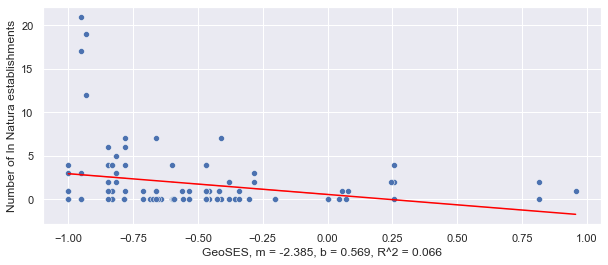

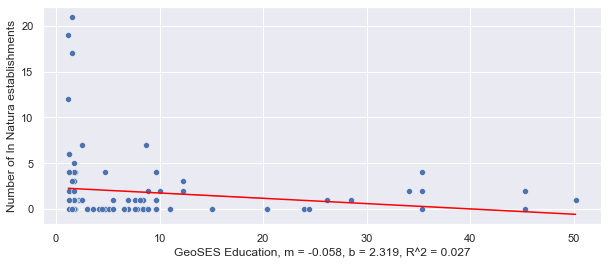

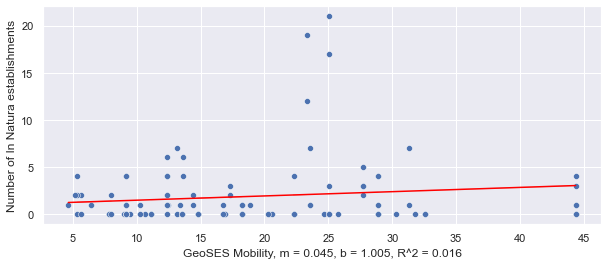

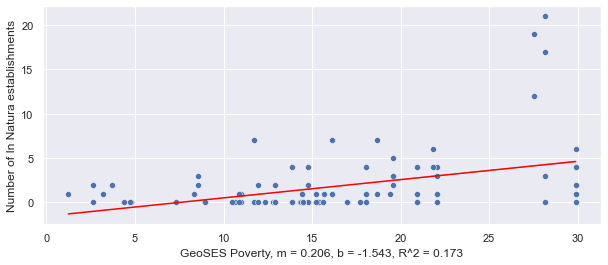

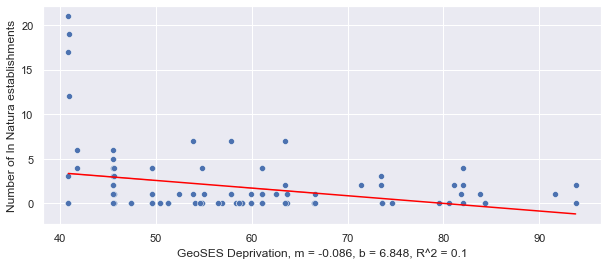

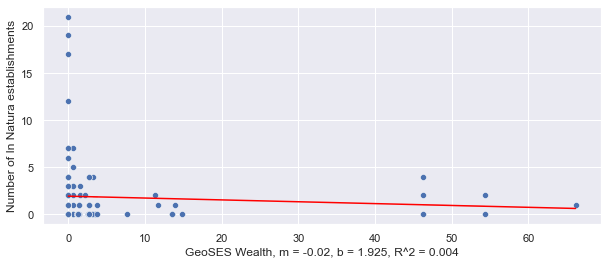

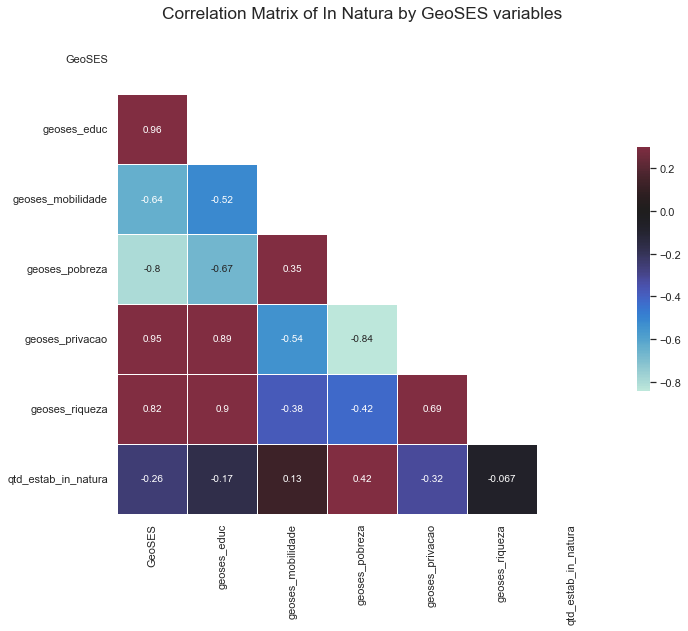

In [ ]:
geoses = ['GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza']

geodict = {
    'GeoSES':'GeoSES',
    'geoses_educ':'GeoSES Education',
    'geoses_mobilidade': 'GeoSES Mobility',
    'geoses_pobreza':'GeoSES Poverty',
    'geoses_privacao':'GeoSES Deprivation',
    'geoses_riqueza':'GeoSES Wealth'
}


for geo in geoses:
    fig, ax = plt.subplots(figsize=(10,4))
    m,b = np.polyfit(bh_com_estab[geo], bh_com_estab['qtd_estab_in_natura'],1)
    r2 = r2_score(bh_com_estab['qtd_estab_in_natura'], m*bh_com_estab[geo] + b)
    
    sns.scatterplot(ax=ax, x=geo, y='qtd_estab_in_natura', data=bh_com_estab)
    sns.lineplot(ax=ax, x=bh_com_estab[geo],y=m*bh_com_estab[geo] + b, color='red')
    plt.ylabel('Number of In Natura establishments')
    plt.xlabel(geodict[geo] + f', m = {m.round(3)}, b = {b.round(3)}, R^2 = {r2.round(3)}')
    
corr = bh_com_estab[['GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza', 'qtd_estab_in_natura']].corr()


mask = np.triu(np.ones_like(corr, dtype=bool))

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, annot=True, vmax=.3, center=0, mask=mask,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.title('Correlation Matrix of In Natura by GeoSES variables', fontsize='xx-large')
    plt.show()


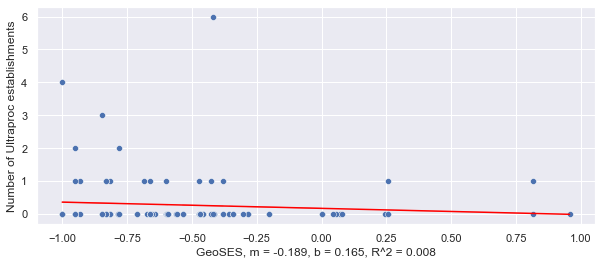

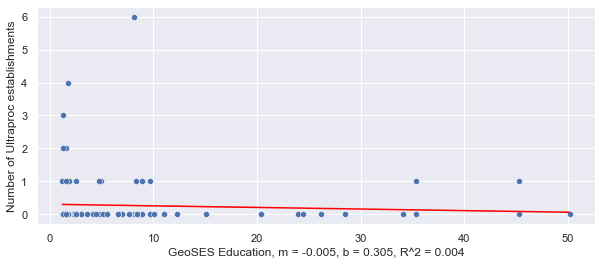

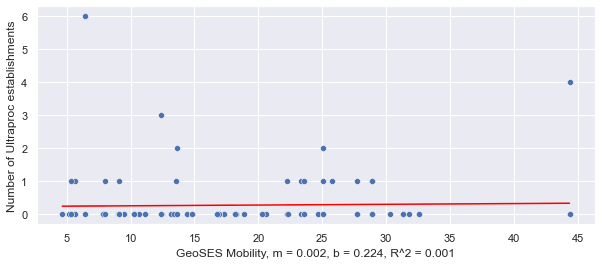

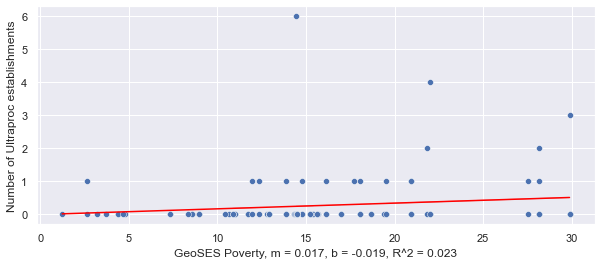

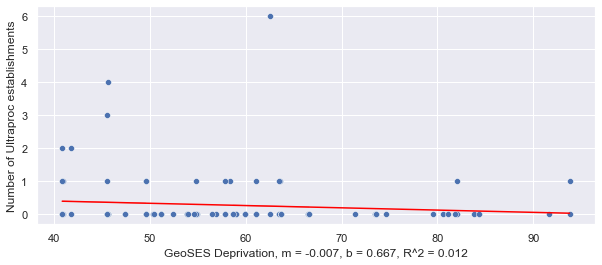

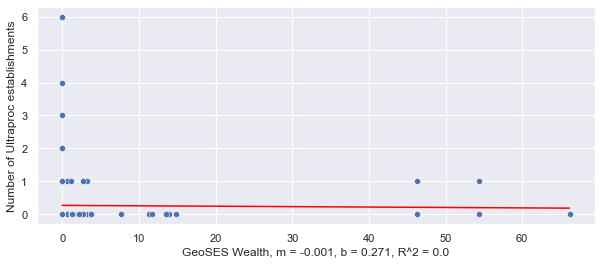

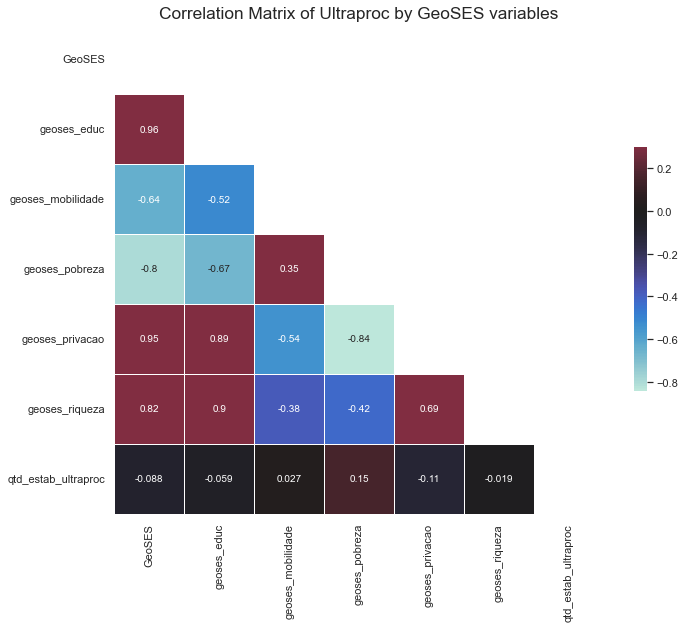

In [ ]:
geoses = ['GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza']

geodict = {
    'GeoSES':'GeoSES',
    'geoses_educ':'GeoSES Education',
    'geoses_mobilidade': 'GeoSES Mobility',
    'geoses_pobreza':'GeoSES Poverty',
    'geoses_privacao':'GeoSES Deprivation',
    'geoses_riqueza':'GeoSES Wealth'
}


for geo in geoses:
    fig, ax = plt.subplots(figsize=(10,4))
    m,b = np.polyfit(bh_com_estab[geo], bh_com_estab['qtd_estab_ultraproc'],1)
    r2 = r2_score(bh_com_estab['qtd_estab_ultraproc'], m*bh_com_estab[geo] + b)
    
    sns.scatterplot(ax=ax, x=geo, y='qtd_estab_ultraproc', data=bh_com_estab)
    sns.lineplot(ax=ax, x=bh_com_estab[geo],y=m*bh_com_estab[geo] + b, color='red')
    plt.ylabel('Number of Ultraproc establishments')
    plt.xlabel(geodict[geo] + f', m = {m.round(3)}, b = {b.round(3)}, R^2 = {r2.round(3)}')
    
corr = bh_com_estab[['GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza', 'qtd_estab_ultraproc']].corr()


mask = np.triu(np.ones_like(corr, dtype=bool))

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, annot=True, vmax=.3, center=0, mask=mask,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.title('Correlation Matrix of Ultraproc by GeoSES variables', fontsize='xx-large')
    plt.show()

* income vs. qty of estab (non-favela)
* income vs. qty of estab (favela)
* infra (plot favela vs. non-favela)
* qty estabs (plot favela vs. non-favela)
* mobility (data wise)

<AxesSubplot:xlabel='qtd_estab_in_natura', ylabel='qtd_estab_ultraproc'>

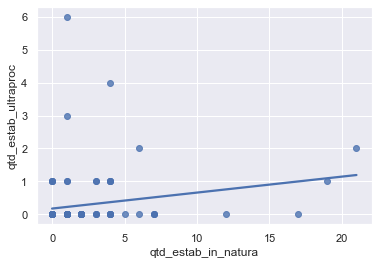

In [ ]:
sns.regplot(x='qtd_estab_in_natura', y='qtd_estab_ultraproc', data=bh_com_estab, ci=None)

<AxesSubplot:xlabel='qtd_estab_misto', ylabel='qtd_estab_ultraproc'>

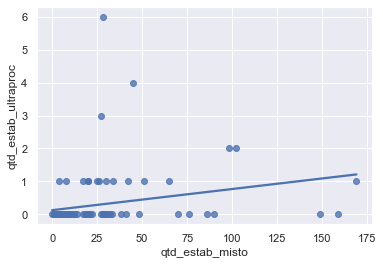

In [ ]:
sns.regplot(x='qtd_estab_misto', y='qtd_estab_ultraproc', data=bh_com_estab, ci=None)

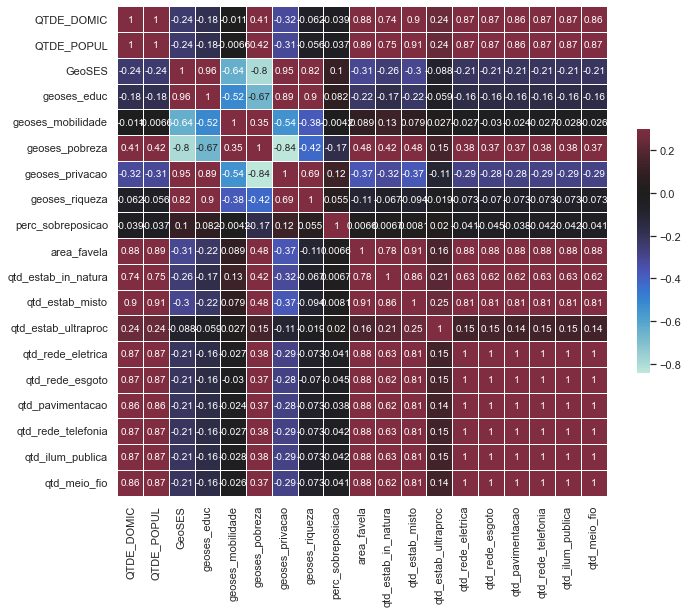

In [ ]:
corr = bh_com_estab.corr()

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, annot=True, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.title('', fontsize='xx-large')
    plt.show()

## Section 3.2 - Comparison SP vs. BH

### 3.2.1 - SP vs. BH - GeoSES vs. Food Establishments

**OBS: Only favelas with at least one food establishment were included**

In [ ]:
sp_data = data_w_food[['nome', 'GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza', 'qtd_estab_misto', 'qtd_estab_in_natura', 'qtd_estab_ultraproc']]

sp_data = sp_data.rename(columns={'nome':'NOME_LOCAL'})

# TAKING OUT PARAISOPOLIS AND HELIOPOLIS 
sp_data = sp_data[(sp_data.NOME_LOCAL != 'PARAISÓPOLIS') & (sp_data.NOME_LOCAL != 'HELIÓPOLIS')]

sp_label = ['SP']*len(sp_data)
sp_data = sp_data.assign(label=sp_label)

sp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 3 to 1659
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOME_LOCAL           266 non-null    object 
 1   GeoSES               266 non-null    float64
 2   geoses_educ          266 non-null    float64
 3   geoses_mobilidade    266 non-null    float64
 4   geoses_pobreza       266 non-null    float64
 5   geoses_privacao      266 non-null    float64
 6   geoses_riqueza       266 non-null    float64
 7   qtd_estab_misto      266 non-null    int64  
 8   qtd_estab_in_natura  266 non-null    int64  
 9   qtd_estab_ultraproc  266 non-null    int64  
 10  label                266 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 24.9+ KB


In [ ]:
bh_data = bh_com_estab[['NOME_LOCAL', 'GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza', 'qtd_estab_misto', 'qtd_estab_in_natura', 'qtd_estab_ultraproc']]

bh_label = ['BH']*len(bh_data)
bh_data = bh_data.assign(label=bh_label)
bh_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 2 to 215
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOME_LOCAL           113 non-null    object 
 1   GeoSES               113 non-null    float64
 2   geoses_educ          113 non-null    float64
 3   geoses_mobilidade    113 non-null    float64
 4   geoses_pobreza       113 non-null    float64
 5   geoses_privacao      113 non-null    float64
 6   geoses_riqueza       113 non-null    float64
 7   qtd_estab_misto      113 non-null    int64  
 8   qtd_estab_in_natura  113 non-null    int64  
 9   qtd_estab_ultraproc  113 non-null    int64  
 10  label                113 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ KB


In [ ]:
tot_data = pd.concat([sp_data, bh_data], axis=0, ignore_index=True)
tot_data

NOME_LOCAL    GeoSES  geoses_educ  geoses_mobilidade  \
0       PARQUE EUROPA I -0.492236     3.658718          16.445389   
1    JARDIM VARGINHA II -0.701125     1.794023          11.533260   
2         VILA XAVANTES -0.409879     5.775202          24.145613   
3      IMPRENSA COLONOS -0.113333    18.113060          32.052558   
4      JARDIM ITAPURA I -0.461997     5.091177          15.489431   
..                  ...       ...          ...                ...   
374        Helena Greco -0.950423     1.514914          25.045192   
375         Novo Lajedo -0.950423     1.514914          25.045192   
376  Conjunto H2-Prosam -0.342781     7.591960          10.236786   
377  Conjunto H5-Prosam -0.469905     6.550989          11.132672   
378  Castelo de Manacás -0.592701     5.480530          18.209920   

     geoses_pobreza  geoses_privacao  geoses_riqueza  qtd_estab_misto  \
0         14.730334        64.584267        0.589251               14   
1         19.933326        42.289853        0.000000               13   
2         11.925157        65.363420        0.419275                1   
3         10.221195        77.733148       17.217582                3   
4         11.335611        63.342403        0.000000                2   
..              ...              ...             ...              ...   
374       28.146226        40.859388        0.000000                1   
375       28.146226        40.859388        0.000000               25   
376       10.864816        66.596341        3.797146                3   
377       12.914350        58.972382        0.000000                6   
378       16.953926        58.697603        0.000000                5   

     qtd_estab_in_natura  qtd_estab_ultraproc label  
0                      0                    2    SP  
1                      3                    6    SP  
2                      0                    0    SP  
3                      0                    1    SP  
4                      0                    0    SP  
..                   ...                  ...   ...  
374                    0                    0    BH  
375                    3                    1    BH  
376                    0                    0    BH  
377                    0                    0    BH  
378                    0                    0    BH  

[379 rows x 11 columns]

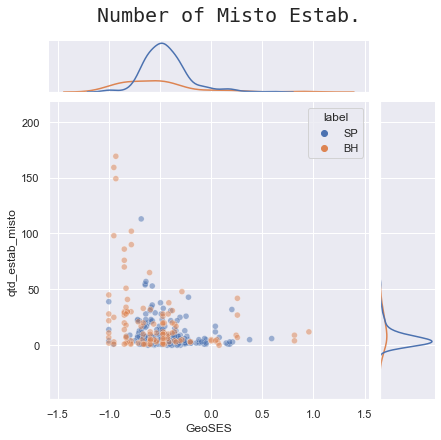

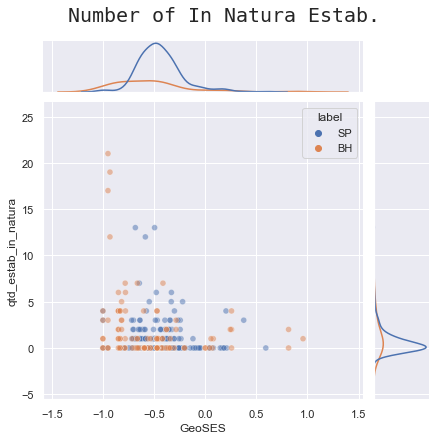

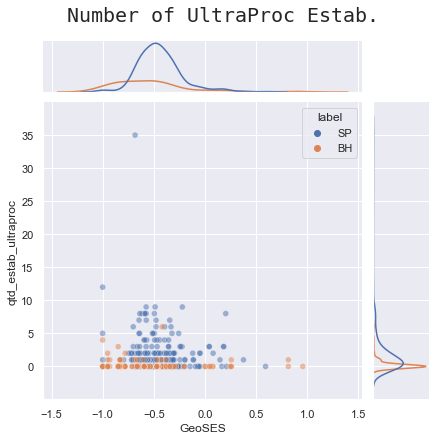

In [ ]:
for estab in ['qtd_estab_misto', 'qtd_estab_in_natura','qtd_estab_ultraproc']:    
    g = sns.JointGrid()
    sns.scatterplot(x='GeoSES', y=estab, data=tot_data, hue='label', ax=g.ax_joint, alpha=0.5)
    sns.kdeplot(x='GeoSES',data=tot_data, hue='label', ax=g.ax_marg_x, legend=False)
    sns.kdeplot(y=estab,data=tot_data, hue='label', ax=g.ax_marg_y, legend=False)

    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(estabdict[estab], fontname='monospace', fontsize=20)

## Section 3.3 - SP with at least one food establishment 

**Here, I divide the dataset for favelas of SP with at least one food establishment into 4 quadrants. The analysis focuses on the first (bottom left) quadrant.**

**OBS: PARAISOPOLIS and HELIOPOLIS were taken out, AS WELL AS favelas with less than 4 food establishments.**

In [ ]:
# data_w_food.info()
data_w_food['total'] = data_w_food['qtd_estab_in_natura'] + data_w_food['qtd_estab_misto'] + data_w_food['qtd_estab_ultraproc']

data_w_food = data_w_food[(data_w_food.nome != 'PARAISÓPOLIS') & (data_w_food.nome != 'HELIÓPOLIS')]
data_w_food_f = data_w_food[data_w_food.total >= 4] 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 3 to 1659
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gid                     268 non-null    int64  
 1   nome                    268 non-null    object 
 2   COD_AED                 268 non-null    int64  
 3   GeoSES                  268 non-null    float64
 4   geoses_educ             268 non-null    float64
 5   geoses_mobilidade       268 non-null    float64
 6   geoses_pobreza          268 non-null    float64
 7   geoses_privacao         268 non-null    float64
 8   geoses_riqueza          268 non-null    float64
 9   perc_sobreposicao       268 non-null    float64
 10  area_favela             268 non-null    float64
 11  geom                    268 non-null    object 
 12  anoocupacao             268 non-null    float64
 13  totdomicilio            268 non-null    float64
 14  habita_area             268 non-null    f

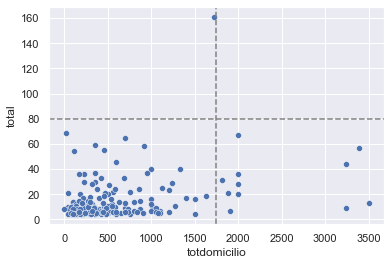

In [ ]:
fig, ax = plt.subplots() 

sns.scatterplot(ax=ax, x='totdomicilio', y='total', data=data_w_food_f)

ax.axhline(80, ls='--', color='grey') # change to weighted average
ax.axvline(1750, ls='--', color='grey')


In [ ]:
primeiro_quad = data_w_food_f[(data_w_food_f.totdomicilio <= 1750) & (data_w_food_f.total <= 80)]
quarto_quad = data_w_food_f[(data_w_food_f.totdomicilio >= 1750) & (data_w_food_f.total <= 80)]


primeiro_quad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 3 to 1644
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gid                     156 non-null    int64  
 1   nome                    156 non-null    object 
 2   COD_AED                 156 non-null    int64  
 3   GeoSES                  156 non-null    float64
 4   geoses_educ             156 non-null    float64
 5   geoses_mobilidade       156 non-null    float64
 6   geoses_pobreza          156 non-null    float64
 7   geoses_privacao         156 non-null    float64
 8   geoses_riqueza          156 non-null    float64
 9   perc_sobreposicao       156 non-null    float64
 10  area_favela             156 non-null    float64
 11  geom                    156 non-null    object 
 12  anoocupacao             156 non-null    float64
 13  totdomicilio            156 non-null    float64
 14  habita_area             156 non-null    f

<AxesSubplot:xlabel='Count', ylabel='total'>

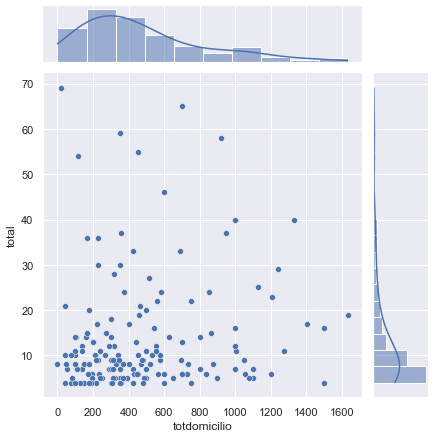

In [ ]:
g = sns.JointGrid()
sns.scatterplot(x='totdomicilio', y='total', data=primeiro_quad, ax=g.ax_joint)
sns.histplot(x='totdomicilio', data=primeiro_quad, ax=g.ax_marg_x, kde=True)
sns.histplot(y='total', data=primeiro_quad, ax=g.ax_marg_y, kde=True)

### 3.3.1 - GeoSES vs. Total number of establishments

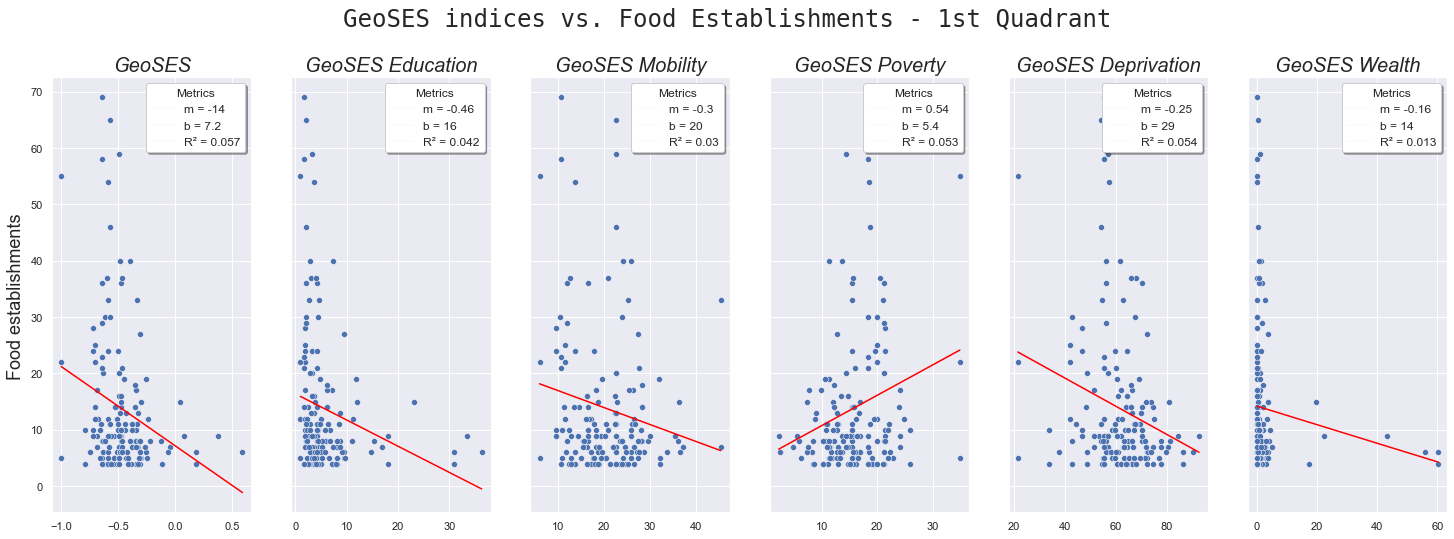

In [ ]:
from matplotlib.lines import Line2D

geoses = ['GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza']

geodict = {
    'GeoSES':'GeoSES',
    'geoses_educ':'GeoSES Education',
    'geoses_mobilidade': 'GeoSES Mobility',
    'geoses_pobreza':'GeoSES Poverty',
    'geoses_privacao':'GeoSES Deprivation',
    'geoses_riqueza':'GeoSES Wealth'
}

fig, axs = plt.subplots(1,6, figsize=(25,8), sharey=True)
fig.text(0.5, 0.97, 'GeoSES indices vs. Food Establishments - 1st Quadrant', ha='center', fontsize=24, fontname='monospace')
fig.text(0.1, 0.5, 'Food establishments', va='center', rotation='vertical', fontsize=18)

for ix,geo in enumerate(geoses):
    ax = axs[ix]
    ax.set_title(geodict[geo], fontsize=20, fontstyle='italic')
    m,b = np.polyfit(primeiro_quad[geo], primeiro_quad['total'],1)
    r2 = r2_score(primeiro_quad['total'], m*primeiro_quad[geo] + b)   
    
    sns.scatterplot(ax=ax, x=geo, y='total', data=primeiro_quad).set(ylabel=None)
    sns.lineplot(ax=ax, x=primeiro_quad[geo],y=m*primeiro_quad[geo] + b, color='red').set(ylabel=None, xlabel=None)

    handles = [
    Line2D([0], [0], color='lightgrey',lw=0.1),
    Line2D([0], [0], color='lightgrey',lw=.1),
    Line2D([0], [0], color='lightgrey',lw=.1)
    ]

    labels_ = []
    labels_.append("m = {0:.2g}".format(m))
    labels_.append("b = {0:.2g}".format(b))
    labels_.append("R² = {0:.2g}".format(r2))
    ax.legend(handles, labels_, loc='upper right', fontsize='large',
          fancybox=True,shadow=True, framealpha=1, frameon=True, facecolor='white', title='Metrics')

### 3.3.2 - Infrastructure vs. Total number of establishments

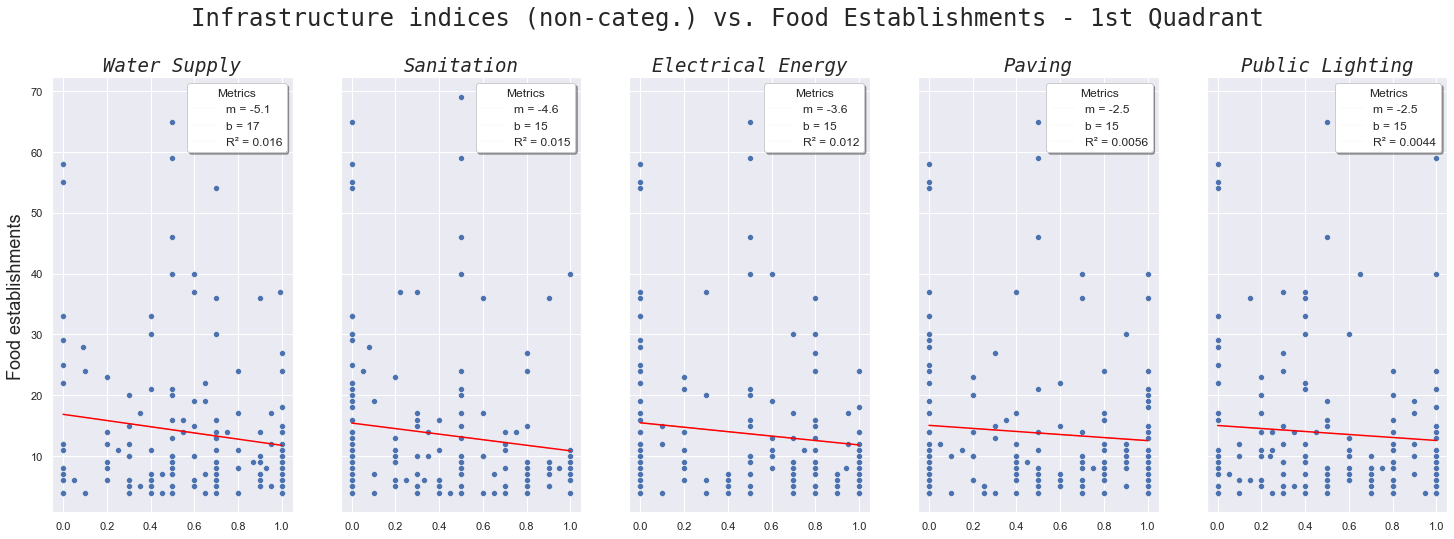

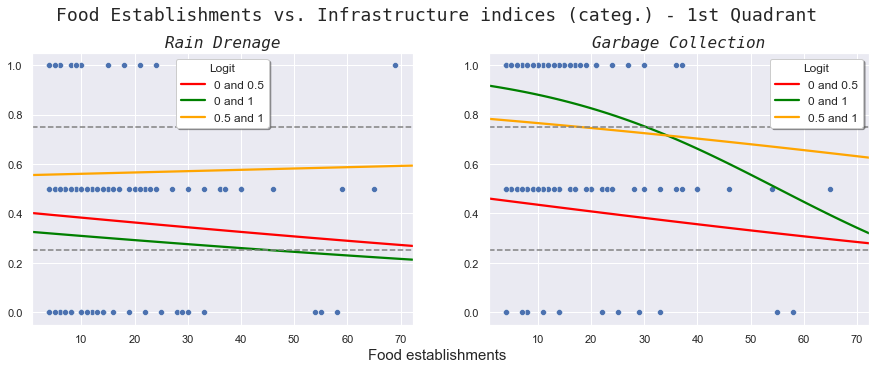

In [ ]:
from matplotlib.lines import Line2D

eixos = {
        'abastecimentoagua': 'Water Supply',
        'esgotamentosanitario':'Sanitation',
        'redeeletricadomiciliar':'Electrical Energy',
        'viaspavimentadas':'Paving',
        'iluminacaopublica':'Public Lighting',
        'drenagempluvial':'Rain Drenage',
        'coletalixo':'Garbage Collection'
        }


fig, axs = plt.subplots(1,5, figsize=(25,8), sharey=True)
fig.text(0.5, 0.97, 'Infrastructure indices (non-categ.) vs. Food Establishments - 1st Quadrant', ha='center', fontsize=24, fontname='monospace')
fig.text(0.1, 0.5, 'Food establishments', va='center', rotation='vertical', fontsize=18)

for ix,infr in enumerate(eixos):
    
    if infr not in ['drenagempluvial', 'coletalixo']:
        ax = axs[ix]
        ax.set_title(eixos[infr], fontsize=19, fontstyle='italic', fontname='monospace')
        sns.scatterplot(ax=ax, x=infr, y='total', data=primeiro_quad).set(ylabel=None)
        m,b = np.polyfit(primeiro_quad[infr], primeiro_quad['total'],1)
        r2 = r2_score(primeiro_quad['total'], m*primeiro_quad[infr] + b)   

        sns.lineplot(ax=ax, x=primeiro_quad[infr],y=m*primeiro_quad[infr] + b, color='red').set(ylabel=None, xlabel=None)
        
        handles = [
        Line2D([0], [0], color='lightgrey',lw=0.1),
        Line2D([0], [0], color='lightgrey',lw=.1),
        Line2D([0], [0], color='lightgrey',lw=.1)
        ]

        labels_ = []
        labels_.append("m = {0:.2g}".format(m))
        labels_.append("b = {0:.2g}".format(b))
        labels_.append("R² = {0:.2g}".format(r2))
        ax.legend(handles, labels_, loc='upper right', fontsize='large',
              fancybox=True,shadow=True, framealpha=1, frameon=True, facecolor='white', title='Metrics')

fig, axs = plt.subplots(1,2, figsize=(15,5), sharex=True)
fig.text(0.5, 0.97, 'Food Establishments vs. Infrastructure indices (categ.) - 1st Quadrant', ha='center', fontsize=18, fontname='monospace')
fig.text(0.5, 0.03, 'Food establishments', ha='center', fontsize=15)

for ix, infr in enumerate(['drenagempluvial', 'coletalixo']):
        ax=axs[ix]
        sns.scatterplot(ax=ax, x='total', y=infr, data=primeiro_quad).set(ylabel=None)
        ax.set_title(eixos[infr], fontsize=16, fontstyle='italic', fontname='monospace')
     
        W = [0, 0.5,1]
        colors=['red','green', 'orange']
        c= 0
        for ix in range(3):
            for ij in range(ix+1, 3):
                param1 = W[ix]
                param2 = W[ij]

                new_data = primeiro_quad[(primeiro_quad[infr] == param1) | (primeiro_quad[infr] == param2)]
                sns.regplot(ax=ax,x='total', y=infr,data=new_data, logistic=True, ci=None, 
                            scatter=False, label=f'{param1} and {param2}', truncate=False, 
                            line_kws={'color':colors[c]}).set(xlabel=None, ylabel=None)
                c+=1
                
        ax.legend(loc='best', fontsize='large',
              fancybox=True,shadow=True, framealpha=1, frameon=True, facecolor='white', title='Logit')
        
        ax.axhline(0.75, ls='--', color='grey')
        ax.axhline(0.25, ls='--', color='grey')
                




* bh favela estabs & geoses / eletrica/area 
* estabs & geoses / pavi/area
* misto, in natura, ultra - area

# Week 4

### Section 4.1 - Analysis BH Favelas (with at least one estab.) Estab. per infrastructure/area

#### new infrastructure factor = old infra / area

In [ ]:
bh_com_estab.columns

Index(['NOME_LOCAL', 'QTDE_DOMIC', 'QTDE_POPUL', 'GeoSES', 'geoses_educ',
       'geoses_mobilidade', 'geoses_pobreza', 'geoses_privacao',
       'geoses_riqueza', 'perc_sobreposicao', 'area_favela',
       'qtd_estab_in_natura', 'qtd_estab_misto', 'qtd_estab_ultraproc',
       'qtd_rede_eletrica', 'qtd_rede_esgoto', 'qtd_pavimentacao',
       'qtd_rede_telefonia', 'qtd_ilum_publica', 'qtd_meio_fio', 'label'],
      dtype='object')

#### 4.1.1 - electrical energy/area & paving/area

In [ ]:
bh_c_estab = bh_com_estab[['NOME_LOCAL','GeoSES','qtd_rede_eletrica', 'qtd_pavimentacao', 'area_favela','QTDE_DOMIC','QTDE_POPUL', 'qtd_estab_in_natura',
                           'qtd_estab_misto','qtd_estab_ultraproc']]

bh_c_estab

NOME_LOCAL    GeoSES  qtd_rede_eletrica  qtd_pavimentacao  \
2          Conjunto Minascaixa -0.683904               7296              7469   
3                     Apolônia -0.601408              21840             21543   
4         Vila Jardim Alvorada -0.592701               3149              3744   
7    Santo Antônio Barroquinha -0.284853                 50                50   
9            Jardim Felicidade -0.950423              90763             91975   
..                         ...       ...                ...               ...   
210               Helena Greco -0.950423                252               252   
211                Novo Lajedo -0.950423              12400             12177   
213         Conjunto H2-Prosam -0.342781                  6                 6   
214         Conjunto H5-Prosam -0.469905                396               384   
215         Castelo de Manacás -0.592701                 45                45   

      area_favela  QTDE_DOMIC  QTDE_POPUL  qtd_estab_in_natura  \
2    200047.28300        1316        4421                    0   
3    199511.92040        1849        6016                    4   
4    228715.04960        1080        3189                    0   
7     28118.16954         179         571                    3   
9    802272.96480        4459       15486                   17   
..            ...         ...         ...                  ...   
210   19754.75828         160         495                    0   
211  395315.68780         457        1430                    3   
213   28484.96356         258         866                    0   
214   49880.38619         225         796                    0   
215   64596.98403         171         481                    0   

     qtd_estab_misto  qtd_estab_ultraproc  
2                 17                    1  
3                 65                    1  
4                 32                    0  
7                  5                    0  
9                159                    0  
..               ...                  ...  
210                1                    0  
211               25                    1  
213                3                    0  
214                6                    0  
215                5                    0  

[113 rows x 10 columns]

In [ ]:
bh_c_estab['n_rede_eletrica'] = bh_c_estab['qtd_rede_eletrica']/bh_c_estab['area_favela']

bh_c_estab['n_pavimentacao'] = bh_c_estab['qtd_pavimentacao']/bh_c_estab['area_favela']

bh_c_estab

/var/folders/6n/0vgsmrcs3k75rldnm523j4600000gp/T/ipykernel_2176/912579917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bh_c_estab['n_rede_eletrica'] = bh_c_estab['qtd_rede_eletrica']/bh_c_estab['area_favela']
/var/folders/6n/0vgsmrcs3k75rldnm523j4600000gp/T/ipykernel_2176/912579917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bh_c_estab['n_pavimentacao'] = bh_c_estab['qtd_pavimentacao']/bh_c_estab['area_favela']


NOME_LOCAL    GeoSES  qtd_rede_eletrica  qtd_pavimentacao  \
2          Conjunto Minascaixa -0.683904               7296              7469   
3                     Apolônia -0.601408              21840             21543   
4         Vila Jardim Alvorada -0.592701               3149              3744   
7    Santo Antônio Barroquinha -0.284853                 50                50   
9            Jardim Felicidade -0.950423              90763             91975   
..                         ...       ...                ...               ...   
210               Helena Greco -0.950423                252               252   
211                Novo Lajedo -0.950423              12400             12177   
213         Conjunto H2-Prosam -0.342781                  6                 6   
214         Conjunto H5-Prosam -0.469905                396               384   
215         Castelo de Manacás -0.592701                 45                45   

      area_favela  QTDE_DOMIC  QTDE_POPUL  qtd_estab_in_natura  \
2    200047.28300        1316        4421                    0   
3    199511.92040        1849        6016                    4   
4    228715.04960        1080        3189                    0   
7     28118.16954         179         571                    3   
9    802272.96480        4459       15486                   17   
..            ...         ...         ...                  ...   
210   19754.75828         160         495                    0   
211  395315.68780         457        1430                    3   
213   28484.96356         258         866                    0   
214   49880.38619         225         796                    0   
215   64596.98403         171         481                    0   

     qtd_estab_misto  qtd_estab_ultraproc  n_rede_eletrica  n_pavimentacao  
2                 17                    1         0.036471        0.037336  
3                 65                    1         0.109467        0.107979  
4                 32                    0         0.013768        0.016370  
7                  5                    0         0.001778        0.001778  
9                159                    0         0.113132        0.114643  
..               ...                  ...              ...             ...  
210                1                    0         0.012756        0.012756  
211               25                    1         0.031367        0.030803  
213                3                    0         0.000211        0.000211  
214                6                    0         0.007939        0.007698  
215                5                    0         0.000697        0.000697  

[113 rows x 12 columns]

<AxesSubplot:xlabel='n_pavimentacao', ylabel='GeoSES'>

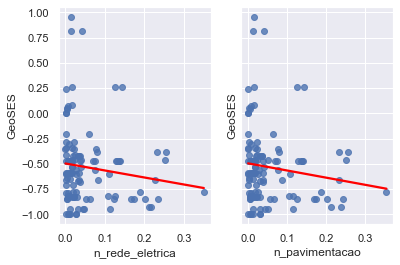

In [ ]:
fig, axs = plt.subplots(1,2, sharey=True)
sns.regplot(ax=axs[0], x='n_rede_eletrica', y='GeoSES', data=bh_c_estab, ci=None, line_kws={'color':'red'})
sns.regplot(ax=axs[1], x='n_pavimentacao', y='GeoSES', data=bh_c_estab, ci=None, line_kws={'color':'red'})

<AxesSubplot:xlabel='n_pavimentacao', ylabel='qtd_estab_misto'>

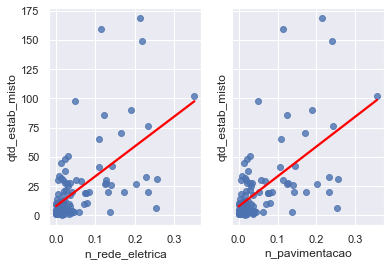

In [ ]:
fig, axs = plt.subplots(1,2, sharey=True)
sns.regplot(ax=axs[0], x='n_rede_eletrica', y='qtd_estab_misto', data=bh_c_estab, ci=None, line_kws={'color':'red'})
sns.regplot(ax=axs[1], x='n_pavimentacao', y='qtd_estab_misto', data=bh_c_estab, ci=None, line_kws={'color':'red'})

<AxesSubplot:xlabel='n_pavimentacao', ylabel='qtd_estab_in_natura'>

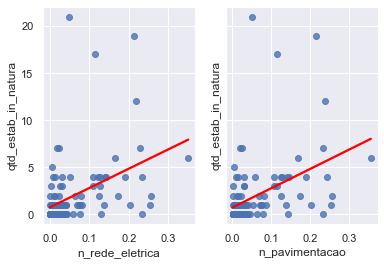

In [ ]:
fig, axs = plt.subplots(1,2, sharey=True)
sns.regplot(ax=axs[0], x='n_rede_eletrica', y='qtd_estab_in_natura', data=bh_c_estab, ci=None, line_kws={'color':'red'})
sns.regplot(ax=axs[1], x='n_pavimentacao', y='qtd_estab_in_natura', data=bh_c_estab, ci=None, line_kws={'color':'red'})

<AxesSubplot:xlabel='n_pavimentacao', ylabel='qtd_estab_ultraproc'>

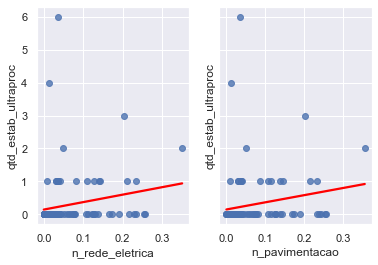

In [ ]:
fig, axs = plt.subplots(1,2, sharey=True)
sns.regplot(ax=axs[0], x='n_rede_eletrica', y='qtd_estab_ultraproc', data=bh_c_estab, ci=None, line_kws={'color':'red'})
sns.regplot(ax=axs[1], x='n_pavimentacao', y='qtd_estab_ultraproc', data=bh_c_estab, ci=None, line_kws={'color':'red'})

<AxesSubplot:xlabel='area_favela', ylabel='qtd_estab_ultraproc'>

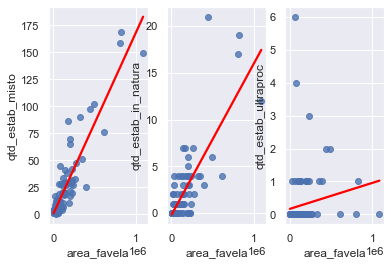

In [ ]:
fig, axs = plt.subplots(1,3)
sns.regplot(ax=axs[0], x='area_favela', y='qtd_estab_misto', data=bh_c_estab, ci=None, line_kws={'color':'red'})
sns.regplot(ax=axs[1], x='area_favela', y='qtd_estab_in_natura', data=bh_c_estab, ci=None, line_kws={'color':'red'})
sns.regplot(ax=axs[2], x='area_favela', y='qtd_estab_ultraproc', data=bh_c_estab, ci=None, line_kws={'color':'red'})

<AxesSubplot:xlabel='QTDE_DOMIC', ylabel='qtd_estab_ultraproc'>

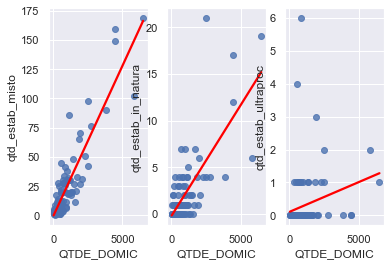

In [ ]:
fig, axs = plt.subplots(1,3)
sns.regplot(ax=axs[0], x='QTDE_DOMIC', y='qtd_estab_misto', data=bh_c_estab, ci=None, line_kws={'color':'red'})
sns.regplot(ax=axs[1], x='QTDE_DOMIC', y='qtd_estab_in_natura', data=bh_c_estab, ci=None, line_kws={'color':'red'})
sns.regplot(ax=axs[2], x='QTDE_DOMIC', y='qtd_estab_ultraproc', data=bh_c_estab, ci=None, line_kws={'color':'red'})

<AxesSubplot:xlabel='QTDE_POPUL', ylabel='qtd_estab_ultraproc'>

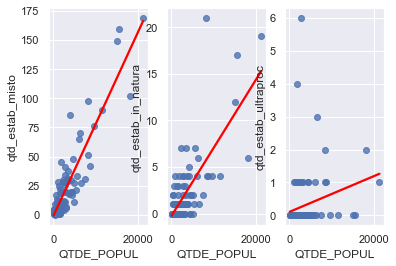

In [ ]:
fig, axs = plt.subplots(1,3)
sns.regplot(ax=axs[0], x='QTDE_POPUL', y='qtd_estab_misto', data=bh_c_estab, ci=None, line_kws={'color':'red'})
sns.regplot(ax=axs[1], x='QTDE_POPUL', y='qtd_estab_in_natura', data=bh_c_estab, ci=None, line_kws={'color':'red'})
sns.regplot(ax=axs[2], x='QTDE_POPUL', y='qtd_estab_ultraproc', data=bh_c_estab, ci=None, line_kws={'color':'red'})

#### 4.1.2 - Correlation Matrix BH w/o infrastructure factors

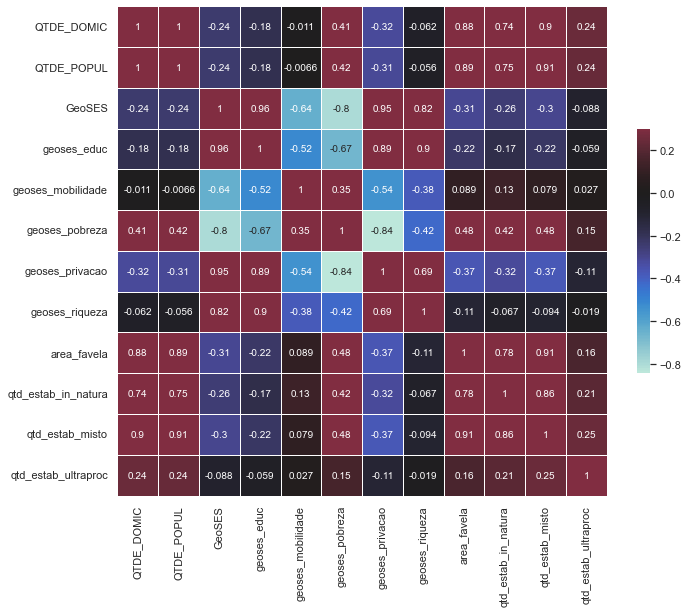

In [ ]:
new = bh_com_estab[['NOME_LOCAL', 'QTDE_DOMIC', 'QTDE_POPUL', 'GeoSES', 'geoses_educ',
       'geoses_mobilidade', 'geoses_pobreza', 'geoses_privacao',
       'geoses_riqueza', 'area_favela',
       'qtd_estab_in_natura', 'qtd_estab_misto', 'qtd_estab_ultraproc']]

corr = new.corr()

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, annot=True, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.title('', fontsize='xx-large')
    plt.show()
    

#### 4.1.3 - PCA w/ infra factors

In [ ]:
bh_c1_estab = bh_com_estab[['NOME_LOCAL','GeoSES','qtd_rede_eletrica', 'qtd_pavimentacao', 'area_favela', 
                           'qtd_rede_esgoto', 'qtd_rede_telefonia', 'qtd_ilum_publica', 'qtd_meio_fio',
                           'qtd_estab_in_natura', 'qtd_estab_misto', 'qtd_estab_ultraproc']]

bh_c1_estab[['qtd_rede_eletrica', 'qtd_pavimentacao', 'qtd_rede_esgoto', 'qtd_rede_telefonia', 'qtd_ilum_publica', 'qtd_meio_fio']]

qtd_rede_eletrica  qtd_pavimentacao  qtd_rede_esgoto  qtd_rede_telefonia  \
2                 7296              7469             7296                7296   
3                21840             21543            22139               21543   
4                 3149              3744             4050                3149   
7                   50                50               50                  50   
9                90763             91975            90763               90763   
..                 ...               ...              ...                 ...   
210                252               252              252                 252   
211              12400             12177            12177               12400   
213                  6                 6                6                   6   
214                396               384              384                 396   
215                 45                45               45                  45   

     qtd_ilum_publica  qtd_meio_fio  
2                7296          7296  
3               21543         21543  
4                3264          3264  
7                  50            50  
9               89559         91368  
..                ...           ...  
210               252           252  
211             12400         12400  
213                 6             6  
214               396           396  
215                45            45  

[113 rows x 6 columns]

In [ ]:
from sklearn.decomposition import PCA
bh_copy_estab = bh_c1_estab.copy()

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(bh_copy_estab[['qtd_rede_eletrica', 'qtd_pavimentacao', 'qtd_rede_esgoto', 'qtd_rede_telefonia', 'qtd_ilum_publica', 'qtd_meio_fio']])

bh_copy_estab['principal component 1'] = principalComponents[:, 0]
bh_copy_estab['principal component 2'] = principalComponents[:,1]

print(pca.components_.T * np.sqrt(pca.explained_variance_))

bh_copy_estab['principal component 2'] = bh_copy_estab['principal component 2']/bh_copy_estab['area_favela']
bh_copy_estab['principal component 1'] = bh_copy_estab['principal component 1']/bh_copy_estab['area_favela']

[[35891.04420274  -233.7683302 ]
 [37599.73893316  1283.2875951 ]
 [37563.54211042 -1054.97369535]
 [35919.6898324   -270.99238604]
 [35853.45966868  -226.1613788 ]
 [36558.28255174   481.69905282]]


<AxesSubplot:xlabel='principal component 2', ylabel='GeoSES'>

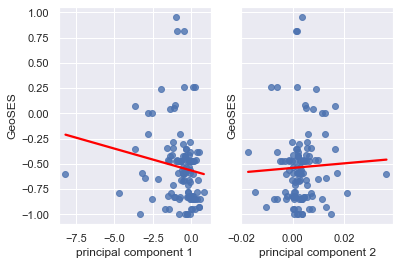

In [ ]:
fig, axs = plt.subplots(1,2, sharey=True)
sns.regplot(ax=axs[0], x=bh_copy_estab['principal component 1'], y=bh_copy_estab['GeoSES'], ci=None, line_kws={'color':'red'})
sns.regplot(ax=axs[1], x=bh_copy_estab['principal component 2'], y=bh_copy_estab['GeoSES'], ci=None, line_kws={'color':'red'})

<AxesSubplot:xlabel='principal component 2', ylabel='qtd_estab_misto'>

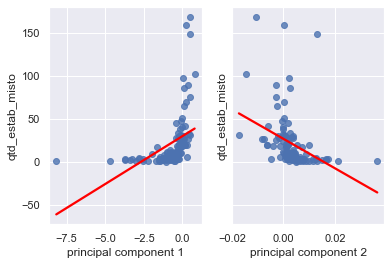

In [ ]:
fig, axs = plt.subplots(1,2, sharey=True)
sns.regplot(ax=axs[0], x=bh_copy_estab['principal component 1'], y=bh_copy_estab['qtd_estab_misto'], ci=None, line_kws={'color':'red'})
sns.regplot(ax=axs[1], x=bh_copy_estab['principal component 2'], y=bh_copy_estab['qtd_estab_misto'], ci=None, line_kws={'color':'red'})

<AxesSubplot:xlabel='principal component 2', ylabel='qtd_estab_in_natura'>

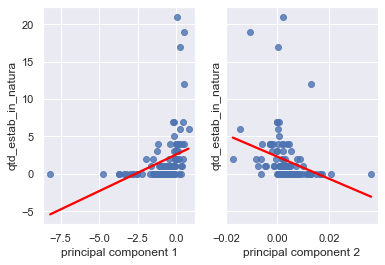

In [ ]:
fig, axs = plt.subplots(1,2, sharey=True)
sns.regplot(ax=axs[0], x=bh_copy_estab['principal component 1'], y=bh_copy_estab['qtd_estab_in_natura'], ci=None, line_kws={'color':'red'})
sns.regplot(ax=axs[1], x=bh_copy_estab['principal component 2'], y=bh_copy_estab['qtd_estab_in_natura'], ci=None, line_kws={'color':'red'})

<AxesSubplot:xlabel='principal component 2', ylabel='qtd_estab_ultraproc'>

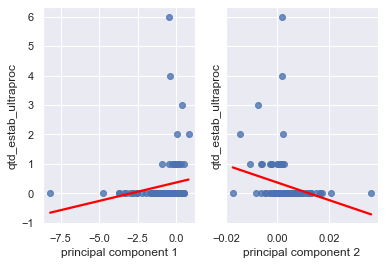

In [ ]:
fig, axs = plt.subplots(1,2, sharey=True)
sns.regplot(ax=axs[0], x=bh_copy_estab['principal component 1'], y=bh_copy_estab['qtd_estab_ultraproc'], ci=None, line_kws={'color':'red'})
sns.regplot(ax=axs[1], x=bh_copy_estab['principal component 2'], y=bh_copy_estab['qtd_estab_ultraproc'], ci=None, line_kws={'color':'red'})

In [ ]:
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

dado_sp = pd.read_csv('/Users/thiagodesouza/Codes/campo_favela/tables/Bases e Gráficos - Relatório áreas favelas e não favelas.xlsx - BaseSP.csv')
dado_sp = dado_sp.dropna()

le = LabelEncoder()
dado_sp['drenagempluvial'] = le.fit_transform(dado_sp['drenagempluvial'])/2
dado_sp['coletalixo'] = le.fit_transform(dado_sp['coletalixo'])/2

reg = RandomForestRegressor()

scs = SmartCorrelatedSelection(method='kendall', selection_method='model_performance', 
                               estimator=reg, threshold=0.4, scoring='neg_mean_squared_error')

X = dado_sp[['nome', 'GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza',
        'area_favela', 'totdomicilio', 'habita_area', 'qtdremocao', 
        'abastecimentoagua','esgotamentosanitario', 'redeeletricadomiciliar', 
        'viaspavimentadas', 'drenagempluvial', 'iluminacaopublica', 'coletalixo']]

y_nat = dado_sp['qtd_estab_in_natura']

data_sp_natura = scs.fit_transform(X, y_nat)

print('Variáveis agrupadas por correlação:')
print(scs.correlated_feature_sets_)

data_sp_natura

Variáveis agrupadas por correlação:
[{'geoses_educ', 'geoses_mobilidade', 'GeoSES', 'geoses_privacao', 'geoses_riqueza', 'geoses_pobreza'}, {'area_favela', 'totdomicilio', 'habita_area'}, {'redeeletricadomiciliar', 'abastecimentoagua', 'esgotamentosanitario'}, {'viaspavimentadas', 'drenagempluvial', 'coletalixo', 'iluminacaopublica'}]


nome  geoses_riqueza   area_favela  qtdremocao  \
0                 VILA FELIZ        0.000000   3584.376055        0.20   
1           FRANCISCO CAPARA        0.882291  17849.246030        0.00   
2              TRÊS ESTRELAS        0.000000  10998.537600        0.13   
3            PARQUE EUROPA I        0.589251  29390.252920        0.30   
4                      AVARÉ        2.131529   1521.495153        0.00   
...                      ...             ...           ...         ...   
1656           JARDIM TAIPAS        0.000000   9038.952183        0.00   
1657  JARDIM FRATERNIDADE II        0.000000   5324.971359        0.20   
1658     JARDIM DAS CAMÉLIAS        0.487862   4719.577442        0.00   
1659        RECANTO DA MOEDA        0.000000  10066.417160        0.20   
1660         FRANCISCO PRETO       24.993705   1153.608104        0.20   

      abastecimentoagua  coletalixo  
0                  0.90         1.0  
1                  0.80         1.0  
2                  0.50         1.0  
3                  0.50         1.0  
4                  1.00         1.0  
...                 ...         ...  
1656               0.80         0.5  
1657               0.30         1.0  
1658               0.85         1.0  
1659               0.50         1.0  
1660               0.70         1.0  

[1658 rows x 6 columns]

In [ ]:
reg = LinearRegression()

reg.fit(data_sp_natura[['geoses_riqueza', 'area_favela', 'abastecimentoagua', 'coletalixo']], y_nat)



# Week 5

## Goals
* Hypothesis Testing


### 5.1 - Hypothesis Testing on SP data

#### 5.1.1 - t-test 

To check if two variables have the same information

##### 5.1.1.1 - t-test $\mu$-test
 

In [ ]:
from scipy.stats import ttest_rel, levene, shapiro, bartlett
dado_sp = pd.read_csv('/Users/thiagodesouza/Codes/campo_favela/tables/Bases e Gráficos - Relatório áreas favelas e não favelas.xlsx - BaseSP.csv')
dado_sp = dado_sp.dropna()

geos = ['GeoSES', 'geoses_educ',
       'geoses_mobilidade', 'geoses_pobreza', 'geoses_privacao',
       'geoses_riqueza']

for i in range(len(geos)):
    for j in range(i+1, len(geos)):
        
        geo1 = geos[i]
        geo2 = geos[j]
        
        sample = dado_sp.sample(n=20)
        
        sample1 = sample[geo1].to_numpy()
        sample2 = sample[geo2].to_numpy()
        
        # check Shapiro's normality test
#         _, p1_norm = shapiro(sample1)
#         _, p2_norm = shapiro(sample2)
        
#         if p1_norm < 0.05 and p2_norm < 0.05: dev_norm = False
#         else: dev_norm = True
        
#         # check equal variance test
        
#         if dev_norm: _, p_var = levene(sample1, sample2)
#         else: _, p_var = bartlett(sample1, sample2)
            
#         if p_var < 0.05: equal_var = True
#         else: equal_var = False
            
        # t-test for mean, checking equal variance (or not)
        
        s,p = ttest_rel(sample1, sample2)
        
        if p < 0.05:
            print(f'{geo1} has NOT the same mean as {geo2}. pvalue = {p}')
        else:
            print(f'{geo1} has the same mean as {geo2}. pvalue = {p}')

GeoSES has NOT the same mean as geoses_educ. pvalue = 0.00014138776057515885
GeoSES has NOT the same mean as geoses_mobilidade. pvalue = 4.710597318117771e-10
GeoSES has NOT the same mean as geoses_pobreza. pvalue = 2.4932278961075768e-11
GeoSES has NOT the same mean as geoses_privacao. pvalue = 6.189642809983482e-14
GeoSES has NOT the same mean as geoses_riqueza. pvalue = 0.030790225842314015
geoses_educ has NOT the same mean as geoses_mobilidade. pvalue = 1.1943398690724955e-09
geoses_educ has the same mean as geoses_pobreza. pvalue = 0.3176956346117057
geoses_educ has NOT the same mean as geoses_privacao. pvalue = 6.4747835954199e-16
geoses_educ has NOT the same mean as geoses_riqueza. pvalue = 5.659814555687339e-05
geoses_mobilidade has NOT the same mean as geoses_pobreza. pvalue = 0.00058568361534997
geoses_mobilidade has NOT the same mean as geoses_privacao. pvalue = 3.9808627356970656e-17
geoses_mobilidade has NOT the same mean as geoses_riqueza. pvalue = 6.779355884009718e-10
g

In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.8/92.8 KB 3.2 MB/s eta 0:00:00
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=8d3c781d1db97e38f868b12ab533a2535c2b0fe125fbb5378c71b61acebb17d0
  Stored in directory: /Users/thiagodesouza/Library/Caches/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [ ]:
dado_entorno = pd.read_csv('/Users/thiagodesouza/Codes/campo_favela/tables/dados_entorno.csv')
dado_entorno['favela'] = dado_entorno['favela'].apply(lambda row: row.upper())


def f(fix):
    for col in [f'qtd_estab_{fix}_100', f'qtd_estab_{fix}_250', f'qtd_estab_{fix}_500', f'qtd_estab_{fix}_1000']:
        dado_entorno[col] = dado_entorno[col] - dado_entorno[f'qtd_estab_{fix}_dentro']

for fix in ['misto', 'in_natura', 'ultraproc']:
    f(fix)
    
dado_entorno = dado_entorno.drop(['qtd_estab_misto_dentro', 'qtd_estab_in_natura_dentro', 'qtd_estab_ultraproc_dentro'], axis=1)


dado_entorno


favela_id                    favela  qtd_estab_misto_100  \
0            95                ABACATEIRO                    0   
1           266             ABEL MARCIANO                    0   
2           317            ABÍLIO PEREIRA                    0   
3           364                 ACARIRANA                    0   
4          1131                 ADALBERTO                    0   
...         ...                       ...                  ...   
1725        595  XAMBORES I E II (FASE 3)                    0   
1726       1175       XAVIER DE MAGALHÃES                    0   
1727         26               ZAKI NARCHI                    0   
1728       1480          ZAVUVUS SETOR 16                    0   
1729        681                     ZOIÃO                    0   

      qtd_estab_misto_250  qtd_estab_misto_500  qtd_estab_misto_1000  \
0                       1                   20                    29   
1                       0                    0                     5   
2                       0                    0                     1   
3                       0                    0                     3   
4                      30                   93                   194   
...                   ...                  ...                   ...   
1725                    0                    0                     3   
1726                   11                   28                    73   
1727                    0                    0                     0   
1728                    0                    5                    36   
1729                    0                    0                     0   

      qtd_estab_in_natura_100  qtd_estab_in_natura_250  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        1   
...                       ...                      ...   
1725                        0                        0   
1726                        0                        0   
1727                        0                        0   
1728                        0                        0   
1729                        0                        0   

      qtd_estab_in_natura_500  qtd_estab_in_natura_1000  \
0                           1                         2   
1                           0                         1   
2                           0                         0   
3                           0                         0   
4                           8                        21   
...                       ...                       ...   
1725                        0                         0   
1726                        1                         3   
1727                        0                         0   
1728                        1                         3   
1729                        0                         0   

      qtd_estab_ultraproc_100  qtd_estab_ultraproc_250  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        9   
...                       ...                      ...   
1725                        0                        0   
1726                        0                        0   
1727                        0                        0   
1728                        0                        0   
1729                        0                        0   

      qtd_estab_ultraproc_500  qtd_estab_ultraproc_1000  
0                           2                         5  
1                           0                         2  
2                           0                         0  
3            

In [ ]:
dado_entorno = dado_entorno.groupby(dado_entorno['favela'], as_index=False).aggregate({'favela_id': 'first', 
                                                                      'qtd_estab_misto_100': 'sum', 
                                                                       'qtd_estab_misto_250': 'sum',
                                                                       'qtd_estab_misto_500': 'sum', 
                                                                       'qtd_estab_misto_1000': 'sum',
                                                                       'qtd_estab_in_natura_100': 'sum', 
                                                                       'qtd_estab_in_natura_250': 'sum',
                                                                       'qtd_estab_in_natura_500': 'sum', 
                                                                        'qtd_estab_in_natura_1000': 'sum',
                                                                       'qtd_estab_ultraproc_100': 'sum', 
                                                                       'qtd_estab_ultraproc_250': 'sum',
                                                                       'qtd_estab_ultraproc_500': 'sum', 
                                                                       'qtd_estab_ultraproc_1000': 'sum'})

In [ ]:
dado_entorno

favela  favela_id  qtd_estab_misto_100  \
0                       ABACATEIRO         95                    0   
1                    ABEL MARCIANO        266                    0   
2                   ABÍLIO PEREIRA        317                    0   
3                        ACARIRANA        364                    0   
4                        ADALBERTO       1131                    0   
...                            ...        ...                  ...   
1709  ÁREA REMANESCENTE GUARANI II        738                    8   
1710           ÁRVORE DE SÃO TOMÁS        865                    0   
1711            ÂNGELO CRISTIANINI         77                    0   
1712                ÂNGELO GIMENEZ       1144                    0   
1713              ÂNGELO REMAZOTTI         33                    0   

      qtd_estab_misto_250  qtd_estab_misto_500  qtd_estab_misto_1000  \
0                       1                   20                    29   
1                       0                    0                     5   
2                       0                    0                     1   
3                       0                    0                     3   
4                      30                   93                   194   
...                   ...                  ...                   ...   
1709                    8                   21                    50   
1710                    0                    1                     1   
1711                    0                    0                    53   
1712                    0                   30                    64   
1713                    4                   30                   114   

      qtd_estab_in_natura_100  qtd_estab_in_natura_250  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        1   
...                       ...                      ...   
1709                        0                        0   
1710                        0                        0   
1711                        0                        0   
1712                        0                        0   
1713                        0                        1   

      qtd_estab_in_natura_500  qtd_estab_in_natura_1000  \
0                           1                         2   
1                           0                         1   
2                           0                         0   
3                           0                         0   
4                           8                        21   
...                       ...                       ...   
1709                        3                         5   
1710                        0                         0   
1711                        0                         5   
1712                        3                         9   
1713                        2                        10   

      qtd_estab_ultraproc_100  qtd_estab_ultraproc_250  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        9   
...                       ...                      ...   
1709                        1                        1   
1710                        0                        0   
1711                        0                        0   
1712                        0                        0   
1713                        0                        1   

      qtd_estab_ultraproc_500  qtd_estab_ultraproc_1000  
0                           2                         5  
1                           0                         2  
2                           0                

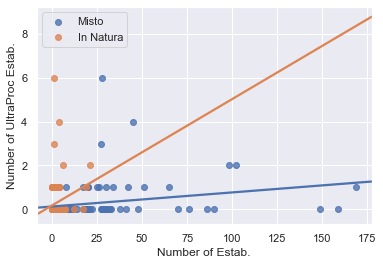

In [ ]:
fig,axs = plt.subplots(1)

sns.regplot(ax=axs, x='qtd_estab_misto', y='qtd_estab_ultraproc', data=bh_com_estab, ci=None, truncate=False, label='Misto')
g = sns.regplot(ax=axs, x='qtd_estab_in_natura', y='qtd_estab_ultraproc', data=bh_com_estab,ci=None, truncate=False, label='In Natura')
plt.legend()
g.set(xlabel='Number of Estab.', ylabel=estabdict['qtd_estab_ultraproc'])
plt.show()

In [ ]:
data = pd.read_csv('/Users/thiagodesouza/Codes/campo_favela/tables/Bases e Gráficos - Relatório áreas favelas e não favelas.xlsx - BaseSP.csv')


data_wo_food = data[(data.qtd_estab_in_natura == 0) & (data.qtd_estab_misto == 0) & (data.qtd_estab_ultraproc == 0)]

data_wo_food =data_wo_food.dropna()
data_wo_food.replace({'Nenhum':0, 'Parcial':0.5, 'Total':1.0}, inplace=True)
data_wo_food['label'] = ['WITHOUT']*len(data_wo_food)
data_wo_food

gid                    nome        COD_AED    GeoSES  geoses_educ  \
0        1              VILA FELIZ  3550308005209 -0.410589     3.940807   
1        2        FRANCISCO CAPARA  3550308005260 -0.557067     2.459462   
2        3           TRÊS ESTRELAS  3550308005232 -0.439097     4.684979   
4        5                   AVARÉ  3550308005166 -0.442320     4.347597   
5        6         ILHA DAS COBRAS  3550308005042  0.120768    22.646916   
...    ...                     ...            ...       ...          ...   
1655  6442  JARDIM DOS FRANCOS III  3550308005189 -0.638196     2.106985   
1656  6443           JARDIM TAIPAS  3550308005309 -0.614814     4.453619   
1657  6444  JARDIM FRATERNIDADE II  3550308005292 -0.661893     2.173948   
1658  6446     JARDIM DAS CAMÉLIAS  3550308005195 -0.435106     3.872305   
1660  6449         FRANCISCO PRETO  3550308005178  0.203394    29.117466   

      geoses_mobilidade  geoses_pobreza  geoses_privacao  geoses_riqueza  \
0             21.305726       10.196153        64.006740        0.000000   
1             19.729907       16.819313        55.137271        0.882291   
2             20.545599       12.726457        68.060672        0.000000   
4             20.995738       12.485797        63.562017        2.131529   
5             39.048960        5.592236        86.811120       17.257015   
...                 ...             ...              ...             ...   
1655          12.111604       21.149021        56.118934        1.722758   
1656          23.819127       19.977949        42.727612        0.000000   
1657          10.970652       21.847302        58.494904        0.000000   
1658          22.254238       13.032195        65.882226        0.487862   
1660          32.652725        5.040246        80.830828       24.993705   

      perc_sobreposicao  ...  coletalixo qtd_feiras  qtd_sacolao  \
0              0.830918  ...         1.0          0            0   
1              1.000000  ...         1.0          0            0   
2              1.000000  ...         1.0          0            0   
4              0.739948  ...         1.0          0            0   
5              1.000000  ...         1.0          0            0   
...                 ...  ...         ...        ...          ...   
1655           1.000000  ...         1.0          0            0   
1656           1.000000  ...         0.5          0            0   
1657           1.000000  ...         1.0          0            0   
1658           1.000000  ...         1.0          0            0   
1660           1.000000  ...         1.0          0            0   

      qtd_merc_muni  qtd_bom_prato  qtd_feira_organica  qtd_estab_in_natura  \
0                 0              0                   0                    0   
1                 0              0                   0                    0   
2                 0              0                   0                    0   
4                 0              0                   0                    0   
5                 0              0                   0                    0   
...             ...            ...                 ...                  ...   
1655              0              0                   0                    0   
1656              0              0                   0                    0   
1657              0              0                   0                    0   
1658              0              0                   0                    0   
1660              0              0                   0                    0   

      qtd_estab_misto  qtd_estab_ultraproc    label  
0                   0                    0  WITHOUT  
1                   0                    0  WITHOUT  
2                   0                    0  WITHOUT  
4                   0                    0  WITHOUT  
5                   0                    0  WITHOUT  
...               ...                  ...      ...  
1655                0                

In [ ]:
data_w_food = data[(data.qtd_estab_in_natura > 0) | (data.qtd_estab_misto > 0) | (data.qtd_estab_ultraproc > 0)]

data_w_food =data_w_food.dropna()
data_w_food.replace({'Nenhum':0, 'Parcial':0.5, 'Total':1.0}, inplace=True)
data_w_food['label'] = ['WITH']*len(data_w_food)
data_w_food


gid                        nome        COD_AED    GeoSES  geoses_educ  \
3        4             PARQUE EUROPA I  3550308005221 -0.492236     3.658718   
14      17                PARAISÓPOLIS  3550308005175 -0.559391     1.340620   
22      26          JARDIM VARGINHA II  3550308005303 -0.701125     1.794023   
27      32               VILA XAVANTES  3550308005197 -0.409879     5.775202   
48      55            IMPRENSA COLONOS  3550308005095 -0.113333    18.113060   
...    ...                         ...            ...       ...          ...   
1638  6424          FAZENDA DA JUTA IV  3550308005209 -0.410589     3.940807   
1641  6427                     LOTE 18  3550308005293 -0.644055     1.745918   
1644  6430                    MILHARAL  3550308005115 -0.355323     6.096927   
1651  6437  JARDIM NORONHA I, II E III  3550308005281 -0.824810     1.324610   
1659  6447            RECANTO DA MOEDA  3550308005163 -0.476437     3.244210   

      geoses_mobilidade  geoses_pobreza  geoses_privacao  geoses_riqueza  \
3             16.445389       14.730334        64.584267        0.589251   
14            34.334483       22.507059        55.265502        0.000000   
22            11.533260       19.933326        42.289853        0.000000   
27            24.145613       11.925157        65.363420        0.419275   
48            32.052558       10.221195        77.733148       17.217582   
...                 ...             ...              ...             ...   
1638          21.305726       10.196153        64.006740        0.000000   
1641          10.810662       18.328231        55.495757        0.000000   
1644          28.307642       12.172762        65.915090        1.973636   
1651          11.776323       25.630232        29.987866        0.000000   
1659          22.384016       13.532114        61.012276        0.000000   

      perc_sobreposicao  ...  coletalixo qtd_feiras  qtd_sacolao  \
3              1.000000  ...         1.0          0            0   
14             0.833193  ...         0.5          1            0   
22             1.000000  ...         0.5          0            0   
27             1.000000  ...         0.5          0            0   
48             0.841253  ...         1.0          0            0   
...                 ...  ...         ...        ...          ...   
1638           1.000000  ...         0.5          0            0   
1641           1.000000  ...         0.0          0            0   
1644           1.000000  ...         0.0          0            0   
1651           0.700668  ...         0.5          0            0   
1659           0.534763  ...         1.0          0            0   

      qtd_merc_muni  qtd_bom_prato  qtd_feira_organica  qtd_estab_in_natura  \
3                 0              0                   0                    0   
14                0              1                   0                   43   
22                0              0                   0                    3   
27                0              0                   0                    0   
48                0              0                   0                    0   
...             ...            ...                 ...                  ...   
1638              0              0                   0                    1   
1641              0              0                   0                    0   
1644              0              0                   0                    2   
1651              0              0                   0                    0   
1659              0              0                   0                    1   

      qtd_estab_misto  qtd_estab_ultraproc  label  
3                  14                    2   WITH  
14                566                  106   WITH  
22                 13                    6   WITH  
27                  1                    0   WITH  
48                  3                    1   WITH  
...               ...                  ...    ...  
163

In [ ]:
sp_tot = pd.concat([data_wo_food, data_w_food], axis=0)

sp_tot

gid                        nome        COD_AED    GeoSES  geoses_educ  \
0        1                  VILA FELIZ  3550308005209 -0.410589     3.940807   
1        2            FRANCISCO CAPARA  3550308005260 -0.557067     2.459462   
2        3               TRÊS ESTRELAS  3550308005232 -0.439097     4.684979   
4        5                       AVARÉ  3550308005166 -0.442320     4.347597   
5        6             ILHA DAS COBRAS  3550308005042  0.120768    22.646916   
...    ...                         ...            ...       ...          ...   
1638  6424          FAZENDA DA JUTA IV  3550308005209 -0.410589     3.940807   
1641  6427                     LOTE 18  3550308005293 -0.644055     1.745918   
1644  6430                    MILHARAL  3550308005115 -0.355323     6.096927   
1651  6437  JARDIM NORONHA I, II E III  3550308005281 -0.824810     1.324610   
1659  6447            RECANTO DA MOEDA  3550308005163 -0.476437     3.244210   

      geoses_mobilidade  geoses_pobreza  geoses_privacao  geoses_riqueza  \
0             21.305726       10.196153        64.006740        0.000000   
1             19.729907       16.819313        55.137271        0.882291   
2             20.545599       12.726457        68.060672        0.000000   
4             20.995738       12.485797        63.562017        2.131529   
5             39.048960        5.592236        86.811120       17.257015   
...                 ...             ...              ...             ...   
1638          21.305726       10.196153        64.006740        0.000000   
1641          10.810662       18.328231        55.495757        0.000000   
1644          28.307642       12.172762        65.915090        1.973636   
1651          11.776323       25.630232        29.987866        0.000000   
1659          22.384016       13.532114        61.012276        0.000000   

      perc_sobreposicao  ...  coletalixo qtd_feiras  qtd_sacolao  \
0              0.830918  ...         1.0          0            0   
1              1.000000  ...         1.0          0            0   
2              1.000000  ...         1.0          0            0   
4              0.739948  ...         1.0          0            0   
5              1.000000  ...         1.0          0            0   
...                 ...  ...         ...        ...          ...   
1638           1.000000  ...         0.5          0            0   
1641           1.000000  ...         0.0          0            0   
1644           1.000000  ...         0.0          0            0   
1651           0.700668  ...         0.5          0            0   
1659           0.534763  ...         1.0          0            0   

      qtd_merc_muni  qtd_bom_prato  qtd_feira_organica  qtd_estab_in_natura  \
0                 0              0                   0                    0   
1                 0              0                   0                    0   
2                 0              0                   0                    0   
4                 0              0                   0                    0   
5                 0              0                   0                    0   
...             ...            ...                 ...                  ...   
1638              0              0                   0                    1   
1641              0              0                   0                    0   
1644              0              0                   0                    2   
1651              0              0                   0                    0   
1659              0              0                   0                    1   

      qtd_estab_misto  qtd_estab_ultraproc    label  
0                   0                    0  WITHOUT  
1                   0                    0  WITHOUT  
2                   0                    0  WITHOUT  
4                   0                    0  WITHOUT  
5                   0                    0  WITHOUT  
...               ...                  ... 

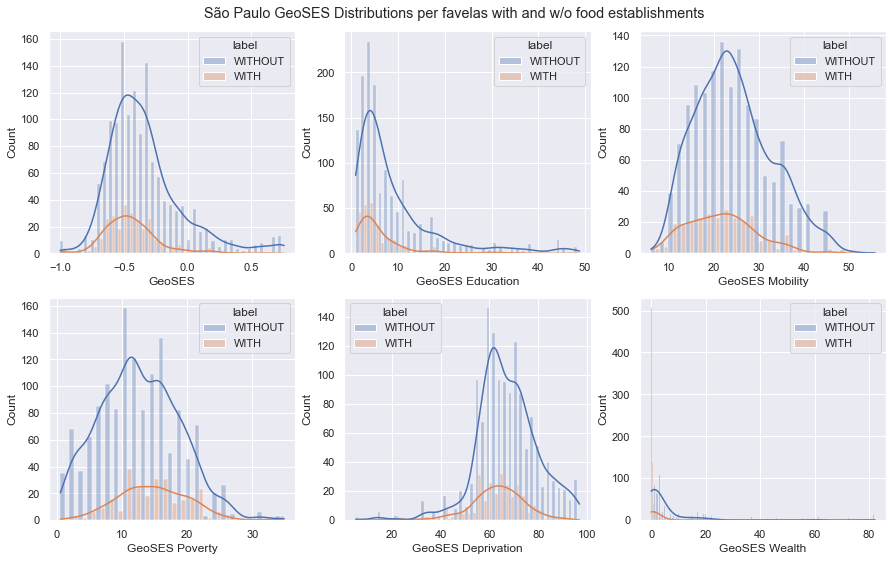

In [ ]:
geoses = ['GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza']

geodict = {
    'GeoSES':'GeoSES',
    'geoses_educ':'GeoSES Education',
    'geoses_mobilidade': 'GeoSES Mobility',
    'geoses_pobreza':'GeoSES Poverty',
    'geoses_privacao':'GeoSES Deprivation',
    'geoses_riqueza':'GeoSES Wealth'
}

fig,axs = plt.subplots(2,3, figsize=(15,9))

sns.histplot(ax=axs[0,0], x='GeoSES', data=sp_tot, hue='label', alpha=0.35, kde=True, multiple='dodge').set(xlabel=geodict['GeoSES'])

sns.histplot(ax=axs[0,1], x='geoses_educ', data=sp_tot,  kde=True, hue='label', alpha=0.35, multiple='dodge').set(xlabel=geodict['geoses_educ'])

sns.histplot(ax=axs[0,2], x='geoses_mobilidade', data=sp_tot,  kde=True, hue='label', alpha=0.35, multiple='dodge').set(xlabel=geodict['geoses_mobilidade'])

sns.histplot(ax=axs[1,0], x='geoses_pobreza', data=sp_tot,  kde=True, hue='label', alpha=0.35, multiple='dodge').set(xlabel=geodict['geoses_pobreza'])

sns.histplot(ax=axs[1,1], x='geoses_privacao', data=sp_tot,  kde=True, hue='label', alpha=0.35, multiple='dodge').set(xlabel=geodict['geoses_privacao'])

sns.histplot(ax=axs[1,2], x='geoses_riqueza', data=sp_tot,  kde=True, hue='label', alpha=0.35, multiple='dodge').set(xlabel=geodict['geoses_riqueza'])

fig.text(0.5, 0.9, f'São Paulo GeoSES Distributions per favelas with and w/o food establishments', ha='center', fontsize='x-large')


plt.show()
      

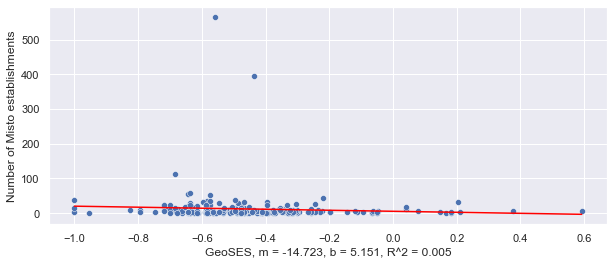

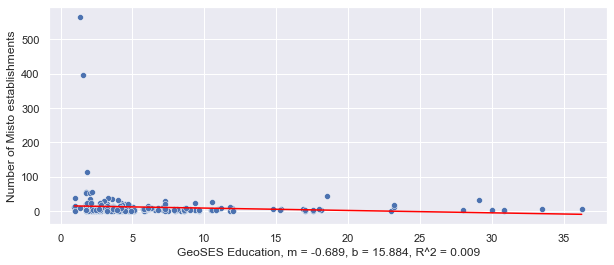

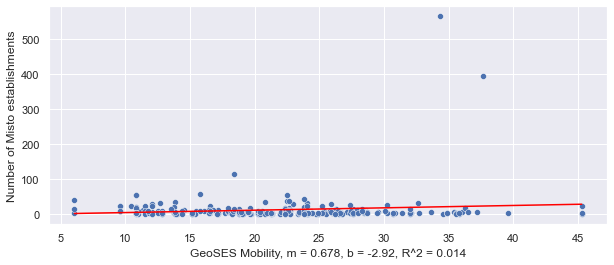

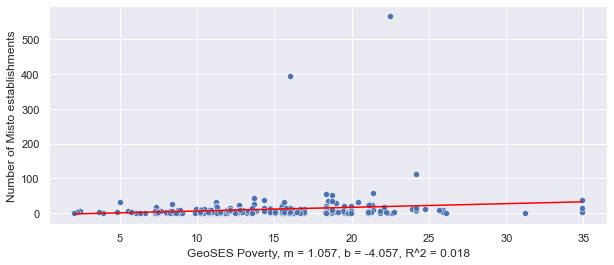

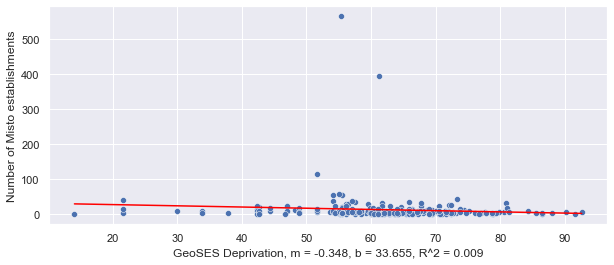

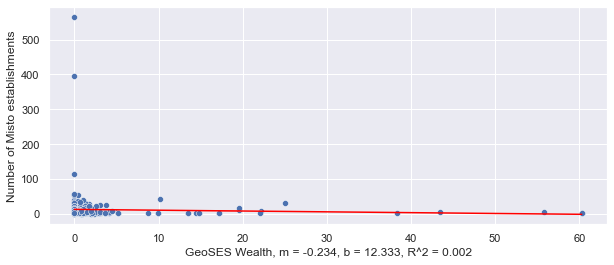

In [ ]:
geoses = ['GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza']

geodict = {
    'GeoSES':'GeoSES',
    'geoses_educ':'GeoSES Education',
    'geoses_mobilidade': 'GeoSES Mobility',
    'geoses_pobreza':'GeoSES Poverty',
    'geoses_privacao':'GeoSES Deprivation',
    'geoses_riqueza':'GeoSES Wealth'
}


for geo in geoses:
    fig, ax = plt.subplots(figsize=(10,4))
    m,b = np.polyfit(data_w_food[geo], data_w_food['qtd_estab_misto'],1)
    r2 = r2_score(data_w_food['qtd_estab_misto'], m*data_w_food[geo] + b)
    
    sns.scatterplot(ax=ax, x=geo, y='qtd_estab_misto', data=data_w_food)
    sns.lineplot(ax=ax, x=data_w_food[geo],y=m*data_w_food[geo] + b, color='red')
    plt.ylabel('Number of Misto establishments')
    plt.xlabel(geodict[geo] + f', m = {m.round(3)}, b = {b.round(3)}, R^2 = {r2.round(3)}')

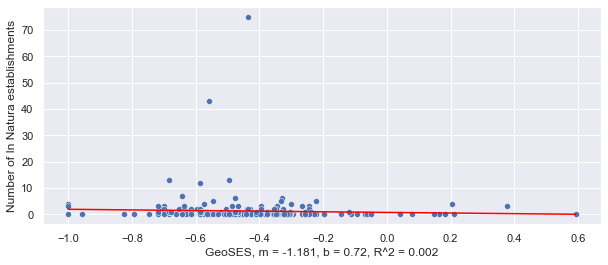

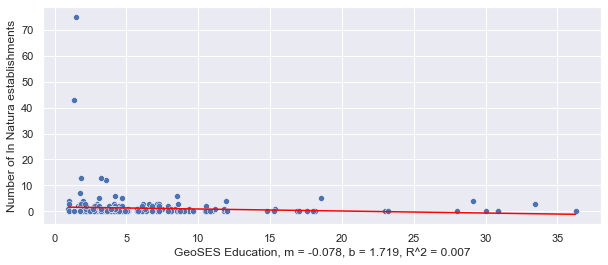

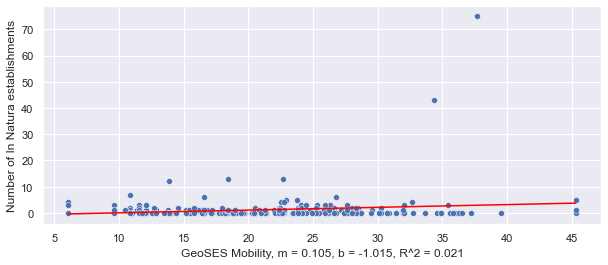

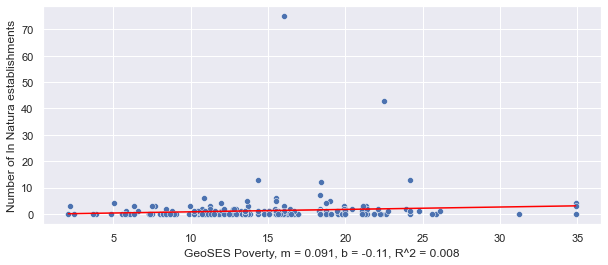

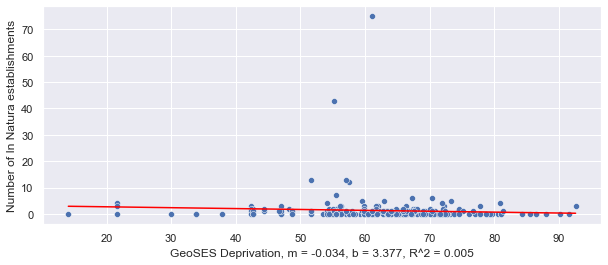

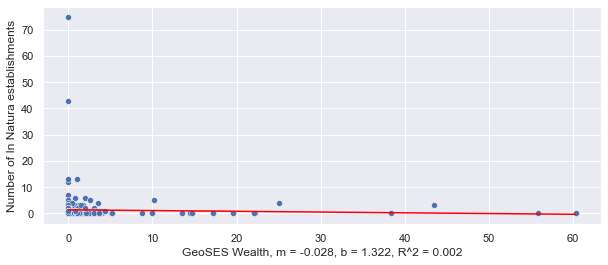

In [ ]:
geoses = ['GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza']

geodict = {
    'GeoSES':'GeoSES',
    'geoses_educ':'GeoSES Education',
    'geoses_mobilidade': 'GeoSES Mobility',
    'geoses_pobreza':'GeoSES Poverty',
    'geoses_privacao':'GeoSES Deprivation',
    'geoses_riqueza':'GeoSES Wealth'
}


for geo in geoses:
    fig, ax = plt.subplots(figsize=(10,4))
    m,b = np.polyfit(data_w_food[geo], data_w_food['qtd_estab_in_natura'],1)
    r2 = r2_score(data_w_food['qtd_estab_in_natura'], m*data_w_food[geo] + b)
    
    sns.scatterplot(ax=ax, x=geo, y='qtd_estab_in_natura', data=data_w_food)
    sns.lineplot(ax=ax, x=data_w_food[geo],y=m*data_w_food[geo] + b, color='red')
    plt.ylabel('Number of In Natura establishments')
    plt.xlabel(geodict[geo] + f', m = {m.round(3)}, b = {b.round(3)}, R^2 = {r2.round(3)}')

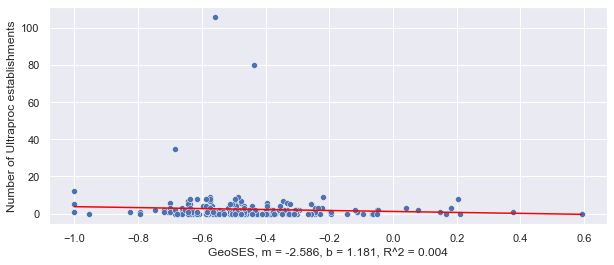

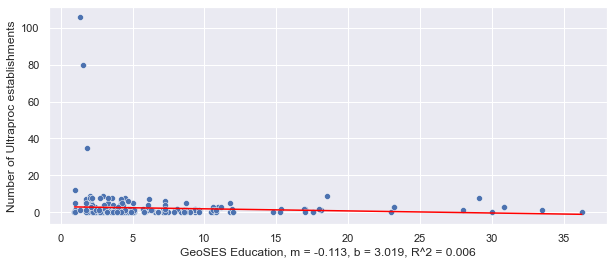

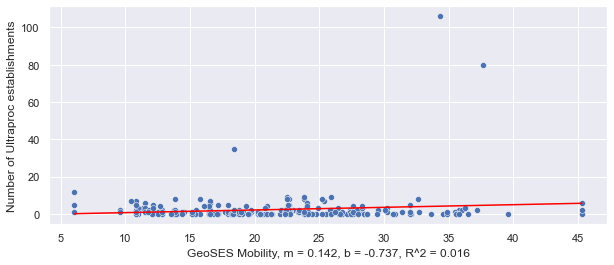

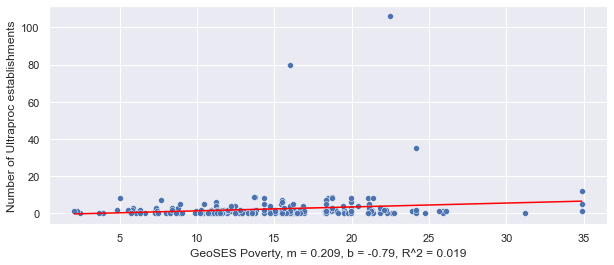

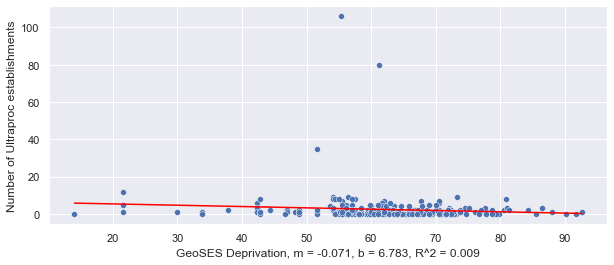

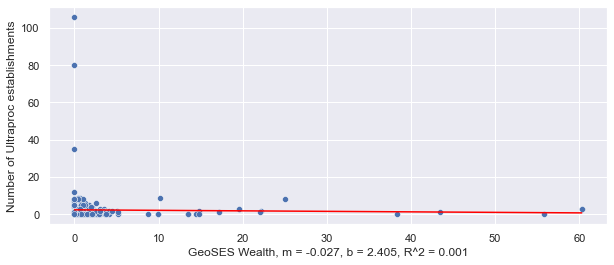

In [ ]:
geoses = ['GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza']

geodict = {
    'GeoSES':'GeoSES',
    'geoses_educ':'GeoSES Education',
    'geoses_mobilidade': 'GeoSES Mobility',
    'geoses_pobreza':'GeoSES Poverty',
    'geoses_privacao':'GeoSES Deprivation',
    'geoses_riqueza':'GeoSES Wealth'
}


for geo in geoses:
    fig, ax = plt.subplots(figsize=(10,4))
    m,b = np.polyfit(data_w_food[geo], data_w_food['qtd_estab_ultraproc'],1)
    r2 = r2_score(data_w_food['qtd_estab_ultraproc'], m*data_w_food[geo] + b)
    
    sns.scatterplot(ax=ax, x=geo, y='qtd_estab_ultraproc', data=data_w_food)
    sns.lineplot(ax=ax, x=data_w_food[geo],y=m*data_w_food[geo] + b, color='red')
    plt.ylabel('Number of Ultraproc establishments')
    plt.xlabel(geodict[geo] + f', m = {m.round(3)}, b = {b.round(3)}, R^2 = {r2.round(3)}')

# Week 6

### SP CNAE Cluster Analysis

In [ ]:
sp_cnae_misto = pd.read_csv('/Users/thiagodesouza/Codes/campo_favela/tables/misto_por_cnae_dentro.csv')
sp_cnae_in_natura = pd.read_csv('/Users/thiagodesouza/Codes/campo_favela/tables/in_natura_por_cnae_dentro.csv')
sp_cnae_ultraproc = pd.read_csv('/Users/thiagodesouza/Codes/campo_favela/tables/ultraproc_por_cnae_dentro.csv')
sp_cluster = pd.read_csv('/Users/thiagodesouza/Codes/campo_favela/tables/FAVEAS_SP_ATUALIZADO com clusters (1).csv')

In [ ]:
sp_cluster.head()



distritcod     distritnom  subprefcod     subprefnom  gid  \
0          78      SAPOPEMBA          32      SAPOPEMBA    1   
1          47        LAJEADO          28     GUAIANASES    2   
2          19  CAPAO REDONDO          17    CAMPO LIMPO    3   
3          45    JD SAO LUIS          18    M'BOI MIRIM    4   
4          22     CID ADEMAR          16  CIDADE ADEMAR    5   

               nome ClusterInfraSemAlimentacao ClusterInfraTotal  \
0        VILA FELIZ                  Infra_Boa         Infra_Boa   
1  FRANCISCO CAPARA                  Infra_Boa         Infra_Boa   
2     TRÊS ESTRELAS                  Infra_Boa         Infra_Boa   
3   PARQUE EUROPA I                        NaN         Infra_Boa   
4             AVARÉ                  Infra_Boa         Infra_Boa   

   ClusterAlimentacao       COD_AED  ...  iluminacaopublica  coletalixo  \
0                 NaN  3.550310e+12  ...                0.3       Total   
1                 NaN  3.550310e+12  ...                0.8       Total   
2                 NaN  3.550310e+12  ...                0.8       Total   
3                 1.0  3.550310e+12  ...                0.8       Total   
4                 NaN  3.550310e+12  ...                0.5       Total   

   qtd_feiras  qtd_sacolao  qtd_merc_muni  qtd_bom_prato  qtd_feira_organica  \
0           0            0              0              0                   0   
1           0            0              0              0                   0   
2           0            0              0              0                   0   
3           0            0              0              0                   0   
4           0            0              0              0                   0   

   qtd_estab_in_natura qtd_estab_misto  qtd_estab_ultraproc  
0                    0               0                    0  
1                    0               0                    0  
2                    0               0                    0  
3                    0              14                    2  
4                    0               0                    0  

[5 rows x 38 columns]

In [ ]:
sp_cnae_misto.head()

nome  favela_id  qtd_hiper  qtd_super  qtd_minimercado  \
0      ABACATEIRO         95          0          0                2   
1   ABEL MARCIANO        266          0          0                0   
2  ABÍLIO PEREIRA        317          0          0                0   
3       ACARIRANA        364          0          0                0   
4       ADALBERTO       1131          0          0                0   

   qtd_padaria  qtd_varejista_frios  qtd_varejista_geral  qtd_restaurante  \
0            0                    0                    0                1   
1            0                    0                    0                0   
2            0                    0                    0                0   
3            0                    0                    0                0   
4            0                    0                    0                0   

   qtd_ambulante  qtd_consumo_domiciliar  qtd_cantina  
0              0                       5            0  
1              0                       0            0  
2              0                       0            0  
3              0                       0            0  
4              0                       0            0

In [ ]:
sp_cnae_misto['favela'] = sp_cnae_misto['favela'].apply(lambda row: row.upper())
sp_cnae_in_natura['favela'] = sp_cnae_in_natura['favela'].apply(lambda row: row.upper())
sp_cnae_ultraproc['favela'] = sp_cnae_ultraproc['favela'].apply(lambda row: row.upper())

sp_cnae_misto.rename(columns={'favela':'nome'}, inplace=True)
sp_cnae_in_natura.rename(columns={'favela':'nome'}, inplace=True)
sp_cnae_ultraproc.rename(columns={'favela':'nome'}, inplace=True)

f_misto = dict.fromkeys(sp_cnae_misto, 'sum')
f_misto.update(dict.fromkeys(['favela_id'], 'first'))
del f_misto['nome']

f_in_natura = dict.fromkeys(sp_cnae_in_natura, 'sum')
f_in_natura.update(dict.fromkeys(['favela_id'], 'first')) 
del f_in_natura['nome']

f_ultraproc = dict.fromkeys(sp_cnae_ultraproc, 'sum')
f_ultraproc.update(dict.fromkeys(['favela_id'], 'first'))
del f_ultraproc['nome']

sp_cnae_misto = sp_cnae_misto.groupby(sp_cnae_misto['nome'], as_index=False).aggregate(f_misto)
sp_cnae_in_natura = sp_cnae_in_natura.groupby(sp_cnae_in_natura['nome'], as_index=False).aggregate(f_in_natura)
sp_cnae_ultraproc = sp_cnae_ultraproc.groupby(sp_cnae_ultraproc['nome'], as_index=False).aggregate(f_ultraproc)


In [ ]:
sp_cnae_misto.to_csv('sp_cnae_misto.csv')
sp_cnae_in_natura.to_csv('sp_cnae_in_natura.csv')
sp_cnae_ultraproc.to_csv('sp_cnae_ultraproc.csv')

#### Cluster 1 metrics

In [ ]:
cluster1 = sp_cluster.loc[sp_cluster.ClusterAlimentacao == 1]
cluster1 = cluster1.drop(cluster1.columns.difference(['nome']), axis=1)

cluster1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 3 to 1668
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    39 non-null     object
dtypes: object(1)
memory usage: 624.0+ bytes


##### misto

In [ ]:
cluster1misto = cluster1.merge(sp_cnae_misto, on='nome')



cluster1misto.describe()

favela_id  qtd_hiper  qtd_super  qtd_minimercado  qtd_padaria  \
count    39.000000       39.0  39.000000        39.000000    39.000000   
mean    913.538462        0.0   0.128205         2.641026     0.692308   
std     505.204380        0.0   0.409074         2.569939     1.280498   
min       7.000000        0.0   0.000000         0.000000     0.000000   
25%     482.500000        0.0   0.000000         1.000000     0.000000   
50%     940.000000        0.0   0.000000         2.000000     0.000000   
75%    1342.000000        0.0   0.000000         4.500000     1.000000   
max    1689.000000        0.0   2.000000        10.000000     7.000000   

       qtd_varejista_frios  qtd_varejista_geral  qtd_restaurante  \
count            39.000000            39.000000        39.000000   
mean              0.153846             0.435897         2.435897   
std               0.365518             0.787898         3.067614   
min               0.000000             0.000000         0.000000   
25%               0.000000             0.000000         0.500000   
50%               0.000000             0.000000         1.000000   
75%               0.000000             1.000000         3.000000   
max               1.000000             4.000000        14.000000   

       qtd_ambulante  qtd_consumo_domiciliar  qtd_cantina  
count      39.000000               39.000000    39.000000  
mean        1.179487                3.717949     0.051282  
std         1.730102                3.670284     0.223456  
min         0.000000                0.000000     0.000000  
25%         0.000000                1.000000     0.000000  
50%         1.000000                2.000000     0.000000  
75%         2.000000                6.000000     0.000000  
max         7.000000               14.000000     1.000000

##### in natura

In [ ]:
cluster1in_natura = cluster1.merge(sp_cnae_in_natura, on='nome')

cluster1in_natura.describe()

favela_id  qtd_acougue  qtd_peixaria  qtd_hortifruti
count    39.000000    39.000000          39.0       39.000000
mean    913.538462     0.179487           0.0        0.589744
std     505.204380     0.388776           0.0        0.880130
min       7.000000     0.000000           0.0        0.000000
25%     482.500000     0.000000           0.0        0.000000
50%     940.000000     0.000000           0.0        0.000000
75%    1342.000000     0.000000           0.0        1.000000
max    1689.000000     1.000000           0.0        3.000000

##### ultraproc

In [ ]:
cluster1ultraproc = cluster1.merge(sp_cnae_ultraproc, on='nome')

cluster1ultraproc.describe()

favela_id  qtd_varejista_doce  qtd_conveniencia  qtd_bar  \
count    39.000000           39.000000              39.0     39.0   
mean    913.538462            0.128205               0.0      0.0   
std     505.204380            0.409074               0.0      0.0   
min       7.000000            0.000000               0.0      0.0   
25%     482.500000            0.000000               0.0      0.0   
50%     940.000000            0.000000               0.0      0.0   
75%    1342.000000            0.000000               0.0      0.0   
max    1689.000000            2.000000               0.0      0.0   

       qtd_lanchonete  
count       39.000000  
mean         1.717949  
std          1.999325  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          2.000000  
max          9.000000

#### Cluster 2 metrics

In [ ]:
cluster2 = sp_cluster.loc[sp_cluster.ClusterAlimentacao == 2]
cluster2 = cluster2.drop(cluster2.columns.difference(['nome']), axis=1)

cluster2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 180 to 1667
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    14 non-null     object
dtypes: object(1)
memory usage: 224.0+ bytes


##### misto

In [ ]:
cluster2misto = cluster2.merge(sp_cnae_misto, on='nome')



cluster2misto.describe()

favela_id  qtd_hiper  qtd_super  qtd_minimercado  qtd_padaria  \
count    14.000000       14.0  14.000000        14.000000    14.000000   
mean    946.714286        0.0   0.071429         6.142857     1.428571   
std     515.581588        0.0   0.267261         4.974661     1.827747   
min     109.000000        0.0   0.000000         0.000000     0.000000   
25%     585.250000        0.0   0.000000         3.000000     0.000000   
50%    1067.000000        0.0   0.000000         6.500000     1.000000   
75%    1230.250000        0.0   0.000000         8.500000     2.000000   
max    1678.000000        0.0   1.000000        19.000000     6.000000   

       qtd_varejista_frios  qtd_varejista_geral  qtd_restaurante  \
count            14.000000            14.000000        14.000000   
mean              0.571429             0.928571         6.714286   
std               0.937614             0.916875         6.821105   
min               0.000000             0.000000         0.000000   
25%               0.000000             0.000000         2.000000   
50%               0.000000             1.000000         4.500000   
75%               1.000000             2.000000         9.500000   
max               3.000000             2.000000        22.000000   

       qtd_ambulante  qtd_consumo_domiciliar  qtd_cantina  
count      14.000000               14.000000    14.000000  
mean        3.428571                7.571429     0.357143  
std         3.756313                5.747431     0.841897  
min         0.000000                0.000000     0.000000  
25%         1.000000                3.500000     0.000000  
50%         2.500000                7.000000     0.000000  
75%         3.750000                9.500000     0.000000  
max        13.000000               19.000000     3.000000

##### in natura

In [ ]:
cluster2in_natura = cluster2.merge(sp_cnae_in_natura, on='nome')

cluster2in_natura.describe()

favela_id  qtd_acougue  qtd_peixaria  qtd_hortifruti
count    14.000000    14.000000          14.0       14.000000
mean    946.714286     0.285714           0.0        2.571429
std     515.581588     0.726273           0.0        2.927700
min     109.000000     0.000000           0.0        0.000000
25%     585.250000     0.000000           0.0        0.500000
50%    1067.000000     0.000000           0.0        2.000000
75%    1230.250000     0.000000           0.0        2.750000
max    1678.000000     2.000000           0.0       11.000000

##### ultraproc

In [ ]:
cluster2ultraproc = cluster2.merge(sp_cnae_ultraproc, on='nome')

cluster2ultraproc.describe()

favela_id  qtd_varejista_doce  qtd_conveniencia  qtd_bar  \
count    14.000000           14.000000         14.000000     14.0   
mean    946.714286            0.285714          0.071429      0.0   
std     515.581588            0.468807          0.267261      0.0   
min     109.000000            0.000000          0.000000      0.0   
25%     585.250000            0.000000          0.000000      0.0   
50%    1067.000000            0.000000          0.000000      0.0   
75%    1230.250000            0.750000          0.000000      0.0   
max    1678.000000            1.000000          1.000000      0.0   

       qtd_lanchonete  
count       14.000000  
mean         4.714286  
std          5.676247  
min          0.000000  
25%          1.250000  
50%          3.000000  
75%          6.500000  
max         22.000000

#### cluster 3

In [ ]:
cluster3 = sp_cluster.loc[sp_cluster.ClusterAlimentacao == 3]
cluster3 = cluster3.drop(cluster3.columns.difference(['nome']), axis=1)

cluster3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 27 to 1659
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    134 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB


#### misto

In [ ]:
cluster3misto = cluster3.merge(sp_cnae_misto, on='nome')



cluster3misto.describe()

favela_id  qtd_hiper   qtd_super  qtd_minimercado  qtd_padaria  \
count   134.000000      134.0  134.000000       134.000000   134.000000   
mean    878.589552        0.0    0.037313         1.067164     0.402985   
std     489.202331        0.0    0.226338         2.437791     0.997134   
min      32.000000        0.0    0.000000         0.000000     0.000000   
25%     443.750000        0.0    0.000000         0.000000     0.000000   
50%     844.500000        0.0    0.000000         0.000000     0.000000   
75%    1306.500000        0.0    0.000000         1.000000     0.000000   
max    1728.000000        0.0    2.000000        21.000000     7.000000   

       qtd_varejista_frios  qtd_varejista_geral  qtd_restaurante  \
count           134.000000           134.000000       134.000000   
mean              0.067164             0.298507         1.029851   
std               0.305286             0.660711         1.859502   
min               0.000000             0.000000         0.000000   
25%               0.000000             0.000000         0.000000   
50%               0.000000             0.000000         0.000000   
75%               0.000000             0.000000         1.000000   
max               2.000000             3.000000        12.000000   

       qtd_ambulante  qtd_consumo_domiciliar  qtd_cantina  
count     134.000000              134.000000   134.000000  
mean        0.567164                1.395522     0.022388  
std         0.961263                1.589527     0.148497  
min         0.000000                0.000000     0.000000  
25%         0.000000                0.000000     0.000000  
50%         0.000000                1.000000     0.000000  
75%         1.000000                2.000000     0.000000  
max         5.000000                8.000000     1.000000

##### in natura

In [ ]:
cluster3in_natura = cluster3.merge(sp_cnae_in_natura, on='nome')

cluster3in_natura.describe()

favela_id  qtd_acougue  qtd_peixaria  qtd_hortifruti
count   134.000000   134.000000    134.000000      134.000000
mean    878.589552     0.141791      0.007463        0.492537
std     489.202331     0.695344      0.086387        1.038697
min      32.000000     0.000000      0.000000        0.000000
25%     443.750000     0.000000      0.000000        0.000000
50%     844.500000     0.000000      0.000000        0.000000
75%    1306.500000     0.000000      0.000000        1.000000
max    1728.000000     7.000000      1.000000        6.000000

##### ultraproc

In [ ]:
cluster3ultraproc = cluster3.merge(sp_cnae_ultraproc, on='nome')

cluster3ultraproc.describe()

favela_id  qtd_varejista_doce  qtd_conveniencia  qtd_bar  \
count   134.000000          134.000000             134.0    134.0   
mean    878.589552            0.082090               0.0      0.0   
std     489.202331            0.475703               0.0      0.0   
min      32.000000            0.000000               0.0      0.0   
25%     443.750000            0.000000               0.0      0.0   
50%     844.500000            0.000000               0.0      0.0   
75%    1306.500000            0.000000               0.0      0.0   
max    1728.000000            5.000000               0.0      0.0   

       qtd_lanchonete  
count      134.000000  
mean         1.089552  
std          1.605735  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          8.000000

#### cluster 4

In [ ]:
cluster4 = sp_cluster.loc[sp_cluster.ClusterAlimentacao == 4]
cluster4 = cluster4.drop(cluster4.columns.difference(['nome']), axis=1)

cluster4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 22 to 1592
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    82 non-null     object
dtypes: object(1)
memory usage: 1.3+ KB


##### misto

In [ ]:
cluster4misto = cluster4.merge(sp_cnae_misto, on='nome')



cluster4misto.describe()

favela_id  qtd_hiper  qtd_super  qtd_minimercado  qtd_padaria  \
count    82.000000       82.0  82.000000        82.000000    82.000000   
mean    799.268293        0.0   0.024390         1.902439     0.512195   
std     485.029821        0.0   0.155207         2.354978     1.021303   
min      29.000000        0.0   0.000000         0.000000     0.000000   
25%     456.250000        0.0   0.000000         0.000000     0.000000   
50%     705.500000        0.0   0.000000         1.000000     0.000000   
75%    1138.000000        0.0   0.000000         2.000000     1.000000   
max    1718.000000        0.0   1.000000        11.000000     5.000000   

       qtd_varejista_frios  qtd_varejista_geral  qtd_restaurante  \
count            82.000000            82.000000        82.000000   
mean              0.182927             0.390244         1.890244   
std               1.238558             0.765879         2.188669   
min               0.000000             0.000000         0.000000   
25%               0.000000             0.000000         0.000000   
50%               0.000000             0.000000         1.000000   
75%               0.000000             1.000000         3.000000   
max              11.000000             4.000000        12.000000   

       qtd_ambulante  qtd_consumo_domiciliar  qtd_cantina  
count      82.000000               82.000000    82.000000  
mean        0.963415                2.341463     0.036585  
std         1.346648                2.807483     0.188897  
min         0.000000                0.000000     0.000000  
25%         0.000000                0.000000     0.000000  
50%         0.500000                1.000000     0.000000  
75%         1.000000                3.000000     0.000000  
max         7.000000               14.000000     1.000000

##### in natura

In [ ]:
cluster4in_natura = cluster4.merge(sp_cnae_in_natura, on='nome')

cluster4in_natura.describe()

favela_id  qtd_acougue  qtd_peixaria  qtd_hortifruti
count    82.000000    82.000000     82.000000       82.000000
mean    799.268293     0.097561      0.012195        0.634146
std     485.029821     0.433469      0.110432        1.453070
min      29.000000     0.000000      0.000000        0.000000
25%     456.250000     0.000000      0.000000        0.000000
50%     705.500000     0.000000      0.000000        0.000000
75%    1138.000000     0.000000      0.000000        1.000000
max    1718.000000     3.000000      1.000000       11.000000

##### ultraproc

In [ ]:
cluster4ultraproc = cluster4.merge(sp_cnae_ultraproc, on='nome')

cluster4ultraproc.describe()

favela_id  qtd_varejista_doce  qtd_conveniencia  qtd_bar  \
count    82.000000           82.000000              82.0     82.0   
mean    799.268293            0.048780               0.0      0.0   
std     485.029821            0.216734               0.0      0.0   
min      29.000000            0.000000               0.0      0.0   
25%     456.250000            0.000000               0.0      0.0   
50%     705.500000            0.000000               0.0      0.0   
75%    1138.000000            0.000000               0.0      0.0   
max    1718.000000            1.000000               0.0      0.0   

       qtd_lanchonete  
count       82.000000  
mean         1.585366  
std          2.233036  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          2.000000  
max          9.000000

#### cluster 5

In [ ]:
cluster5 = sp_cluster.loc[sp_cluster.ClusterAlimentacao == 5]
cluster5 = cluster5.drop(cluster5.columns.difference(['nome']), axis=1)

cluster5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 14 to 531
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    2 non-null      object
dtypes: object(1)
memory usage: 32.0+ bytes


#### misto

In [ ]:
cluster5misto = cluster5.merge(sp_cnae_misto, on='nome')



cluster5misto.describe()

favela_id  qtd_hiper  qtd_super  qtd_minimercado  qtd_padaria  \
count     2.000000        2.0   2.000000         2.000000     2.000000   
mean    973.500000        0.0   0.500000       104.000000    29.000000   
std     860.548953        0.0   0.707107        16.970563     5.656854   
min     365.000000        0.0   0.000000        92.000000    25.000000   
25%     669.250000        0.0   0.250000        98.000000    27.000000   
50%     973.500000        0.0   0.500000       104.000000    29.000000   
75%    1277.750000        0.0   0.750000       110.000000    31.000000   
max    1582.000000        0.0   1.000000       116.000000    33.000000   

       qtd_varejista_frios  qtd_varejista_geral  qtd_restaurante  \
count             2.000000              2.00000         2.000000   
mean              9.000000             17.50000       122.000000   
std               2.828427              2.12132        93.338095   
min               7.000000             16.00000        56.000000   
25%               8.000000             16.75000        89.000000   
50%               9.000000             17.50000       122.000000   
75%              10.000000             18.25000       155.000000   
max              11.000000             19.00000       188.000000   

       qtd_ambulante  qtd_consumo_domiciliar  qtd_cantina  
count       2.000000                2.000000      2.00000  
mean       34.000000               99.500000      2.50000  
std         4.242641               30.405592      2.12132  
min        31.000000               78.000000      1.00000  
25%        32.500000               88.750000      1.75000  
50%        34.000000               99.500000      2.50000  
75%        35.500000              110.250000      3.25000  
max        37.000000              121.000000      4.00000

##### in natura

In [ ]:
cluster5in_natura = cluster5.merge(sp_cnae_in_natura, on='nome')

cluster5in_natura.describe()

favela_id  qtd_acougue  qtd_peixaria  qtd_hortifruti
count     2.000000     2.000000      2.000000        2.000000
mean    973.500000    15.500000      1.000000       30.500000
std     860.548953     3.535534      1.414214       10.606602
min     365.000000    13.000000      0.000000       23.000000
25%     669.250000    14.250000      0.500000       26.750000
50%     973.500000    15.500000      1.000000       30.500000
75%    1277.750000    16.750000      1.500000       34.250000
max    1582.000000    18.000000      2.000000       38.000000

##### ultraproc

In [ ]:
cluster5ultraproc = cluster5.merge(sp_cnae_ultraproc, on='nome')

cluster5ultraproc.describe()

favela_id  qtd_varejista_doce  qtd_conveniencia  qtd_bar  \
count     2.000000            2.000000          2.000000      2.0   
mean    973.500000            2.000000          0.500000      0.0   
std     860.548953            1.414214          0.707107      0.0   
min     365.000000            1.000000          0.000000      0.0   
25%     669.250000            1.500000          0.250000      0.0   
50%     973.500000            2.000000          0.500000      0.0   
75%    1277.750000            2.500000          0.750000      0.0   
max    1582.000000            3.000000          1.000000      0.0   

       qtd_lanchonete  
count        2.000000  
mean        79.500000  
std         23.334524  
min         63.000000  
25%         71.250000  
50%         79.500000  
75%         87.750000  
max         96.000000

#### cluster 1,2,3,4,5

In [ ]:
sp_cluster['ClusterAlimentacao'] = sp_cluster['ClusterAlimentacao'].fillna(-1)
clusters = sp_cluster.loc[sp_cluster.ClusterAlimentacao != -1]
clusters = clusters.drop(clusters.columns.difference(['nome']), axis=1)

clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 3 to 1668
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    271 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB


##### misto

In [ ]:
clustersmisto = clusters.merge(sp_cnae_misto, on='nome')



clustersmisto.describe()

favela_id  qtd_hiper   qtd_super  qtd_minimercado  qtd_padaria  \
count   271.000000      271.0  271.000000       271.000000   271.000000   
mean    863.837638        0.0    0.051661         2.568266     0.741697   
std     492.038936        0.0    0.252958         9.268522     2.706589   
min       7.000000        0.0    0.000000         0.000000     0.000000   
25%     454.000000        0.0    0.000000         0.000000     0.000000   
50%     824.000000        0.0    0.000000         1.000000     0.000000   
75%    1256.000000        0.0    0.000000         2.000000     1.000000   
max    1728.000000        0.0    2.000000       116.000000    33.000000   

       qtd_varejista_frios  qtd_varejista_geral  qtd_restaurante  \
count           271.000000           271.000000       271.000000   
mean              0.206642             0.505535         2.678967   
std               1.089390             1.646255        12.117186   
min               0.000000             0.000000         0.000000   
25%               0.000000             0.000000         0.000000   
50%               0.000000             0.000000         1.000000   
75%               0.000000             1.000000         2.000000   
max              11.000000            19.000000       188.000000   

       qtd_ambulante  qtd_consumo_domiciliar  qtd_cantina  
count     271.000000              271.000000   271.000000  
mean        1.169742                3.059041     0.066421  
std         3.257011                9.058872     0.359034  
min         0.000000                0.000000     0.000000  
25%         0.000000                0.000000     0.000000  
50%         0.000000                1.000000     0.000000  
75%         1.000000                3.000000     0.000000  
max        37.000000              121.000000     4.000000

##### in natura

In [ ]:
clustersin_natura = clusters.merge(sp_cnae_in_natura, on='nome')

clustersin_natura.describe()

favela_id  qtd_acougue  qtd_peixaria  qtd_hortifruti
count   271.000000   271.000000    271.000000      271.000000
mean    863.837638     0.254613      0.014760        0.878229
std     492.038936     1.457334      0.148336        2.975817
min       7.000000     0.000000      0.000000        0.000000
25%     454.000000     0.000000      0.000000        0.000000
50%     824.000000     0.000000      0.000000        0.000000
75%    1256.000000     0.000000      0.000000        1.000000
max    1728.000000    18.000000      2.000000       38.000000

##### ultraproc

In [ ]:
clustersultraproc = clusters.merge(sp_cnae_ultraproc, on='nome')

clustersultraproc.describe()

favela_id  qtd_varejista_doce  qtd_conveniencia  qtd_bar  \
count   271.000000          271.000000        271.000000    271.0   
mean    863.837638            0.103321          0.007380      0.0   
std     492.038936            0.443500          0.085748      0.0   
min       7.000000            0.000000          0.000000      0.0   
25%     454.000000            0.000000          0.000000      0.0   
50%     824.000000            0.000000          0.000000      0.0   
75%    1256.000000            0.000000          0.000000      0.0   
max    1728.000000            5.000000          1.000000      0.0   

       qtd_lanchonete  
count      271.000000  
mean         2.095941  
std          7.227393  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          2.000000  
max         96.000000

### BH CNAE Cluster Analysis

In [ ]:
bh_cluster = pd.read_csv('/Users/thiagodesouza/Codes/campo_favela/tables/FAVEAS_BH_ATUALIZADO com clusters.xls - Sheet1.csv')
bh_cnae_misto = pd.read_csv('/Users/thiagodesouza/Codes/campo_favela/tables/misto_por_cnae_dentro_BH.csv')
bh_cnae_in_natura = pd.read_csv('/Users/thiagodesouza/Codes/campo_favela/tables/in_natura_por_cnae_dentro_BH.csv')
bh_cnae_ultraproc = pd.read_csv('/Users/thiagodesouza/Codes/campo_favela/tables/ultraproc_por_cnae_dentro_BH.csv')

In [ ]:
bh_cluster.head()

ID_VILA_FA            NOME_LOCAL  Cluster_Alimentacao  \
0        1309    Vila São Francisco                  NaN   
1        1310         Vila Suzana I                  NaN   
2        1311   Conjunto Minascaixa                  3.0   
3        1312              Apolônia                  4.0   
4        1313  Vila Jardim Alvorada                  3.0   

   Cluster_Infraestrutura  QTDE_DOMIC  QTDE_POPUL     COD_AREA_P    GeoSES  \
0                       1          24          69  3106200005058  0.069629   
1                       1         166         522  3106200005058  0.069629   
2                       1        1316        4421  3106200005061 -0.683904   
3                       4        1849        6016  3106200005066 -0.601408   
4                       1        1080        3189  3106200005059 -0.592701   

   geoses_educ  geoses_mobilidade  ...  \
0    23.994545          10.659367  ...   
1    23.994545          10.659367  ...   
2     4.935801          25.788103  ...   
3     4.767544          22.275698  ...   
4     5.480530          18.209920  ...   

                                            geometry  qtd_estab_in_natura  \
0  POLYGON ((608532.035642571 7801398.50331064, 6...                    0   
1  POLYGON ((611510.805637076 7803454.29544236, 6...                    0   
2  POLYGON ((609223.545346258 7809808.46646976, 6...                    0   
3  MULTIPOLYGON (((605550.644584001 7807389.63635...                    4   
4  POLYGON ((605948.812770634 7799747.96079995, 6...                    0   

   qtd_estab_misto  qtd_estab_ultraproc  qtd_rede_eletrica qtd_rede_esgoto  \
0                0                    0                  1               1   
1                0                    0                 50              50   
2               17                    1               7296            7296   
3               65                    1              21840           22139   
4               32                    0               3149            4050   

   qtd_pavimentacao qtd_rede_telefonia qtd_ilum_publica qtd_meio_fio  
0                 1                  1                1            1  
1                50                 50               50           50  
2              7469               7296             7296         7296  
3             21543              21543            21543        21543  
4              3744               3149             3264         3264  

[5 rows x 39 columns]

In [ ]:
bh_cnae_misto.head()

favela_id          favela  qtd_hiper  qtd_super  qtd_minimercado  \
0       1338     Acaba Mundo          0          0                2   
1       1462     Alta Tensão          0          0                0   
2       1490   Alta Tensão I          0          0                0   
3       1386  Alto Vera Cruz          3          1               26   
4       1507       Ambrosina          0          0                0   

   qtd_padaria  qtd_varejista_frios  qtd_varejista_geral  qtd_restaurante  \
0            0                    0                    1                1   
1            0                    0                    0                0   
2            0                    0                    0                3   
3            9                    7                    9               46   
4            0                    0                    0                0   

   qtd_ambulante  qtd_consumo_domiciliar  qtd_cantina  
0              0                       8            0  
1              0                       0            0  
2              0                       2            0  
3             22                      45            0  
4              0                       1            0

In [ ]:
bh_cnae_misto.rename(columns={'favela':'NOME_LOCAL'}, inplace=True)
bh_cnae_in_natura.rename(columns={'favela':'NOME_LOCAL'}, inplace=True)
bh_cnae_ultraproc.rename(columns={'favela':'NOME_LOCAL'}, inplace=True)

f_misto = dict.fromkeys(bh_cnae_misto, 'sum')
f_misto.update(dict.fromkeys(['favela_id'], 'first'))
del f_misto['NOME_LOCAL']

f_in_natura = dict.fromkeys(bh_cnae_in_natura, 'sum')
f_in_natura.update(dict.fromkeys(['favela_id'], 'first')) 
del f_in_natura['NOME_LOCAL']

f_ultraproc = dict.fromkeys(bh_cnae_ultraproc, 'sum')
f_ultraproc.update(dict.fromkeys(['favela_id'], 'first'))
del f_ultraproc['NOME_LOCAL']

bh_cnae_misto = bh_cnae_misto.groupby(bh_cnae_misto['NOME_LOCAL'], as_index=False).aggregate(f_misto)
bh_cnae_in_natura = bh_cnae_in_natura.groupby(bh_cnae_in_natura['NOME_LOCAL'], as_index=False).aggregate(f_in_natura)
bh_cnae_ultraproc = bh_cnae_ultraproc.groupby(bh_cnae_ultraproc['NOME_LOCAL'], as_index=False).aggregate(f_ultraproc)

In [ ]:
bh_cnae_misto.to_csv('bh_cnae_misto.csv')
bh_cnae_in_natura.to_csv('bh_cnae_in_natura.csv')
bh_cnae_ultraproc.to_csv('bh_cnae_ultraproc.csv')

#### CLUSTER 1

In [ ]:
cluster1bh = bh_cluster.loc[bh_cluster.Cluster_Alimentacao == 1]
cluster1bh = cluster1bh.drop(cluster1bh.columns.difference(['NOME_LOCAL']), axis=1)

cluster1bh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 7 to 215
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOME_LOCAL  66 non-null     object
dtypes: object(1)
memory usage: 1.0+ KB


##### misto

In [ ]:
clustersmistobh = cluster1bh.merge(bh_cnae_misto, on='NOME_LOCAL')



clustersmistobh.describe()

favela_id  qtd_hiper  qtd_super  qtd_minimercado  qtd_padaria  \
count    66.000000       66.0  66.000000        66.000000    66.000000   
mean   1434.136364        0.0   0.030303         0.712121     0.333333   
std      66.528163        0.0   0.172733         1.506551     0.751068   
min    1316.000000        0.0   0.000000         0.000000     0.000000   
25%    1370.500000        0.0   0.000000         0.000000     0.000000   
50%    1445.500000        0.0   0.000000         0.000000     0.000000   
75%    1476.750000        0.0   0.000000         1.000000     0.000000   
max    1553.000000        0.0   1.000000         9.000000     4.000000   

       qtd_varejista_frios  qtd_varejista_geral  qtd_restaurante  \
count            66.000000            66.000000        66.000000   
mean              0.045455             0.272727         1.560606   
std               0.209895             0.512774         1.807070   
min               0.000000             0.000000         0.000000   
25%               0.000000             0.000000         0.000000   
50%               0.000000             0.000000         1.000000   
75%               0.000000             0.000000         2.000000   
max               1.000000             2.000000         9.000000   

       qtd_ambulante  qtd_consumo_domiciliar  qtd_cantina  
count      66.000000               66.000000    66.000000  
mean        0.560606                2.030303     0.030303  
std         0.896640                2.007445     0.172733  
min         0.000000                0.000000     0.000000  
25%         0.000000                1.000000     0.000000  
50%         0.000000                2.000000     0.000000  
75%         1.000000                3.000000     0.000000  
max         5.000000                9.000000     1.000000

##### in natura

In [ ]:
cluster1bh_in_natura = cluster1bh.merge(bh_cnae_in_natura, on='NOME_LOCAL')

cluster1bh_in_natura.describe()

favela_id  qtd_acougue  qtd_peixaria  qtd_hortifruti
count    66.000000         66.0          66.0       66.000000
mean   1434.136364          0.0           0.0        0.439394
std      66.528163          0.0           0.0        0.746866
min    1316.000000          0.0           0.0        0.000000
25%    1370.500000          0.0           0.0        0.000000
50%    1445.500000          0.0           0.0        0.000000
75%    1476.750000          0.0           0.0        1.000000
max    1553.000000          0.0           0.0        3.000000

##### ultraproc

In [ ]:
cluster1bh_ultraproc = cluster1bh.merge(bh_cnae_ultraproc, on='NOME_LOCAL')

cluster1bh_ultraproc.describe()

favela_id  qtd_varejista_doce  qtd_conveniencia  qtd_bar  \
count    66.000000           66.000000              66.0     66.0   
mean   1434.136364            0.075758               0.0      0.0   
std      66.528163            0.266638               0.0      0.0   
min    1316.000000            0.000000               0.0      0.0   
25%    1370.500000            0.000000               0.0      0.0   
50%    1445.500000            0.000000               0.0      0.0   
75%    1476.750000            0.000000               0.0      0.0   
max    1553.000000            1.000000               0.0      0.0   

       qtd_lanchonete  
count            66.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0

#### cluster 2

In [ ]:
cluster2bh = bh_cluster.loc[bh_cluster.Cluster_Alimentacao == 2]
cluster2bh = cluster2bh.drop(cluster2bh.columns.difference(['NOME_LOCAL']), axis=1)

cluster2bh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 9 to 193
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOME_LOCAL  5 non-null      object
dtypes: object(1)
memory usage: 80.0+ bytes


##### misto

In [ ]:
cluster2mistobh = cluster2bh.merge(bh_cnae_misto, on='NOME_LOCAL')



cluster2mistobh.describe()

favela_id  qtd_hiper  qtd_super  qtd_minimercado  qtd_padaria  \
count     5.000000   5.000000   5.000000         5.000000      5.00000   
mean   1416.200000   0.600000   0.400000        19.600000      6.80000   
std      78.042937   1.341641   0.547723         7.334848      1.48324   
min    1318.000000   0.000000   0.000000         9.000000      5.00000   
25%    1385.000000   0.000000   0.000000        15.000000      6.00000   
50%    1386.000000   0.000000   0.000000        23.000000      7.00000   
75%    1489.000000   0.000000   1.000000        25.000000      7.00000   
max    1503.000000   3.000000   1.000000        26.000000      9.00000   

       qtd_varejista_frios  qtd_varejista_geral  qtd_restaurante  \
count              5.00000             5.000000         5.000000   
mean               3.20000             8.800000        24.800000   
std                2.48998             1.788854        12.774976   
min                1.00000             6.000000        13.000000   
25%                1.00000             9.000000        17.000000   
50%                3.00000             9.000000        23.000000   
75%                4.00000             9.000000        25.000000   
max                7.00000            11.000000        46.000000   

       qtd_ambulante  qtd_consumo_domiciliar  qtd_cantina  
count       5.000000                5.000000     5.000000  
mean       16.000000               36.200000     0.400000  
std         4.472136                9.679876     0.547723  
min        10.000000               24.000000     0.000000  
25%        14.000000               31.000000     0.000000  
50%        16.000000               34.000000     0.000000  
75%        18.000000               45.000000     1.000000  
max        22.000000               47.000000     1.000000

##### in natura

In [ ]:
cluster2bh_in_natura = cluster2bh.merge(bh_cnae_in_natura, on='NOME_LOCAL')

cluster2bh_in_natura.describe()

favela_id  qtd_acougue  qtd_peixaria  qtd_hortifruti
count     5.000000          5.0      5.000000         5.00000
mean   1416.200000          0.0      0.200000        10.60000
std      78.042937          0.0      0.447214         5.98331
min    1318.000000          0.0      0.000000         4.00000
25%    1385.000000          0.0      0.000000         5.00000
50%    1386.000000          0.0      0.000000        12.00000
75%    1489.000000          0.0      0.000000        14.00000
max    1503.000000          0.0      1.000000        18.00000

##### ultraproc

In [ ]:
cluster2bh_ultraproc = cluster2bh.merge(bh_cnae_ultraproc, on='NOME_LOCAL')

cluster2bh_ultraproc.describe()

favela_id  qtd_varejista_doce  qtd_conveniencia  qtd_bar  \
count     5.000000            5.000000               5.0      5.0   
mean   1416.200000            0.600000               0.0      0.0   
std      78.042937            0.894427               0.0      0.0   
min    1318.000000            0.000000               0.0      0.0   
25%    1385.000000            0.000000               0.0      0.0   
50%    1386.000000            0.000000               0.0      0.0   
75%    1489.000000            1.000000               0.0      0.0   
max    1503.000000            2.000000               0.0      0.0   

       qtd_lanchonete  
count             5.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0

#### cluster 3

In [ ]:
cluster3bh = bh_cluster.loc[bh_cluster.Cluster_Alimentacao == 3]
cluster3bh = cluster3bh.drop(cluster3bh.columns.difference(['NOME_LOCAL']), axis=1)

cluster3bh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 2 to 194
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOME_LOCAL  31 non-null     object
dtypes: object(1)
memory usage: 496.0+ bytes


##### misto

In [ ]:
cluster3mistobh = cluster3bh.merge(bh_cnae_misto, on='NOME_LOCAL')

cluster3mistobh.describe()

favela_id  qtd_hiper  qtd_super  qtd_minimercado  qtd_padaria  \
count    31.000000  31.000000  31.000000        31.000000    31.000000   
mean   1409.806452   0.032258   0.064516         3.225806     1.258065   
std      62.279702   0.179605   0.249731         3.756858     1.590969   
min    1311.000000   0.000000   0.000000         0.000000     0.000000   
25%    1360.500000   0.000000   0.000000         1.000000     0.000000   
50%    1412.000000   0.000000   0.000000         2.000000     1.000000   
75%    1460.500000   0.000000   0.000000         4.500000     2.000000   
max    1504.000000   1.000000   1.000000        19.000000     6.000000   

       qtd_varejista_frios  qtd_varejista_geral  qtd_restaurante  \
count            31.000000            31.000000        31.000000   
mean              0.161290             1.354839         5.354839   
std               0.373878             1.517638         3.535990   
min               0.000000             0.000000         0.000000   
25%               0.000000             0.000000         3.000000   
50%               0.000000             1.000000         5.000000   
75%               0.000000             2.000000         6.500000   
max               1.000000             6.000000        17.000000   

       qtd_ambulante  qtd_consumo_domiciliar  qtd_cantina  
count      31.000000               31.000000    31.000000  
mean        2.838710                7.129032     0.032258  
std         2.001612                3.547224     0.179605  
min         0.000000                0.000000     0.000000  
25%         1.500000                4.500000     0.000000  
50%         3.000000                7.000000     0.000000  
75%         4.000000                9.500000     0.000000  
max         7.000000               12.000000     1.000000

##### in natura

In [ ]:
cluster3bh_in_natura = cluster3bh.merge(bh_cnae_in_natura, on='NOME_LOCAL')

cluster3bh_in_natura.describe()

favela_id  qtd_acougue  qtd_peixaria  qtd_hortifruti
count    31.000000         31.0          31.0       31.000000
mean   1409.806452          0.0           0.0        1.419355
std      62.279702          0.0           0.0        1.336019
min    1311.000000          0.0           0.0        0.000000
25%    1360.500000          0.0           0.0        0.500000
50%    1412.000000          0.0           0.0        1.000000
75%    1460.500000          0.0           0.0        2.000000
max    1504.000000          0.0           0.0        5.000000

##### ultraproc

In [ ]:
cluster3bh_ultraproc = cluster3bh.merge(bh_cnae_ultraproc, on='NOME_LOCAL')

cluster3bh_ultraproc.describe()

favela_id  qtd_varejista_doce  qtd_conveniencia  qtd_bar  \
count    31.000000           31.000000              31.0     31.0   
mean   1409.806452            0.354839               0.0      0.0   
std      62.279702            1.112007               0.0      0.0   
min    1311.000000            0.000000               0.0      0.0   
25%    1360.500000            0.000000               0.0      0.0   
50%    1412.000000            0.000000               0.0      0.0   
75%    1460.500000            0.000000               0.0      0.0   
max    1504.000000            6.000000               0.0      0.0   

       qtd_lanchonete  
count            31.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0

#### cluster 4

In [ ]:
cluster4bh = bh_cluster.loc[bh_cluster.Cluster_Alimentacao == 4]
cluster4bh = cluster4bh.drop(cluster4bh.columns.difference(['NOME_LOCAL']), axis=1)

cluster4bh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 3 to 177
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOME_LOCAL  11 non-null     object
dtypes: object(1)
memory usage: 176.0+ bytes


##### misto

In [ ]:
cluster4mistobh = cluster4bh.merge(bh_cnae_misto, on='NOME_LOCAL')

cluster4mistobh.describe()

favela_id  qtd_hiper  qtd_super  qtd_minimercado  qtd_padaria  \
count    11.000000       11.0  11.000000        11.000000    11.000000   
mean   1396.272727        0.0   0.181818         6.363636     3.727273   
std      59.711123        0.0   0.404520         4.863594     2.866737   
min    1312.000000        0.0   0.000000         0.000000     1.000000   
25%    1354.000000        0.0   0.000000         3.500000     2.000000   
50%    1393.000000        0.0   0.000000         5.000000     3.000000   
75%    1442.000000        0.0   0.000000         7.500000     4.500000   
max    1487.000000        0.0   1.000000        15.000000    11.000000   

       qtd_varejista_frios  qtd_varejista_geral  qtd_restaurante  \
count            11.000000            11.000000        11.000000   
mean              0.727273             2.272727         9.909091   
std               1.272078             2.101947         5.485518   
min               0.000000             0.000000         2.000000   
25%               0.000000             1.000000         6.500000   
50%               0.000000             1.000000        10.000000   
75%               1.000000             3.000000        12.500000   
max               4.000000             6.000000        20.000000   

       qtd_ambulante  qtd_consumo_domiciliar  qtd_cantina  
count      11.000000               11.000000    11.000000  
mean        2.909091               14.818182     0.181818  
std         1.972539                7.277612     0.404520  
min         1.000000                4.000000     0.000000  
25%         1.500000               10.000000     0.000000  
50%         2.000000               14.000000     0.000000  
75%         4.000000               19.500000     0.000000  
max         7.000000               26.000000     1.000000

##### in natura

In [ ]:
cluster4bh_in_natura = cluster4bh.merge(bh_cnae_in_natura, on='NOME_LOCAL')

cluster4bh_in_natura.describe()

favela_id  qtd_acougue  qtd_peixaria  qtd_hortifruti
count    11.000000         11.0     11.000000       11.000000
mean   1396.272727          0.0      0.363636        3.090909
std      59.711123          0.0      0.924416        1.972539
min    1312.000000          0.0      0.000000        0.000000
25%    1354.000000          0.0      0.000000        1.500000
50%    1393.000000          0.0      0.000000        3.000000
75%    1442.000000          0.0      0.000000        4.000000
max    1487.000000          0.0      3.000000        6.000000

##### ultraproc

In [ ]:
cluster4bh_ultraproc = cluster4bh.merge(bh_cnae_ultraproc, on='NOME_LOCAL')

cluster4bh_ultraproc.describe()

favela_id  qtd_varejista_doce  qtd_conveniencia  qtd_bar  \
count    11.000000           11.000000              11.0     11.0   
mean   1396.272727            0.636364               0.0      0.0   
std      59.711123            0.924416               0.0      0.0   
min    1312.000000            0.000000               0.0      0.0   
25%    1354.000000            0.000000               0.0      0.0   
50%    1393.000000            0.000000               0.0      0.0   
75%    1442.000000            1.000000               0.0      0.0   
max    1487.000000            3.000000               0.0      0.0   

       qtd_lanchonete  
count            11.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0

#### clusters 1,2,3,4

In [ ]:
bh_cluster['Cluster_Alimentacao'] = bh_cluster['Cluster_Alimentacao'].fillna(-1)
clustersbh = bh_cluster.loc[bh_cluster.Cluster_Alimentacao != -1]
clustersbh = clustersbh.drop(clustersbh.columns.difference(['NOME_LOCAL']), axis=1)

clustersbh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 2 to 215
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOME_LOCAL  113 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


##### misto

In [ ]:
clustersmistobh = clustersbh.merge(bh_cnae_misto, on='NOME_LOCAL')

clustersmistobh.describe()

favela_id   qtd_hiper   qtd_super  qtd_minimercado  qtd_padaria  \
count   113.000000  113.000000  113.000000       113.000000   113.000000   
mean   1422.982301    0.035398    0.070796         2.787611     1.203540   
std      65.855630    0.296684    0.257627         5.059382     2.070884   
min    1311.000000    0.000000    0.000000         0.000000     0.000000   
25%    1368.000000    0.000000    0.000000         0.000000     0.000000   
50%    1435.000000    0.000000    0.000000         1.000000     0.000000   
75%    1474.000000    0.000000    0.000000         3.000000     1.000000   
max    1553.000000    3.000000    1.000000        26.000000    11.000000   

       qtd_varejista_frios  qtd_varejista_geral  qtd_restaurante  \
count           113.000000           113.000000       113.000000   
mean              0.283186             1.141593         4.442478   
std               0.930332             2.116547         6.349829   
min               0.000000             0.000000         0.000000   
25%               0.000000             0.000000         1.000000   
50%               0.000000             0.000000         3.000000   
75%               0.000000             1.000000         6.000000   
max               7.000000            11.000000        46.000000   

       qtd_ambulante  qtd_consumo_domiciliar  qtd_cantina  
count     113.000000              113.000000   113.000000  
mean        2.097345                6.185841     0.061947  
std         3.583107                8.470061     0.242133  
min         0.000000                0.000000     0.000000  
25%         0.000000                1.000000     0.000000  
50%         1.000000                3.000000     0.000000  
75%         3.000000                8.000000     0.000000  
max        22.000000               47.000000     1.000000

##### in natura

In [ ]:
clustersbh_in_natura = clustersbh.merge(bh_cnae_in_natura, on='NOME_LOCAL')

clustersbh_in_natura.describe()

favela_id  qtd_acougue  qtd_peixaria  qtd_hortifruti
count   113.000000        113.0    113.000000      113.000000
mean   1422.982301          0.0      0.044248        1.415929
std      65.855630          0.0      0.310224        2.651568
min    1311.000000          0.0      0.000000        0.000000
25%    1368.000000          0.0      0.000000        0.000000
50%    1435.000000          0.0      0.000000        1.000000
75%    1474.000000          0.0      0.000000        2.000000
max    1553.000000          0.0      3.000000       18.000000

##### ultraproc

In [ ]:
clustersbh_ultraproc = clustersbh.merge(bh_cnae_ultraproc, on='NOME_LOCAL')

clustersbh_ultraproc.describe()

favela_id  qtd_varejista_doce  qtd_conveniencia  qtd_bar  \
count   113.000000          113.000000             113.0    113.0   
mean   1422.982301            0.230088               0.0      0.0   
std      65.855630            0.719733               0.0      0.0   
min    1311.000000            0.000000               0.0      0.0   
25%    1368.000000            0.000000               0.0      0.0   
50%    1435.000000            0.000000               0.0      0.0   
75%    1474.000000            0.000000               0.0      0.0   
max    1553.000000            6.000000               0.0      0.0   

       qtd_lanchonete  
count           113.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0

### 6.2 - Average and Standard Deviation

In [ ]:
favela_media_desvio = fav_data.describe()

favela_media_desvio.to_csv('favela_media_desvio.csv')

In [ ]:
nao_favela_media_desvio = n_fav.describe()

nao_favela_media_desvio.to_csv('nao_favela_media_desvio.csv')

### 6.3 - Update 

In [ ]:
data = pd.read_csv('/Users/thiagodesouza/Codes/campo_favela/tables/Bases e Gráficos - Relatório áreas favelas e não favelas.xlsx - BaseSP.csv')

# understanding the data columns
print(data.columns)

# get only the columns which matter
data = data[['nome','totdomicilio','abastecimentoagua',
       'esgotamentosanitario', 'redeeletricadomiciliar', 'viaspavimentadas',
       'drenagempluvial', 'iluminacaopublica', 'coletalixo',
       'qtd_estab_in_natura', 'qtd_estab_misto', 'qtd_estab_ultraproc']]

data

Index(['gid', 'nome', 'COD_AED', 'GeoSES', 'geoses_educ', 'geoses_mobilidade',
       'geoses_pobreza', 'geoses_privacao', 'geoses_riqueza',
       'perc_sobreposicao', 'area_favela', 'geom', 'anoocupacao',
       'totdomicilio', 'habita_area', 'qtdremocao', 'abastecimentoagua',
       'esgotamentosanitario', 'redeeletricadomiciliar', 'viaspavimentadas',
       'drenagempluvial', 'iluminacaopublica', 'coletalixo', 'qtd_feiras',
       'qtd_sacolao', 'qtd_merc_muni', 'qtd_bom_prato', 'qtd_feira_organica',
       'qtd_estab_in_natura', 'qtd_estab_misto', 'qtd_estab_ultraproc'],
      dtype='object')


nome  totdomicilio  abastecimentoagua  \
0                           VILA FELIZ         100.0                0.9   
1                     FRANCISCO CAPARA         245.0                0.8   
2                        TRÊS ESTRELAS         202.0                0.5   
3                      PARQUE EUROPA I        1000.0                0.5   
4                                AVARÉ          56.0                1.0   
...                                ...           ...                ...   
1699                      KAREL BURIAN           NaN                NaN   
1700                        HUMAITÁ II         200.0                NaN   
1701  PARQUE EUROPA I - VIELA HAMILTON          39.0                NaN   
1702                PEDRO TAQUES PIRES           8.0                NaN   
1703                     VICENTE JORGE          12.0                NaN   

      esgotamentosanitario  redeeletricadomiciliar  viaspavimentadas  \
0                      0.9                     0.2               1.0   
1                      0.7                     0.8               1.0   
2                      0.5                     0.5               0.8   
3                      0.0                     0.5               0.8   
4                      0.0                     0.5               0.5   
...                    ...                     ...               ...   
1699                   NaN                     NaN               NaN   
1700                   NaN                     NaN               NaN   
1701                   NaN                     NaN               NaN   
1702                   NaN                     NaN               NaN   
1703                   NaN                     NaN               NaN   

     drenagempluvial  iluminacaopublica coletalixo  qtd_estab_in_natura  \
0             Nenhum                0.3      Total                    0   
1            Parcial                0.8      Total                    0   
2            Parcial                0.8      Total                    0   
3            Parcial                0.8      Total                    0   
4            Parcial                0.5      Total                    0   
...              ...                ...        ...                  ...   
1699             NaN                NaN        NaN                    0   
1700             NaN                NaN        NaN                    0   
1701             NaN                NaN        NaN                    0   
1702             NaN                NaN        NaN                    0   
1703             NaN                NaN        NaN                    0   

      qtd_estab_misto  qtd_estab_ultraproc  
0                   0                    0  
1                   0                    0  
2                   0                    0  
3                  14                    2  
4                   0                    0  
...               ...                  ...  
1699                0                    0  
1700                0                    0  
1701                0                    0  
1702                0                    0  
1703                0                    0  

[1704 rows x 12 columns]

In [ ]:
data = data[data.nome != 'PARAISÓPOLIS']
data = data[data.nome != 'HELIÓPOLIS']

# pelo menos um estab
data = data.loc[(data['qtd_estab_in_natura'] >0) | (data['qtd_estab_misto'] > 0) | (data['qtd_estab_ultraproc'] > 0)]

# here, one has to encode string into float values to get the regression
data = data.replace('Nenhum', 0)
data = data.replace('Total', 1)
data = data.replace('Parcial', 0.5)

data['total_estab'] = data['qtd_estab_in_natura'] + data['qtd_estab_misto'] + data['qtd_estab_ultraproc']

# do not include favelas that do not have complete data ~ 48 favelas
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

data

nome  totdomicilio  abastecimentoagua  \
3                PARQUE EUROPA I        1000.0               0.50   
22            JARDIM VARGINHA II         558.0               0.65   
27                 VILA XAVANTES         300.0               0.30   
48              IMPRENSA COLONOS         424.0               1.00   
63              JARDIM ITAPURA I         900.0               0.30   
...                          ...           ...                ...   
1638          FAZENDA DA JUTA IV         100.0               0.50   
1641                     LOTE 18           0.0               0.00   
1644                    MILHARAL         300.0               0.90   
1651  JARDIM NORONHA I, II E III        3237.0               0.50   
1659            RECANTO DA MOEDA         136.0               0.50   

      esgotamentosanitario  redeeletricadomiciliar  viaspavimentadas  \
3                     0.00                     0.5               0.8   
22                    0.00                     0.0               0.6   
27                    0.00                     0.4               0.3   
48                    0.80                     1.0               1.0   
63                    0.00                     0.4               0.5   
...                    ...                     ...               ...   
1638                  0.50                     0.5               0.5   
1641                  0.00                     0.0               0.0   
1644                  0.75                     1.0               1.0   
1651                  0.30                     0.0               0.6   
1659                  0.30                     0.8               0.8   

      drenagempluvial  iluminacaopublica  coletalixo  qtd_estab_in_natura  \
3                 0.5                0.8         1.0                    0   
22                0.5                0.4         0.5                    3   
27                0.5                0.5         0.5                    0   
48                1.0                1.0         1.0                    0   
63                0.5                0.4         0.5                    0   
...               ...                ...         ...                  ...   
1638              0.5                0.5         0.5                    1   
1641              0.0                0.0         0.0                    0   
1644              0.0                0.8         0.0                    2   
1651              0.5                0.3         0.5                    0   
1659              0.5                0.5         1.0                    1   

      qtd_estab_misto  qtd_estab_ultraproc  total_estab  
3                  14                    2           16  
22                 13                    6           22  
27                  1                    0            1  
48                  3                    1            4  
63                  2                    0            2  
...               ...                  ...          ...  
1638                3                    0            4  
1641                2                    1            3  
1644                8                    4           14  
1651                8                    1            9  
1659                1                    0            2  

[266 rows x 13 columns]

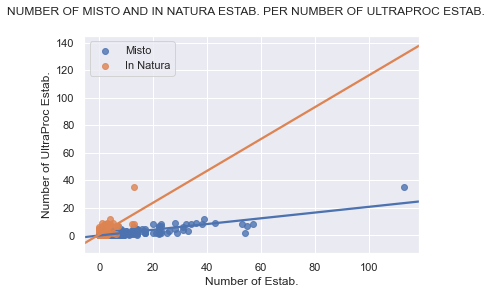

In [ ]:
# linear regression to check relation between types of establishments

 
fig, axs = plt.subplots(ncols=1, sharey=True, sharex=True)
fig.suptitle('NUMBER OF MISTO AND IN NATURA ESTAB. PER NUMBER OF ULTRAPROC ESTAB.')

sns.regplot(x='qtd_estab_misto', y='qtd_estab_ultraproc', data=data, ax=axs, label='Misto', ci=None, truncate=False)

g = sns.regplot(x='qtd_estab_in_natura', y='qtd_estab_ultraproc', data=data, ax=axs, label='In Natura', ci=None, truncate=False)

g.set(xlabel='Number of Estab.', ylabel=estabdict['qtd_estab_ultraproc'])
g.legend()

print('')

In [ ]:
abaixo_media = data.loc[data.total_estab <= data['total_estab'].mean()]
acima_media = data.loc[data.total_estab > data['total_estab'].mean()]

In [ ]:
abaixo_media

nome  totdomicilio  abastecimentoagua  \
27                 VILA XAVANTES         300.0                0.3   
48              IMPRENSA COLONOS         424.0                1.0   
63              JARDIM ITAPURA I         900.0                0.3   
73        URIAS ANTONIO DE SOUZA          50.0                1.0   
74                JARDIM ADUTORA         811.0                0.7   
...                          ...           ...                ...   
1634              JARDIM MAZZA I         100.0                1.0   
1638          FAZENDA DA JUTA IV         100.0                0.5   
1641                     LOTE 18           0.0                0.0   
1651  JARDIM NORONHA I, II E III        3237.0                0.5   
1659            RECANTO DA MOEDA         136.0                0.5   

      esgotamentosanitario  redeeletricadomiciliar  viaspavimentadas  \
27                     0.0                     0.4               0.3   
48                     0.8                     1.0               1.0   
63                     0.0                     0.4               0.5   
73                     0.0                     1.0               1.0   
74                     0.3                     0.4               0.9   
...                    ...                     ...               ...   
1634                   0.0                     0.5               1.0   
1638                   0.5                     0.5               0.5   
1641                   0.0                     0.0               0.0   
1651                   0.3                     0.0               0.6   
1659                   0.3                     0.8               0.8   

      drenagempluvial  iluminacaopublica  coletalixo  qtd_estab_in_natura  \
27                0.5                0.5         0.5                    0   
48                1.0                1.0         1.0                    0   
63                0.5                0.4         0.5                    0   
73                0.5                1.0         1.0                    0   
74                0.5                0.3         1.0                    0   
...               ...                ...         ...                  ...   
1634              0.5                0.5         1.0                    0   
1638              0.5                0.5         0.5                    1   
1641              0.0                0.0         0.0                    0   
1651              0.5                0.3         0.5                    0   
1659              0.5                0.5         1.0                    1   

      qtd_estab_misto  qtd_estab_ultraproc  total_estab  
27                  1                    0            1  
48                  3                    1            4  
63                  2                    0            2  
73                  3                    0            3  
74                  3                    0            3  
...               ...                  ...          ...  
1634                1                    0            1  
1638                3                    0            4  
1641                2                    1            3  
1651                8                    1            9  
1659                1                    0            2  

[192 rows x 13 columns]

In [ ]:
acima_media

nome  totdomicilio  abastecimentoagua  \
3                 PARQUE EUROPA I        1000.0               0.50   
22             JARDIM VARGINHA II         558.0               0.65   
68              NORBERTO ALMANDOZ         229.0               0.70   
70    FRANCISCO EUGENIO DO AMARAL         180.0               0.50   
80                  JARDIM REBECA         160.0               0.55   
...                           ...           ...                ...   
1490       JARDIM SÃO BENTO VELHO         626.0               0.20   
1539           PARQUE SÃO JOSÉ VI         358.0               0.60   
1581             JARDIM JAQUELINE        3392.0               0.68   
1592       FRANCISCO MUNHOZ FILHO         440.0               0.70   
1644                     MILHARAL         300.0               0.90   

      esgotamentosanitario  redeeletricadomiciliar  viaspavimentadas  \
3                     0.00                     0.5               0.8   
22                    0.00                     0.0               0.6   
68                    0.60                     0.8               0.7   
70                    0.50                     0.5               1.0   
80                    0.35                     0.0               0.0   
...                    ...                     ...               ...   
1490                  0.00                     0.2               0.5   
1539                  0.30                     0.0               0.4   
1581                  0.05                     0.3               0.7   
1592                  0.20                     0.6               1.0   
1644                  0.75                     1.0               1.0   

      drenagempluvial  iluminacaopublica  coletalixo  qtd_estab_in_natura  \
3                 0.5               0.80         1.0                    0   
22                0.5               0.40         0.5                    3   
68                0.5               0.40         1.0                    3   
70                0.5               0.80         0.5                    1   
80                0.5               0.35         0.5                    1   
...               ...                ...         ...                  ...   
1490              0.5               0.45         1.0                    0   
1539              0.5               0.40         0.5                    1   
1581              0.5               0.20         1.0                    5   
1592              0.5               0.60         1.0                    0   
1644              0.0               0.80         0.0                    2   

      qtd_estab_misto  qtd_estab_ultraproc  total_estab  
3                  14                    2           16  
22                 13                    6           22  
68                 28                    5           36  
70                 14                    5           20  
80                 12                    1           14  
...               ...                  ...          ...  
1490               14                    0           14  
1539               33                    3           37  
1581               43                    9           57  
1592                8                    5           13  
1644                8                    4           14  

[74 rows x 13 columns]

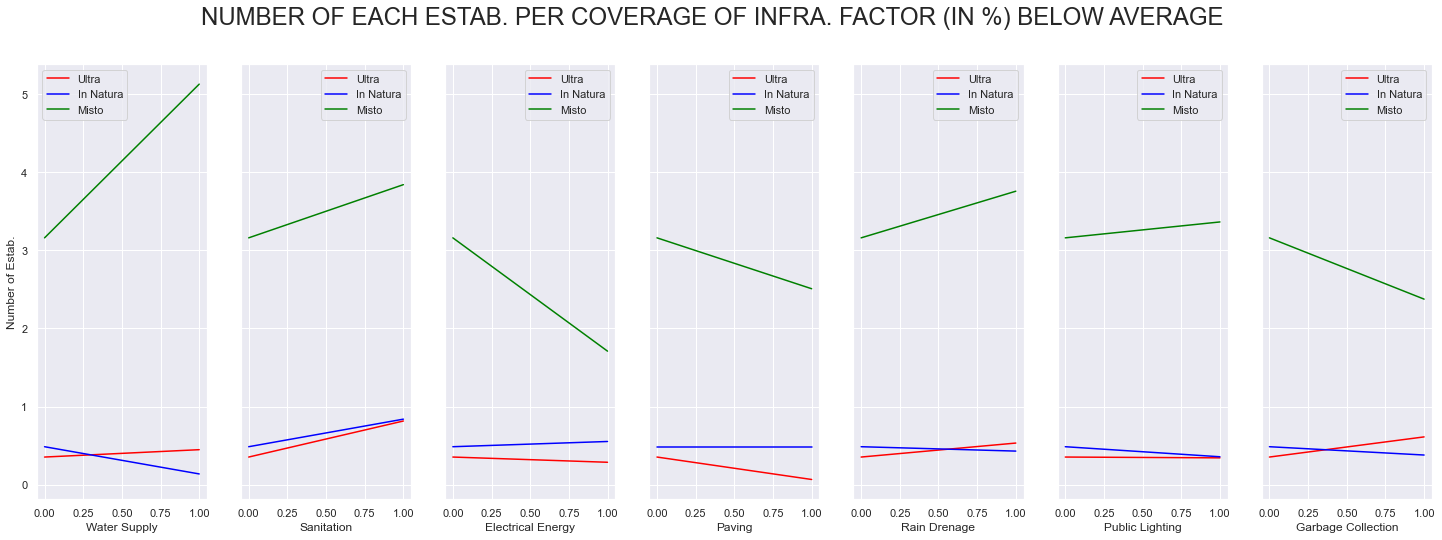

In [ ]:
from sklearn.linear_model import LinearRegression

infra = ['abastecimentoagua',
       'esgotamentosanitario', 'redeeletricadomiciliar', 'viaspavimentadas',
       'drenagempluvial', 'iluminacaopublica', 'coletalixo']

X_baixo = abaixo_media[infra]

y_baixo_misto = abaixo_media[['qtd_estab_misto']]
y_baixo_in_natura= abaixo_media[['qtd_estab_in_natura']]
y_baixo_ultraproc= abaixo_media[['qtd_estab_ultraproc']]

baixo_misto_model = LinearRegression()
baixo_misto_model.fit(X_baixo, y_baixo_misto)

baixo_in_natura_model = LinearRegression()
baixo_in_natura_model.fit(X_baixo, y_baixo_in_natura)

baixo_ultraproc_model = LinearRegression()
baixo_ultraproc_model.fit(X_baixo, y_baixo_ultraproc)

fig,axs = plt.subplots(1,7, figsize=(25,8), sharey=True)
fig.suptitle('NUMBER OF EACH ESTAB. PER COVERAGE OF INFRA. FACTOR (IN %) BELOW AVERAGE', fontsize=24)

for ix, inf in enumerate(infra):
    r = np.linspace(0,1, 300)
    y_ultra = baixo_ultraproc_model.coef_[:,ix]*r + baixo_ultraproc_model.intercept_
    y_in_natura = baixo_in_natura_model.coef_[:, ix]*r + baixo_in_natura_model.intercept_
    y_misto = baixo_misto_model.coef_[:,ix]*r + baixo_misto_model.intercept_
    
    sns.lineplot(ax=axs[ix], x=r, y=y_ultra, color='red', label='Ultra')
    sns.lineplot(ax=axs[ix], x=r, y=y_in_natura, color='blue', label='In Natura')
    sns.lineplot(ax=axs[ix], x=r, y=y_misto, color='green', label='Misto').set(xlabel=eixos[inf], ylabel='Number of Estab.')


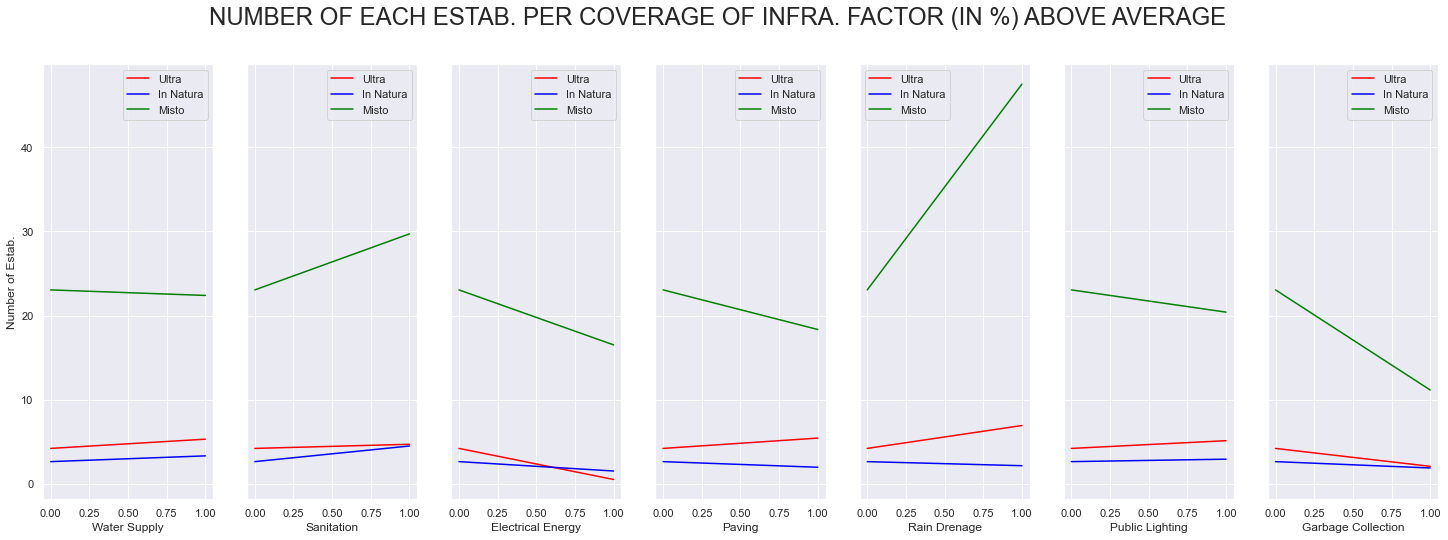

In [ ]:
X_acima = acima_media[infra]

y_acima_misto= acima_media[['qtd_estab_misto']]
y_acima_in_natura= acima_media[['qtd_estab_in_natura']]
y_acima_ultraproc= acima_media[['qtd_estab_ultraproc']]

acima_misto_model = LinearRegression()
acima_misto_model.fit(X_acima, y_acima_misto)

acima_in_natura_model = LinearRegression()
acima_in_natura_model.fit(X_acima, y_acima_in_natura)

acima_ultraproc_model = LinearRegression()
acima_ultraproc_model.fit(X_acima, y_acima_ultraproc)

fig,axs = plt.subplots(1,7, figsize=(25,8), sharey=True)
fig.suptitle('NUMBER OF EACH ESTAB. PER COVERAGE OF INFRA. FACTOR (IN %) ABOVE AVERAGE', fontsize=24)

for ix, inf in enumerate(infra):
    r = np.linspace(0,1, 300)
    y_ultra = acima_ultraproc_model.coef_[:,ix]*r + acima_ultraproc_model.intercept_
    y_in_natura = acima_in_natura_model.coef_[:, ix]*r + acima_in_natura_model.intercept_
    y_misto = acima_misto_model.coef_[:,ix]*r + acima_misto_model.intercept_
    
    sns.lineplot(ax=axs[ix], x=r, y=y_ultra, color='red', label='Ultra')
    sns.lineplot(ax=axs[ix], x=r, y=y_in_natura, color='blue', label='In Natura')
    sns.lineplot(ax=axs[ix], x=r, y=y_misto, color='green', label='Misto').set(xlabel=eixos[inf], ylabel='Number of Estab.')

# Week 7


In [ ]:
import pandas as pd

banana = pd.read_excel("/content/banana_mensal_preco.xlsx")
banana = banana.dropna()
banana

Produto                   Região  Mês     Ano  \
0             Nanica primeira - atacado      São Paulo (capital)  8.0  2022.0   
1            Nanica primeira - produtor        Bom Jesus da Lapa  8.0  2022.0   
2            Nanica primeira - produtor    Norte de Minas Gerais  8.0  2022.0   
3            Nanica primeira - produtor  Norte de Santa Catarina  8.0  2022.0   
4            Nanica primeira - produtor          Vale do Ribeira  8.0  2022.0   
...                                 ...                      ...  ...     ...   
3410       Prata anã primeira - atacado      São Paulo (capital)  7.0  2001.0   
3411      Prata anã primeira - produtor    Norte de Minas Gerais  7.0  2001.0   
3412   Prata litoral primeira - atacado      São Paulo (capital)  7.0  2001.0   
3413  Prata litoral primeira - produtor  Norte de Santa Catarina  7.0  2001.0   
3414  Prata litoral primeira - produtor          Vale do Ribeira  7.0  2001.0   

      Moeda         Unidade  Preço  
0     R$     caixa de 22 Kg  68.63  
1     R$         quilograma   2.45  
2     R$         quilograma   2.03  
3     R$         quilograma   1.45  
4     R$         quilograma   2.37  
...     ...             ...    ...  
3410  R$        Caixa 20 Kg  12.83  
3411  R$        Caixa 20 Kg   6.54  
3412  R$        Caixa 20 Kg   9.67  
3413  R$        Caixa 20 Kg   5.88  
3414  R$        Caixa 20 Kg   6.86  

[3415 rows x 7 columns]

In [ ]:
banana["Moeda"].unique()

array(['R$   '], dtype=object)

Repare que os produtos tem unidades diferentes

In [ ]:
banana["Unidade"].unique()

array(['caixa de 22 Kg', 'quilograma', 'Caixa 20 Kg', 'Cento'],
      dtype=object)

Por este motivo, vamos padronizar para a unidade fundamental (neste caso, kg). Para isto, foi usada a conversão de 1kg de banana equivale a 7 bananas, para convertermos o cento.

In [ ]:
def fun(row):
  conv_banana = {
    "quilograma":1,
    "caixa de 22 Kg": 22,
    "Caixa 20 Kg": 20,
    "Cento": (100/7)
  }

  return conv_banana[row["Unidade"]]



banana["Preço Final"] = round(banana["Preço"]/banana.apply(fun, axis=1), 2)

banana["Preço Final"]

0       3.12
1       2.45
2       2.03
3       1.45
4       2.37
        ... 
3410    0.64
3411    0.33
3412    0.48
3413    0.29
3414    0.34
Name: Preço Final, Length: 3415, dtype: float64

In [ ]:
banana

Produto                   Região  Mês     Ano  \
0             Nanica primeira - atacado      São Paulo (capital)  8.0  2022.0   
1            Nanica primeira - produtor        Bom Jesus da Lapa  8.0  2022.0   
2            Nanica primeira - produtor    Norte de Minas Gerais  8.0  2022.0   
3            Nanica primeira - produtor  Norte de Santa Catarina  8.0  2022.0   
4            Nanica primeira - produtor          Vale do Ribeira  8.0  2022.0   
...                                 ...                      ...  ...     ...   
3410       Prata anã primeira - atacado      São Paulo (capital)  7.0  2001.0   
3411      Prata anã primeira - produtor    Norte de Minas Gerais  7.0  2001.0   
3412   Prata litoral primeira - atacado      São Paulo (capital)  7.0  2001.0   
3413  Prata litoral primeira - produtor  Norte de Santa Catarina  7.0  2001.0   
3414  Prata litoral primeira - produtor          Vale do Ribeira  7.0  2001.0   

      Moeda         Unidade  Preço  Preço Final  
0     R$     caixa de 22 Kg  68.63         3.12  
1     R$         quilograma   2.45         2.45  
2     R$         quilograma   2.03         2.03  
3     R$         quilograma   1.45         1.45  
4     R$         quilograma   2.37         2.37  
...     ...             ...    ...          ...  
3410  R$        Caixa 20 Kg  12.83         0.64  
3411  R$        Caixa 20 Kg   6.54         0.33  
3412  R$        Caixa 20 Kg   9.67         0.48  
3413  R$        Caixa 20 Kg   5.88         0.29  
3414  R$        Caixa 20 Kg   6.86         0.34  

[3415 rows x 8 columns]

Notice too that we have a variety of places from which the bananas come from. Since we have to get the travel distance for each one of those places, let's gather all of them.

In [ ]:
banana["Região"].unique()

array(['São Paulo (capital)', 'Bom Jesus da Lapa',
       'Norte de Minas Gerais', 'Norte de Santa Catarina',
       'Vale do Ribeira', 'Delfinópolis', 'Linhares',
       'Vale do São Francisco'], dtype=object)

Here, we have to define the metrics for broad places such as Vale do São Francisco or Norte de Minas Gerais. Let's use the biggest city in each region as metrics:

* Vale do Ribeira - Registro SP (-24.496886089010996, -47.848504704435996)
* Vale do São Francisco - Juazeiro BA (-9.43013215346339, -40.50580101915208)
* Norte de Minas Gerais - Montes Claros MG (-16.728979530474827, -43.86533404689637)
* Norte de Santa Catarina - Joinville PR (-26.304092062604436, -48.86186136706466)
* São Paulo (capital) - São Paulo SP (-23.554042044102403, -46.63943938689087)
* Bom Jesus da Lapa - Bom Jesus da Lapa BA (-13.24903473313583, -43.406115297735965)
* Linhares - Linhares ES (-19.395685478970925, -40.05500976156769)
* Delfinópolis - Delfinópolis MG (-20.34447785831623, -46.850282366953195)
* Água Doce (região)
* Barbacena (região)
* Belo Horizonte (capital)
* Brasília (região)
* Chapada Diamantina
* Curitiba (região)
* Guarapuava (região)
Itapetininga (região)
Ponta Grossa (região)
Rio de Janeiro (capital)
São Mateus do Sul (região)
São Paulo (capital)
Sul de Minas Gerais
Triângulo Mineiro/Alto Paranaíba
Vargem Grande do Sul (região)


In [ ]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from geopy import distance

places = {
    "Vale do Ribeira":(-24.496886089010996, -47.848504704435996),
    "Vale do Ribeira": (-24.496886089010996, -47.848504704435996),
    "Vale do São Francisco" : (-9.43013215346339, -40.50580101915208),
    "Norte de Minas Gerais": (-16.728979530474827, -43.86533404689637),
    "Norte de Santa Catarina" : (-26.304092062604436, -48.86186136706466),
    "São Paulo (capital)" : (-23.554042044102403, -46.63943938689087),
    "Bom Jesus da Lapa" : (-13.24903473313583, -43.406115297735965),
    "Linhares" : (-19.395685478970925, -40.05500976156769),
    "Delfinópolis" :(-20.34447785831623, -46.850282366953195)
}

def get_dist(row):

  return distance.distance(places[row["Região"]], (-23.554042044102403, -46.63943938689087)).kilometers


banana["Distância"] = banana.apply(get_dist, axis=1)

banana

Produto                   Região  Mês     Ano  \
0             Nanica primeira - atacado      São Paulo (capital)  8.0  2022.0   
1            Nanica primeira - produtor        Bom Jesus da Lapa  8.0  2022.0   
2            Nanica primeira - produtor    Norte de Minas Gerais  8.0  2022.0   
3            Nanica primeira - produtor  Norte de Santa Catarina  8.0  2022.0   
4            Nanica primeira - produtor          Vale do Ribeira  8.0  2022.0   
...                                 ...                      ...  ...     ...   
3410       Prata anã primeira - atacado      São Paulo (capital)  7.0  2001.0   
3411      Prata anã primeira - produtor    Norte de Minas Gerais  7.0  2001.0   
3412   Prata litoral primeira - atacado      São Paulo (capital)  7.0  2001.0   
3413  Prata litoral primeira - produtor  Norte de Santa Catarina  7.0  2001.0   
3414  Prata litoral primeira - produtor          Vale do Ribeira  7.0  2001.0   

      Moeda         Unidade  Preço  Preço Final    Distância  
0     R$     caixa de 22 Kg  68.63         3.12     0.000000  
1     R$         quilograma   2.45         2.45  1190.523045  
2     R$         quilograma   2.03         2.03   809.251545  
3     R$         quilograma   1.45         1.45   378.383093  
4     R$         quilograma   2.37         2.37   161.349522  
...     ...             ...    ...          ...          ...  
3410  R$        Caixa 20 Kg  12.83         0.64     0.000000  
3411  R$        Caixa 20 Kg   6.54         0.33   809.251545  
3412  R$        Caixa 20 Kg   9.67         0.48     0.000000  
3413  R$        Caixa 20 Kg   5.88         0.29   378.383093  
3414  R$        Caixa 20 Kg   6.86         0.34   161.349522  

[3415 rows x 9 columns]

Analysis of Distance and Price for banana

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

banana['day'] = 1
banana.rename(inplace=True, mapper={
    "Ano": "year",
    "Mês": "month"
}, axis=1)

banana['date'] = pd.to_datetime(banana[["year", "month", "day"]], format="%m %Y")
banana.drop(["day"],inplace=True, axis=1)
banana

Produto                   Região  month  \
0             Nanica primeira - atacado      São Paulo (capital)    8.0   
1            Nanica primeira - produtor        Bom Jesus da Lapa    8.0   
2            Nanica primeira - produtor    Norte de Minas Gerais    8.0   
3            Nanica primeira - produtor  Norte de Santa Catarina    8.0   
4            Nanica primeira - produtor          Vale do Ribeira    8.0   
...                                 ...                      ...    ...   
3410       Prata anã primeira - atacado      São Paulo (capital)    7.0   
3411      Prata anã primeira - produtor    Norte de Minas Gerais    7.0   
3412   Prata litoral primeira - atacado      São Paulo (capital)    7.0   
3413  Prata litoral primeira - produtor  Norte de Santa Catarina    7.0   
3414  Prata litoral primeira - produtor          Vale do Ribeira    7.0   

        year  Moeda         Unidade  Preço  Preço Final    Distância  \
0     2022.0  R$     caixa de 22 Kg  68.63         3.12     0.000000   
1     2022.0  R$         quilograma   2.45         2.45  1190.523045   
2     2022.0  R$         quilograma   2.03         2.03   809.251545   
3     2022.0  R$         quilograma   1.45         1.45   378.383093   
4     2022.0  R$         quilograma   2.37         2.37   161.349522   
...      ...    ...             ...    ...          ...          ...   
3410  2001.0  R$        Caixa 20 Kg  12.83         0.64     0.000000   
3411  2001.0  R$        Caixa 20 Kg   6.54         0.33   809.251545   
3412  2001.0  R$        Caixa 20 Kg   9.67         0.48     0.000000   
3413  2001.0  R$        Caixa 20 Kg   5.88         0.29   378.383093   
3414  2001.0  R$        Caixa 20 Kg   6.86         0.34   161.349522   

           date  
0    2022-08-01  
1    2022-08-01  
2    2022-08-01  
3    2022-08-01  
4    2022-08-01  
...         ...  
3410 2001-07-01  
3411 2001-07-01  
3412 2001-07-01  
3413 2001-07-01  
3414 2001-07-01  

[3415 rows x 10 columns]

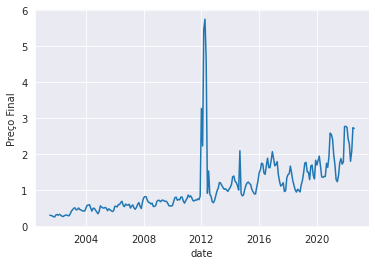

In [ ]:
import numpy as np
sns.set_style("darkgrid")
sns.lineplot(x="date", y="Preço Final", data=banana, ci=None, estimator=np.mean)

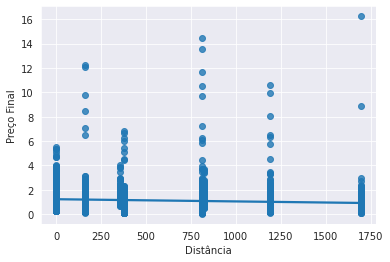

In [ ]:
sns.regplot(x="Distância", y="Preço Final", data=banana, ci=None)

In [ ]:
std = banana["Preço Final"].std()
banana["Variabilidade"] = (banana["Preço Final"] - banana["Preço Final"].shift(-1))/(std)

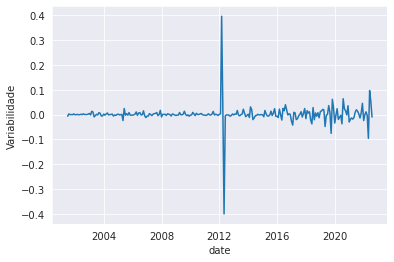

In [ ]:
sns.lineplot(x="date", y="Variabilidade", data=banana, ci=None, estimator=np.mean)

Folhosas

* Ibiúna (região) - Ibiuna SP (-23.658425235631682, -47.210960380354656)
* Mário Campos (região) - Mario Campos SP (-20.05174839623044, -44.188573641445714)
* Mogi das Cruzes (região) - Mogi das Cruzes SP (-23.52079427128027, -46.184371628037674)
* São Paulo (capital) - Sao Paulo SP (-23.554042044102403, -46.63943938689087)
* Teresópolis (região) - Teresopolis RJ (-22.41659774731772, -42.96953676973658)

In [ ]:
import pandas as pd
places_folhosas = {
    "Ibiúna (região)": (-23.658425235631682, -47.210960380354656),
    "Mário Campos (região)":(-20.05174839623044, -44.188573641445714),
    "Mogi das Cruzes (região)":(-23.52079427128027, -46.184371628037674),
    "São Paulo (capital)": (-23.554042044102403, -46.63943938689087),
    "Teresópolis (região)":(-22.41659774731772, -42.96953676973658)
}
folhosas = pd.read_excel("/content/folhosas_mensal_preco.xlsx")
folhosas.dropna(inplace=True)

folhosas

Produto                    Região   Mês     Ano  \
0     Alface Americana - Atacado       São Paulo (capital)   8.0  2022.0   
1        Alface Americana - Roça           Ibiúna (região)   8.0  2022.0   
2        Alface Americana - Roça     Mário Campos (região)   8.0  2022.0   
3        Alface Americana - Roça  Mogi das Cruzes (região)   8.0  2022.0   
4        Alface Americana - Roça      Teresópolis (região)   8.0  2022.0   
...                          ...                       ...   ...     ...   
1581     Alface Crespa - Atacado       São Paulo (capital)  11.0  2011.0   
1582       Alface Lisa - Atacado       São Paulo (capital)  11.0  2011.0   
1583  Alface Americana - Atacado       São Paulo (capital)  10.0  2011.0   
1584     Alface Crespa - Atacado       São Paulo (capital)  10.0  2011.0   
1585       Alface Lisa - Atacado       São Paulo (capital)  10.0  2011.0   

      Moeda       Unidade  Preço  
0     R$     Caixa 18 pés  20.00  
1     R$     Caixa 12 pés  19.00  
2     R$     Caixa 12 pés  19.00  
3     R$     Caixa 12 pés  20.20  
4     R$     Caixa 12 pés   9.50  
...     ...           ...    ...  
1581  R$     Caixa 24 pés   7.06  
1582  R$     Caixa 24 pés   9.83  
1583  R$     Caixa 18 pés  11.15  
1584  R$     Caixa 24 pés   9.17  
1585  R$     Caixa 24 pés  11.14  

[1586 rows x 7 columns]

In [ ]:
folhosas["Unidade"].unique()

array(['Caixa 18 pés', 'Caixa 12 pés', 'Caixa 24 pés', 'Caixa 20 pés'],
      dtype=object)

In [ ]:
convert_folhosas = {
    'Caixa 18 pés' : 18, 
    'Caixa 12 pés' : 12, 
    'Caixa 24 pés' : 24, 
    'Caixa 20 pés' : 20
}

def fun(row):

  return convert_folhosas[row["Unidade"]]

folhosas["Preço Final"] = round(folhosas["Preço"]/folhosas.apply(fun, axis=1), 2)

folhosas


Produto                    Região   Mês     Ano  \
0     Alface Americana - Atacado       São Paulo (capital)   8.0  2022.0   
1        Alface Americana - Roça           Ibiúna (região)   8.0  2022.0   
2        Alface Americana - Roça     Mário Campos (região)   8.0  2022.0   
3        Alface Americana - Roça  Mogi das Cruzes (região)   8.0  2022.0   
4        Alface Americana - Roça      Teresópolis (região)   8.0  2022.0   
...                          ...                       ...   ...     ...   
1581     Alface Crespa - Atacado       São Paulo (capital)  11.0  2011.0   
1582       Alface Lisa - Atacado       São Paulo (capital)  11.0  2011.0   
1583  Alface Americana - Atacado       São Paulo (capital)  10.0  2011.0   
1584     Alface Crespa - Atacado       São Paulo (capital)  10.0  2011.0   
1585       Alface Lisa - Atacado       São Paulo (capital)  10.0  2011.0   

      Moeda       Unidade  Preço  Preço Final  
0     R$     Caixa 18 pés  20.00         1.11  
1     R$     Caixa 12 pés  19.00         1.58  
2     R$     Caixa 12 pés  19.00         1.58  
3     R$     Caixa 12 pés  20.20         1.68  
4     R$     Caixa 12 pés   9.50         0.79  
...     ...           ...    ...          ...  
1581  R$     Caixa 24 pés   7.06         0.29  
1582  R$     Caixa 24 pés   9.83         0.41  
1583  R$     Caixa 18 pés  11.15         0.62  
1584  R$     Caixa 24 pés   9.17         0.38  
1585  R$     Caixa 24 pés  11.14         0.46  

[1586 rows x 8 columns]

In [ ]:
from geopy import distance
def get_dist(row):

  return distance.distance(places_folhosas[row["Região"]], (-23.554042044102403, -46.63943938689087)).kilometers

folhosas["Distância"] = folhosas.apply(get_dist, axis=1)

folhosas

Produto                    Região   Mês     Ano  \
0     Alface Americana - Atacado       São Paulo (capital)   8.0  2022.0   
1        Alface Americana - Roça           Ibiúna (região)   8.0  2022.0   
2        Alface Americana - Roça     Mário Campos (região)   8.0  2022.0   
3        Alface Americana - Roça  Mogi das Cruzes (região)   8.0  2022.0   
4        Alface Americana - Roça      Teresópolis (região)   8.0  2022.0   
...                          ...                       ...   ...     ...   
1581     Alface Crespa - Atacado       São Paulo (capital)  11.0  2011.0   
1582       Alface Lisa - Atacado       São Paulo (capital)  11.0  2011.0   
1583  Alface Americana - Atacado       São Paulo (capital)  10.0  2011.0   
1584     Alface Crespa - Atacado       São Paulo (capital)  10.0  2011.0   
1585       Alface Lisa - Atacado       São Paulo (capital)  10.0  2011.0   

      Moeda       Unidade  Preço  Preço Final   Distância  
0     R$     Caixa 18 pés  20.00         1.11    0.000000  
1     R$     Caixa 12 pés  19.00         1.58   59.463422  
2     R$     Caixa 12 pés  19.00         1.58  463.234121  
3     R$     Caixa 12 pés  20.20         1.68   46.613604  
4     R$     Caixa 12 pés   9.50         0.79  396.794142  
...     ...           ...    ...          ...         ...  
1581  R$     Caixa 24 pés   7.06         0.29    0.000000  
1582  R$     Caixa 24 pés   9.83         0.41    0.000000  
1583  R$     Caixa 18 pés  11.15         0.62    0.000000  
1584  R$     Caixa 24 pés   9.17         0.38    0.000000  
1585  R$     Caixa 24 pés  11.14         0.46    0.000000  

[1586 rows x 9 columns]

In [ ]:
folhosas['day'] = 1
folhosas.rename(inplace=True, mapper={
    "Ano": "year",
    "Mês": "month"
}, axis=1)

folhosas['date'] = pd.to_datetime(folhosas[["year", "month", "day"]], format="%m %Y")
folhosas.drop(["day"],inplace=True, axis=1)
folhosas

Produto                    Região  month    year  \
0     Alface Americana - Atacado       São Paulo (capital)    8.0  2022.0   
1        Alface Americana - Roça           Ibiúna (região)    8.0  2022.0   
2        Alface Americana - Roça     Mário Campos (região)    8.0  2022.0   
3        Alface Americana - Roça  Mogi das Cruzes (região)    8.0  2022.0   
4        Alface Americana - Roça      Teresópolis (região)    8.0  2022.0   
...                          ...                       ...    ...     ...   
1581     Alface Crespa - Atacado       São Paulo (capital)   11.0  2011.0   
1582       Alface Lisa - Atacado       São Paulo (capital)   11.0  2011.0   
1583  Alface Americana - Atacado       São Paulo (capital)   10.0  2011.0   
1584     Alface Crespa - Atacado       São Paulo (capital)   10.0  2011.0   
1585       Alface Lisa - Atacado       São Paulo (capital)   10.0  2011.0   

      Moeda       Unidade  Preço  Preço Final   Distância       date  
0     R$     Caixa 18 pés  20.00         1.11    0.000000 2022-08-01  
1     R$     Caixa 12 pés  19.00         1.58   59.463422 2022-08-01  
2     R$     Caixa 12 pés  19.00         1.58  463.234121 2022-08-01  
3     R$     Caixa 12 pés  20.20         1.68   46.613604 2022-08-01  
4     R$     Caixa 12 pés   9.50         0.79  396.794142 2022-08-01  
...     ...           ...    ...          ...         ...        ...  
1581  R$     Caixa 24 pés   7.06         0.29    0.000000 2011-11-01  
1582  R$     Caixa 24 pés   9.83         0.41    0.000000 2011-11-01  
1583  R$     Caixa 18 pés  11.15         0.62    0.000000 2011-10-01  
1584  R$     Caixa 24 pés   9.17         0.38    0.000000 2011-10-01  
1585  R$     Caixa 24 pés  11.14         0.46    0.000000 2011-10-01  

[1586 rows x 10 columns]

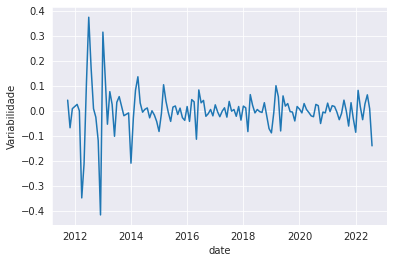

In [ ]:
import seaborn as sns
import numpy as np
std = folhosas["Preço Final"].std()
sns.set_style("darkgrid")

folhosas["Variabilidade"] = (folhosas["Preço Final"].diff())/(std)
sns.lineplot(x="date", y="Variabilidade", data=folhosas, ci=None, estimator=np.mean)


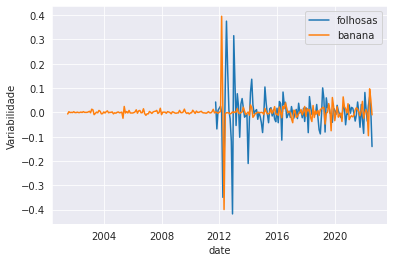

In [ ]:
sns.lineplot(x="date", y="Variabilidade", data=folhosas, ci=None, estimator=np.mean, label="folhosas")
sns.lineplot(x="date", y="Variabilidade", data=banana, ci=None, estimator=np.mean, label="banana")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
alimentos = ["banana", "batata", "cebola", "cenoura", "citros", 
             "folhosas", "maca", "mamao", "manga", "melancia", "melao",
             "tomate", "uva"]

tabelas = []

for alim in alimentos:
  table = pd.read_excel(f"/content/{alim}_mensal_preco.xlsx")
  table.dropna(inplace=True)
  tabelas.append(
      (alim, table)
  )

precos = set()
for alim, table in tabelas:
  print(alim, table["Unidade"].unique())
  for a in table["Unidade"].unique():
    precos.add(a)

print("\n")
print(precos)


banana ['caixa de 22 Kg' 'quilograma' 'Caixa 20 Kg' 'Cento']
batata ['saco 25 kg' 'saco 50 kg']
cebola ['saca de 20 Kg' 'quilograma']
cenoura ['Caixa 20 Kg' 'Caixa de 29 Kg']
citros ['caixa 40,8 Kg' 'caixa 27 kg']
folhosas ['Caixa 18 pés' 'Caixa 12 pés' 'Caixa 24 pés' 'Caixa 20 pés']
maca ['Caixa de 18 Kg' 'Caixa de 19 Kg']
mamao ['Caixa de 13 Kg' 'quilograma' 'Caixa de 8 Kg']
manga ['quilograma']
melancia ['quilograma']
melao ['quilograma' 'Caixa de 13 Kg' 'caixa de 10Kg' 'caixa de 6 Kg']
tomate ['Caixa 20 kg' 'Caixa Aberta']
uva ['quilograma']


{'Caixa 20 pés', 'Cento', 'caixa 40,8 Kg', 'Caixa de 19 Kg', 'caixa 27 kg', 'caixa de 10Kg', 'Caixa de 13 Kg', 'Caixa de 8 Kg', 'saca de 20 Kg', 'Caixa 24 pés', 'Caixa de 18 Kg', 'Caixa de 29 Kg', 'quilograma', 'caixa de 6 Kg', 'saco 50 kg', 'Caixa 18 pés', 'Caixa 12 pés', 'Caixa 20 kg', 'caixa de 22 Kg', 'Caixa 20 Kg', 'saco 25 kg', 'Caixa Aberta'}


In [ ]:
pesos = {
    'Caixa 18 pés' : 18,
    'saca de 20 Kg' : 20,
    'caixa de 10Kg' : 10,
    'saco 25 kg': 25,
    'saco 50 kg':50,
    'Caixa 20 pés':20,
    'Caixa de 8 Kg':8,
    'Caixa 24 pés':24,
    'Caixa de 13 Kg':13,
    'caixa de 6 Kg':6,
    'quilograma':1,
    'Caixa 20 Kg':20,
    'Caixa 12 pés':12,
    'Cento':(100/7), # estimative that 7 bananas weights 1kg
    'Caixa de 19 Kg':19,
    'caixa 40,8 Kg':40.8,
    'caixa 27 kg':27,
    'Caixa Aberta': 22.5,
    'Caixa de 18 Kg':18,
    'Caixa 20 kg':20,
    'caixa de 22 Kg':22,
    'Caixa de 29 Kg':29
}

def fun(row):

  return pesos[row["Unidade"]]



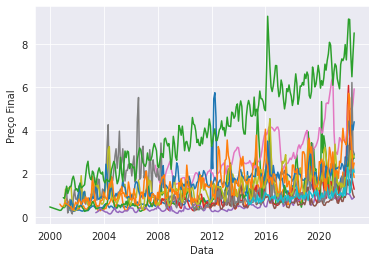

In [ ]:
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
fig, ax = plt.subplots(1)


for nome, table in tabelas:

  table['day'] = 1
  table.rename(inplace=True, mapper={
      "Ano": "year",
      "Mês": "month"
  }, axis=1)

  table['Data'] = pd.to_datetime(table[["year", "month", "day"]], format="%m %Y")
  table.drop(["day"],inplace=True, axis=1)
  table["Preço Final"] = round(table["Preço"]/table.apply(fun, axis=1), 2)
  sns.lineplot(ax=ax, x="Data", y="Preço Final", data=table, ci=None, estimator=np.mean)

plt.show()


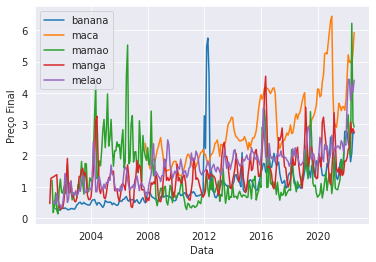

In [ ]:
climatericas = set(["banana", "maca", "melao", "manga", "mamao"])
fig, ax = plt.subplots(1)

for nome, table in tabelas:

  if nome not in climatericas:
    continue
  sns.lineplot(ax=ax, x="Data", y="Preço Final", data=table, ci=None, estimator=np.mean, label=nome)

plt.legend()
plt.show()

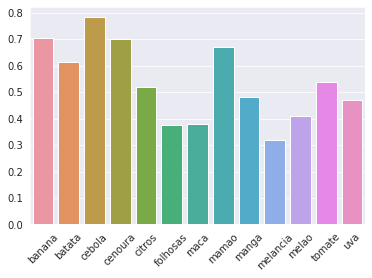

In [ ]:
cvs = {}

for nome, tabela in tabelas:

  var_tab = tabela.groupby(tabela['Data'].dt.date).mean().reset_index()

  cv = np.std(var_tab['Preço Final'])/np.mean(var_tab['Preço Final'])

  cvs[nome] = round(cv, 3)

fig, ax = plt.subplots(1)

sns.barplot(ax=ax, x=list(cvs.keys()), y=list(cvs.values()))

ax.set_xticklabels(list(cvs.keys()), rotation = 45)

plt.show()

In [ ]:
import pandas as pd
cidade_reg = pd.read_excel("/content/relação praça região .xlsx") 

cidade_reg.rename(mapper={"IBGE Município" : "codigo_ibge"}, inplace=True, axis=1)

cidade_reg

FileNotFoundError: ignored

In [ ]:
cidade_reg.loc[cidade_reg["Regional Cepea"] == "Linhares"]

In [ ]:
cidade_reg.loc[cidade_reg.Produto == "Cenoura"]["Regional Cepea"].unique()

In [ ]:
cidade_reg.loc[cidade_reg.Produto == "Cenoura"].loc[cidade_reg["Regional Cepea"] == "São Paulo (capital)"]

In [ ]:
defeituosos = {
    "maca" : "Maçã",
    "melao": "Melão",
    "mamao" :"Mamão"
}

rel_prod_cidades = {}

for prod, table in tabelas:

  if prod in defeituosos:
    nome = defeituosos[prod]
  else:
    nome = prod.capitalize()

  for reg in cidade_reg.loc[cidade_reg.Produto == nome]["Regional Cepea"].unique():

    if reg in table["Região"].unique():

      if rel_prod_cidades.get(nome, None) is None:
        rel_prod_cidades[nome] = {}
      
      rel_prod_cidades[nome].append(reg)


print(rel_prod_cidades)


In [ ]:
muni = pd.read_csv("/content/municipios.csv")

muni

In [ ]:
cidade_reg = cidade_reg.merge(muni[["codigo_ibge", "latitude", "longitude"]], on="codigo_ibge", how="left")

In [ ]:
muni.loc[muni.nome == "Barreiras"]

In [ ]:
cidade_reg

In [ ]:
defeituosos = {
    "maca" : "Maçã",
    "melao": "Melão",
    "mamao" :"Mamão"
}

rel_prod_cidades = {}

for prod, table in tabelas:

  if prod in defeituosos:
    nome = defeituosos[prod]
  else:
    nome = prod.capitalize()

  for reg in cidade_reg.loc[cidade_reg.Produto == nome]["Regional Cepea"].unique():

    if reg in table["Região"].unique():

      if rel_prod_cidades.get(nome, None) is None:
        rel_prod_cidades[nome] = {}
      
      rel_prod_cidades[nome][reg] = set()

      for _,mun in cidade_reg.loc[cidade_reg.Produto == nome].loc[cidade_reg["Regional Cepea"] == reg].iterrows():
        rel_prod_cidades[nome][reg].add(
            (mun.latitude, mun.longitude)
        )


print(rel_prod_cidades["Cenoura"])

In [ ]:
import numpy as np

muns = rel_prod_cidades["Banana"]["Linhares"]
def fun(lat_long):
  '''
  lat_long : tuple containing latitude and longitude

  muns : set containing all the municipios
  '''

  phi1 = lat_long[0]
  lamb1 = lat_long[1]

  R = 6378 # earth radius in km

  distances = []

  for phi2, lamb2 in muns:

    delta_lamb = abs(lamb1 - lamb2)

    A = np.sin(phi1)*np.sin(phi2) + np.cos(phi1)*np.cos(phi2)*np.cos(delta_lamb)

    delta_sigma = np.arccos(A)

    d = R*delta_sigma

    distances.append(d)

  return sum(distances)

from scipy.optimize import minimize

##### teste com linhares

lat_long_init = (-17, -39)

result = minimize(fun, lat_long_init, method="Nelder-Mead")

print(result.message)
print(f"Solution: Lat {result.x[0]} Long {result.x[1]}")
print(f"Number of iterations: {result.nit}")
print(f"Number of evaluations: {result.nfev}")



In [ ]:
import random
def get_inital_guess(muns):

  min_lat = min(muns, key=lambda mun: mun[0])[0]
  max_lat = max(muns, key=lambda mun: mun[0])[0]

  min_long = min(muns, key=lambda mun: mun[1])[1]
  max_long = max(muns, key=lambda mun: mun[1])[1]

  return (random.uniform(min_lat, max_lat), 
          random.uniform(min_long, max_long))
  

In [ ]:
rel_prod_cid_final = {}
from scipy.optimize import minimize

for fruta, d_fruta in rel_prod_cidades.items():

  rel_prod_cid_final[fruta] = {}

  for reg, muns in d_fruta.items():

    def fun(lat_long):
      '''
      lat_long : tuple containing latitude and longitude

      muns : set containing all the municipios
      '''

      phi1 = lat_long[0]
      lamb1 = lat_long[1]

      R = 6378 # earth radius in km

      distances = []

      for phi2, lamb2 in muns:

        delta_lamb = abs(lamb1 - lamb2)

        A = np.sin(phi1)*np.sin(phi2) + np.cos(phi1)*np.cos(phi2)*np.cos(delta_lamb)

        delta_sigma = np.arccos(A)

        d = R*delta_sigma

        distances.append(d)

      return sum(distances)

    x0 = get_inital_guess(muns)

    result = minimize(fun, x0, method="Nelder-Mead")

    if result.success:
      rel_prod_cid_final[fruta][reg] = tuple(result.x)
    else:
      rel_prod_cid_final[fruta][reg] = None

print(rel_prod_cid_final)
  





In [ ]:
!pip install geopy

In [ ]:
from geopy import distance
defeituosos = {
    "maca" : "Maçã",
    "melao": "Melão",
    "mamao" :"Mamão"
}

for fruta, table in tabelas:

  if fruta in defeituosos:
    nome = defeituosos[fruta]
  else:
    nome = fruta.capitalize()

  def get_dist(row):

    try:
      return distance.distance(rel_prod_cid_final[nome][row["Região"]], (-23.554042044102403, -46.63943938689087)).kilometers
    except KeyError:
      return None
  
  table["Distância"] = table.apply(get_dist, axis=1)


tabelas[3][1]



In [ ]:
rel_prod_cid_final["Cenoura"]